# Environment Config and Data Loading

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/online-payment-intentions/In22-CS3121-Project Dataset.xlsx


In [2]:
df = pd.read_excel("/kaggle/input/online-payment-intentions/In22-CS3121-Project Dataset.xlsx")

In [3]:
df_copy = df.copy()

# Data Overview

In [4]:
df_copy.head()

,Timestamp,Gender,Age,Highest level of education,Marital Status,Have used online shopping platforms before,Professional Background,General E-Commerce Platforms,Specialty Online Stores / automobile,Online pharmacies,...,Please indicate your level of agreement with the following statements. [Sharing information about my online purchases during a crisis is important for influencing others' purchase decisions.],"Please indicate your level of agreement with the following statements. [Overall, I have a positive attitude toward online shopping during a crisis.]",Please indicate your level of agreement with the following statements. [I believe that online shopping is a practical and efficient way to make purchases during a crisis.],Please indicate your level of agreement with the following statements. [I am concerned about the security of my personal and financial information when shopping online during a crisis.],Please indicate your level of agreement with the following statements. [I am cautious about the reliability and authenticity of products or services offered by online platforms during a crisis.],Have you made online purchases during crisis time?,"Please indicate your level of agreement with the following statements. [Overall, I am satisfied with online purchase during a crisis?]",Please indicate your level of agreement with the following statements. [I Have changed my online shopping behavior during a crisis compared to non-crisis periods?],Please indicate your level of agreement with the following statements. [It was convenient for me to do online shopping during a crisis compared to traditional in-store shopping.],Please indicate your level of agreement with the following statements. [I believe that online shopping during a crisis offers better value for money compared to traditional shopping methods.]
0,2023-08-02 23:59:11.684000,Male,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"daraz.lk, ikman.lk",NaN,NaN,...,Disagree,Neutral,Neutral,Neutral,Neutral,Yes,Neutral,Neutral,Disagree,Neutral
1,2023-08-03 00:04:13.800000,Male,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"daraz.lk, ikman.lk",patpat.lk,"epharma.lk, onlinepharmacy.lk",...,Agree,Neutral,Agree,Neutral,Agree,Yes,Agree,Agree,Agree,Agree
2,2023-08-03 00:15:31.602000,Female,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"daraz.lk, kapruka.com, ikman.lk,","patpat.lk, riyasewana.lk","healthgurd.lk, onlinepharmacy.lk",...,Neutral,Agree,Strongly agree,Agree,Agree,Yes,Agree,Strongly agree,Strongly agree,Agree
3,2023-08-03 00:20:49.096000,Female,25 - 35,Master's Degree or higher,Married,Yes,Employed (full-time),"daraz.lk, ikman.lk",lankavechicle.com,onlinepharmacy.lk,...,Agree,Neutral,Agree,Neutral,Agree,Yes,Agree,Agree,Agree,Agree
4,2023-08-03 00:23:52.006000,Male,25 - 35,Bachelor's Degree,Married,Yes,Employed (full-time),"daraz.lk, wow.lk",riyasewana.lk,"epharma.lk, ceymed.lk",...,Agree,Agree,Agree,Agree,Neutral,Yes,Agree,Agree,Agree,Neutral


In [5]:
df_copy.describe()

,Timestamp,Gender,Age,Highest level of education,Marital Status,Have used online shopping platforms before,Professional Background,General E-Commerce Platforms,Specialty Online Stores / automobile,Online pharmacies,...,Please indicate your level of agreement with the following statements. [Sharing information about my online purchases during a crisis is important for influencing others' purchase decisions.],"Please indicate your level of agreement with the following statements. [Overall, I have a positive attitude toward online shopping during a crisis.]",Please indicate your level of agreement with the following statements. [I believe that online shopping is a practical and efficient way to make purchases during a crisis.],Please indicate your level of agreement with the following statements. [I am concerned about the security of my personal and financial information when shopping online during a crisis.],Please indicate your level of agreement with the following statements. [I am cautious about the reliability and authenticity of products or services offered by online platforms during a crisis.],Have you made online purchases during crisis time?,"Please indicate your level of agreement with the following statements. [Overall, I am satisfied with online purchase during a crisis?]",Please indicate your level of agreement with the following statements. [I Have changed my online shopping behavior during a crisis compared to non-crisis periods?],Please indicate your level of agreement with the following statements. [It was convenient for me to do online shopping during a crisis compared to traditional in-store shopping.],Please indicate your level of agreement with the following statements. [I believe that online shopping during a crisis offers better value for money compared to traditional shopping methods.]
count,836,836,836,836,836,836,836,821,614,560,...,836,836,836,836,836,836,836,836,836,836
unique,768,3,4,7,2,2,6,46,24,26,...,7,6,6,6,6,2,6,7,6,6
top,2024-10-13 16:03:54,Male,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),"daraz.lk, kapruka.com, ikman.lk",riyasewana.lk,onlinepharmacy.lk,...,Neutral,Agree,Agree,Agree,Agree,Yes,Agree,Agree,Agree,Agree
freq,3,553,644,585,426,833,650,299,158,169,...,513,411,527,452,453,809,474,529,478,491


In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 59 columns):
 #   Column                                                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                                                                                                               836 non-null    object
 1   Gender                                                                                                                                                                                                  836 no

In [7]:
df_copy.isnull().sum()

Timestamp                                                                                                                                                                                                   0
Gender                                                                                                                                                                                                      0
Age                                                                                                                                                                                                         0
Highest level of education                                                                                                                                                                                  0
Marital Status                                                                                                                                                                  

## Naming Convention

In [8]:
df_copy.columns = df_copy.columns.str.strip().str.replace(r'(?<=[a-z])(?=[A-Z])', '_', regex=True).str.lower()
df_copy.columns

Index(['timestamp', 'gender', 'age', 'highest level of education',
       'marital status', 'have used online shopping platforms before',
       'professional background', 'general e-commerce platforms',
       'specialty online stores / automobile', 'online pharmacies',
       'fashion and beauty retailers', 'grocery delivery services',
       'please indicate your level of agreement with the following statements. [it is easy to navigate through the online platform to find the products or services i need.]',
       'please indicate your level of agreement with the following statements. [the online platform provides clear and intuitive navigation options.]',
       'please indicate your level of agreement with the following statements. [it was easy for me to learn how to use the online platform for making online purchases.]',
       'please indicate your level of agreement with the following statements. [i quickly became proficient in using the online platform for making online purchas

# Data Preprocessing

## Time Conversion and Validation

In [9]:
#df_copy["timestamp"] = pd.to_datetime(df_copy["timestamp"])

In [10]:
df_copy.loc[529]

timestamp                                                                                                                                                                                                                               31/09/2024 06:19:06
gender                                                                                                                                                                                                                                                 Male
age                                                                                                                                                                                                                                                 35 - 45
highest level of education                                                                                                                                                                                                        Master's Degree or

Invalid Date - There is no 31st day in September (09). 

In [11]:
df_copy.iloc[529:535]

,timestamp,gender,age,highest level of education,marital status,have used online shopping platforms before,professional background,general e-commerce platforms,specialty online stores / automobile,online pharmacies,...,please indicate your level of agreement with the following statements. [sharing information about my online purchases during a crisis is important for influencing others' purchase decisions.],"please indicate your level of agreement with the following statements. [overall, i have a positive attitude toward online shopping during a crisis.]",please indicate your level of agreement with the following statements. [i believe that online shopping is a practical and efficient way to make purchases during a crisis.],please indicate your level of agreement with the following statements. [i am concerned about the security of my personal and financial information when shopping online during a crisis.],please indicate your level of agreement with the following statements. [i am cautious about the reliability and authenticity of products or services offered by online platforms during a crisis.],have you made online purchases during crisis time?,"please indicate your level of agreement with the following statements. [overall, i am satisfied with online purchase during a crisis?]",please indicate your level of agreement with the following statements. [i have changed my online shopping behavior during a crisis compared to non-crisis periods?],please indicate your level of agreement with the following statements. [it was convenient for me to do online shopping during a crisis compared to traditional in-store shopping.],please indicate your level of agreement with the following statements. [i believe that online shopping during a crisis offers better value for money compared to traditional shopping methods.]
529,31/09/2024 06:19:06,Male,35 - 45,Master's Degree or higher,Married,Yes,Employed (full-time),"daraz.lk, kapruka.com, ikman.lk",NaN,healthgurd.lk,...,Neutral,Agree,Agree,Strongly Agree,Agree,Yes,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
530,31/09/2024 07:28:57,Female,25 - 35,Master's Degree or higher,Married,Yes,Employed (full-time),"daraz.lk, ikman.lk, takas.lk, wow.lk",patpat.lk,"healthgurd.lk, ceymed.lk",...,Neutral,Agree,Agree,Strongly Agree,Strongly Agree,Yes,Strongly Agree,Neutral,Neutral,Neutral
531,31/09/2024 09:15:46,Female,25 - 35,Bachelor's Degree,Married,Yes,Employed (full-time),"daraz.lk, ikman.lk",NaN,healthgurd.lk,...,Neutral,Agree,Agree,Strongly Agree,Strongly Agree,Yes,Strongly Agree,Agree,Agree,Strongly Agree
532,31/09/2024 16:48:20,Female,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),daraz.lk,riyasewana.lk,epharma.lk,...,Neutral,Agree,Agree,Strongly Agree,Strongly Agree,Yes,Strongly Agree,Strongly Agree,Strongly Agree,Agree
533,2024-09-01 08:58:40,Male,25 - 35,Bachelor's Degree,Married,Yes,Employed (full-time),NaN,NaN,NaN,...,Strongly Agree,Agree,Agree,Strongly Agree,Strongly Agree,Yes,Agree,Strongly Agree,Strongly Agree,Strongly Agree
534,2024-09-01 12:05:06,Male,35 - 45,Master's Degree or higher,Married,Yes,Employed (full-time),"daraz.lk, ikman.lk",NaN,healthgurd.lk,...,Neutral,Agree,Agree,Strongly Agree,Strongly Agree,Yes,Strongly Agree,Agree,Agree,Agree


529, 530, 531, 532 have invalid dates, will be marked as NaT

In [12]:
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'], errors='coerce')

In [13]:
df_copy.iloc[529:535]

,timestamp,gender,age,highest level of education,marital status,have used online shopping platforms before,professional background,general e-commerce platforms,specialty online stores / automobile,online pharmacies,...,please indicate your level of agreement with the following statements. [sharing information about my online purchases during a crisis is important for influencing others' purchase decisions.],"please indicate your level of agreement with the following statements. [overall, i have a positive attitude toward online shopping during a crisis.]",please indicate your level of agreement with the following statements. [i believe that online shopping is a practical and efficient way to make purchases during a crisis.],please indicate your level of agreement with the following statements. [i am concerned about the security of my personal and financial information when shopping online during a crisis.],please indicate your level of agreement with the following statements. [i am cautious about the reliability and authenticity of products or services offered by online platforms during a crisis.],have you made online purchases during crisis time?,"please indicate your level of agreement with the following statements. [overall, i am satisfied with online purchase during a crisis?]",please indicate your level of agreement with the following statements. [i have changed my online shopping behavior during a crisis compared to non-crisis periods?],please indicate your level of agreement with the following statements. [it was convenient for me to do online shopping during a crisis compared to traditional in-store shopping.],please indicate your level of agreement with the following statements. [i believe that online shopping during a crisis offers better value for money compared to traditional shopping methods.]
529,NaT,Male,35 - 45,Master's Degree or higher,Married,Yes,Employed (full-time),"daraz.lk, kapruka.com, ikman.lk",NaN,healthgurd.lk,...,Neutral,Agree,Agree,Strongly Agree,Agree,Yes,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
530,NaT,Female,25 - 35,Master's Degree or higher,Married,Yes,Employed (full-time),"daraz.lk, ikman.lk, takas.lk, wow.lk",patpat.lk,"healthgurd.lk, ceymed.lk",...,Neutral,Agree,Agree,Strongly Agree,Strongly Agree,Yes,Strongly Agree,Neutral,Neutral,Neutral
531,NaT,Female,25 - 35,Bachelor's Degree,Married,Yes,Employed (full-time),"daraz.lk, ikman.lk",NaN,healthgurd.lk,...,Neutral,Agree,Agree,Strongly Agree,Strongly Agree,Yes,Strongly Agree,Agree,Agree,Strongly Agree
532,NaT,Female,25 - 35,Bachelor's Degree,Single,Yes,Employed (full-time),daraz.lk,riyasewana.lk,epharma.lk,...,Neutral,Agree,Agree,Strongly Agree,Strongly Agree,Yes,Strongly Agree,Strongly Agree,Strongly Agree,Agree
533,2024-09-01 08:58:40,Male,25 - 35,Bachelor's Degree,Married,Yes,Employed (full-time),NaN,NaN,NaN,...,Strongly Agree,Agree,Agree,Strongly Agree,Strongly Agree,Yes,Agree,Strongly Agree,Strongly Agree,Strongly Agree
534,2024-09-01 12:05:06,Male,35 - 45,Master's Degree or higher,Married,Yes,Employed (full-time),"daraz.lk, ikman.lk",NaN,healthgurd.lk,...,Neutral,Agree,Agree,Strongly Agree,Strongly Agree,Yes,Strongly Agree,Agree,Agree,Agree


In [14]:
# df_copy.dtypes

## Gender

In [15]:
df_copy["gender"].isna().sum()

0

In [16]:
df_copy["gender"].unique()

array(['Male', 'Female', 'Prefer not to say'], dtype=object)

In [17]:
df_copy['gender'] = df_copy['gender'].map({'Male': 0, 'Female': 1, 'Prefer not to say': -1})

In [18]:
df_copy["gender"].unique()

array([ 0,  1, -1])

## Age

In [19]:
df_copy["age"].isna().sum()

0

In [20]:
df_copy["age"].unique()

array(['25 - 35', '18 - 25', '35 - 45', '45 - 55'], dtype=object)

In [21]:
df_copy['age'] = df_copy['age'].map({'18 - 25': 0, '25 - 35': 1, '35 - 45': 2, '45 - 55': 3})

## Highest Level of Education

In [22]:
df_copy["highest level of education"].isna().sum()

0

In [23]:
df_copy["highest level of education"].unique()

array(["Bachelor's Degree", "Master's Degree or higher",
       'Diploma / Certificate Course', 'Grade 8 pass', 'High school',
       'Postgraduate Diploma', 'School '], dtype=object)

In [24]:
df_copy["highest level of education"].value_counts()

highest level of education
Bachelor's Degree               585
Master's Degree or higher        95
Diploma / Certificate Course     77
High school                      70
Postgraduate Diploma              6
Grade 8 pass                      2
School                            1
Name: count, dtype: int64

Option school can be considered invalid, as it has a low frequency and ambiguous

In [25]:
df_copy.loc[df_copy['highest level of education'] == 'School ']


,timestamp,gender,age,highest level of education,marital status,have used online shopping platforms before,professional background,general e-commerce platforms,specialty online stores / automobile,online pharmacies,...,please indicate your level of agreement with the following statements. [sharing information about my online purchases during a crisis is important for influencing others' purchase decisions.],"please indicate your level of agreement with the following statements. [overall, i have a positive attitude toward online shopping during a crisis.]",please indicate your level of agreement with the following statements. [i believe that online shopping is a practical and efficient way to make purchases during a crisis.],please indicate your level of agreement with the following statements. [i am concerned about the security of my personal and financial information when shopping online during a crisis.],please indicate your level of agreement with the following statements. [i am cautious about the reliability and authenticity of products or services offered by online platforms during a crisis.],have you made online purchases during crisis time?,"please indicate your level of agreement with the following statements. [overall, i am satisfied with online purchase during a crisis?]",please indicate your level of agreement with the following statements. [i have changed my online shopping behavior during a crisis compared to non-crisis periods?],please indicate your level of agreement with the following statements. [it was convenient for me to do online shopping during a crisis compared to traditional in-store shopping.],please indicate your level of agreement with the following statements. [i believe that online shopping during a crisis offers better value for money compared to traditional shopping methods.]
293,2023-11-13 06:37:57.711,0,0,School,Single,No,Student,daraz.lk,riyasewana.lk,onlinepharmacy.lk,...,Agree,Neutral,Agree,Agree,Agree,No,Strongly agree,Agree,Agree,Agree


Assuming "School" refers to basic education, I'm merging it with "Grade 8 pass"

In [26]:
df_copy['highest level of education'] = df_copy['highest level of education'].replace('School ', 'Grade 8 pass')

In [27]:
df_copy['highest level of education'] = df_copy['highest level of education'].map({'Grade 8 pass': 0, 'High school': 1, 'Diploma / Certificate Course': 2, "Bachelor's Degree": 3, "Master's Degree or higher": 4, "Postgraduate Diploma": 5})

## Marital Status

In [28]:
df_copy["marital status"].unique()

array(['Single', 'Married'], dtype=object)

In [29]:
df_copy["marital status"].isna().sum()

0

In [30]:
df_copy["marital status"] = df_copy["marital status"].map({'Single':0, 'Married':1})

## have used online shopping platforms before

In [31]:
df_copy["have used online shopping platforms before"].isna().sum()

0

In [32]:
df_copy["have used online shopping platforms before"].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
df_copy["have used online shopping platforms before"] = df_copy["have used online shopping platforms before"].map({'No':0,'Yes':1})

## have you made online purchases during crisis time?

In [34]:
df_copy["have you made online purchases during crisis time?"].isna().sum()

0

In [35]:
df_copy["have you made online purchases during crisis time?"].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
df_copy["have you made online purchases during crisis time?"] = df_copy["have you made online purchases during crisis time?"].map({'No':0,'Yes':1})

## professional background

In [37]:
df_copy["professional background"].isna().sum()

0

In [38]:
df_copy["professional background"].unique()

array(['Employed (full-time)', 'Employed (part-time)', 'Student',
       'Jobless', 'Self-employed / Entrepreneur', 'Unemployed'],
      dtype=object)

This distinction matters because unemployment rates only count people who are actively seeking work, while joblessness includes everyone without a job, even if they’re not looking for one.

In [39]:
df_copy["professional background"].value_counts()

professional background
Employed (full-time)            650
Student                         134
Self-employed / Entrepreneur     39
Employed (part-time)             10
Jobless                           2
Unemployed                        1
Name: count, dtype: int64

In [40]:
df_copy[df_copy["professional background"] == "Jobless"]

,timestamp,gender,age,highest level of education,marital status,have used online shopping platforms before,professional background,general e-commerce platforms,specialty online stores / automobile,online pharmacies,...,please indicate your level of agreement with the following statements. [sharing information about my online purchases during a crisis is important for influencing others' purchase decisions.],"please indicate your level of agreement with the following statements. [overall, i have a positive attitude toward online shopping during a crisis.]",please indicate your level of agreement with the following statements. [i believe that online shopping is a practical and efficient way to make purchases during a crisis.],please indicate your level of agreement with the following statements. [i am concerned about the security of my personal and financial information when shopping online during a crisis.],please indicate your level of agreement with the following statements. [i am cautious about the reliability and authenticity of products or services offered by online platforms during a crisis.],have you made online purchases during crisis time?,"please indicate your level of agreement with the following statements. [overall, i am satisfied with online purchase during a crisis?]",please indicate your level of agreement with the following statements. [i have changed my online shopping behavior during a crisis compared to non-crisis periods?],please indicate your level of agreement with the following statements. [it was convenient for me to do online shopping during a crisis compared to traditional in-store shopping.],please indicate your level of agreement with the following statements. [i believe that online shopping during a crisis offers better value for money compared to traditional shopping methods.]
24,2023-08-03 12:42:00.455,0,1,0,0,1,Jobless,"daraz.lk, kapruka.com, ikman.lk, takas.lk, wow.lk",riyasewana.lk,NaN,...,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,1,Strongly Agree,Strongly disagree,Strongly disagree,Strongly disagree
438,2024-09-03 12:42:00.000,0,1,0,0,1,Jobless,"daraz.lk, kapruka.com, ikman.lk, takas.lk, wow.lk",riyasewana.lk,NaN,...,Srongly Disagree,Strongly Agree,Agree,Agree,Neutral,1,Agree,Agree,Agree,Strongly Agree


In [41]:
df_copy[df_copy["professional background"] == "Unemployed"]

,timestamp,gender,age,highest level of education,marital status,have used online shopping platforms before,professional background,general e-commerce platforms,specialty online stores / automobile,online pharmacies,...,please indicate your level of agreement with the following statements. [sharing information about my online purchases during a crisis is important for influencing others' purchase decisions.],"please indicate your level of agreement with the following statements. [overall, i have a positive attitude toward online shopping during a crisis.]",please indicate your level of agreement with the following statements. [i believe that online shopping is a practical and efficient way to make purchases during a crisis.],please indicate your level of agreement with the following statements. [i am concerned about the security of my personal and financial information when shopping online during a crisis.],please indicate your level of agreement with the following statements. [i am cautious about the reliability and authenticity of products or services offered by online platforms during a crisis.],have you made online purchases during crisis time?,"please indicate your level of agreement with the following statements. [overall, i am satisfied with online purchase during a crisis?]",please indicate your level of agreement with the following statements. [i have changed my online shopping behavior during a crisis compared to non-crisis periods?],please indicate your level of agreement with the following statements. [it was convenient for me to do online shopping during a crisis compared to traditional in-store shopping.],please indicate your level of agreement with the following statements. [i believe that online shopping during a crisis offers better value for money compared to traditional shopping methods.]
179,2023-11-10 21:57:11.822,1,0,3,0,1,Unemployed,"daraz.lk, ikman.lk",patpat.lk,onlinepharmacy.lk,...,Disagree,Disagree,Strongly disagree,Disagree,Disagree,0,Disagree,Strongly disagree,Strongly disagree,Disagree


Although there is a subtle difference between unemployed and jobless, in our context, it is not considerable due to the low frequency, hence merging into one category.

In [42]:
df_copy['professional background'] = df_copy['professional background'].replace('Jobless', 'Unemployed')

In [43]:
df_copy['professional background'], _ = pd.factorize(df_copy['professional background'])

## general e-commerce platforms

In [44]:
df_copy["general e-commerce platforms"].isna().sum()

15

In [45]:
df_copy["general e-commerce platforms"].value_counts()

general e-commerce platforms
daraz.lk, kapruka.com, ikman.lk                                                                  299
daraz.lk                                                                                         109
daraz.lk, kapruka.com                                                                             94
daraz.lk, ikman.lk                                                                                71
daraz.lk, kapruka.com, ikman.lk, wow.lk                                                           62
daraz.lk, kapruka.com, ikman.lk, takas.lk                                                         40
kapruka.com                                                                                       33
daraz.lk, kapruka.com, ikman.lk, takas.lk, wow.lk                                                 11
daraz.lk, wow.lk                                                                                   8
daraz.lk, ikman.lk, wow.lk                                    

In [46]:
df_copy["general e-commerce platforms"].unique()

array(['daraz.lk, ikman.lk', 'daraz.lk, kapruka.com, ikman.lk, ',
       'daraz.lk, wow.lk', 'daraz.lk, kapruka.com, ikman.lk',
       'daraz.lk, kapruka.com',
       'kapruka.com, ikman.lk, takas.lk, Wishque',
       'daraz.lk, kapruka.com, ',
       'daraz.lk, kapruka.com, ikman.lk, takas.lk, wow.lk',
       'kapruka.com, Ali Express.com', 'daraz.lk', nan,
       'daraz.lk, kapruka.com, ikman.lk, Wishique ',
       'daraz.lk, kapruka.com, Online clothing stores ',
       'daraz.lk, ikman.lk, wow.lk', 'ikman.lk', 'kapruka.com',
       'daraz.lk, ', 'daraz.lk, Ali express', 'daraz.lk, Strong.lk',
       'Ali express, ebay', 'kapruka.com, ikman.lk', 'daraz.lk, Keels',
       'daraz.lk, ikman.lk, takas.lk, wow.lk',
       'daraz.lk, Keels website, Vishq',
       'daraz.lk, kapruka.com, ikman.lk, Amazon ,ebay',
       'daraz.lk, kapruka.com, ikman.lk, Used some platforms to purchase books and electronic items. ',
       'kapruka.com, ikman.lk, takas.lk, wow.lk',
       'kapruka.com, ikman

In [47]:
df_copy["general e-commerce platforms"] = df_copy["general e-commerce platforms"].str.lower().str.strip()
df_copy['general e-commerce platforms'] = df_copy['general e-commerce platforms'].str.rstrip(',')

In [48]:
df_copy = df_copy[~df_copy["general e-commerce platforms"].str.contains("purchase|books|clothing", na=False)]

In [49]:
mode_value = df_copy["general e-commerce platforms"].mode()[0]

df_copy["general e-commerce platforms"].fillna(mode_value, inplace=True)

/tmp/ipykernel_298/3595223497.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["general e-commerce platforms"].fillna(mode_value, inplace=True)


In [50]:
platform_mapping = {
    "ali express.com": "ali-express",
    "aliexpress.com": "ali-express",
    "ali  express" : "ali-express",
    "ali express": "ali-express",
    "aliexpress": "ali-express",
    "ebay": "ebay",
    "daraz.lk": "daraz",
    "kapruka.com": "kapruka",
    "ikman.lk": "ikman",
    "keels website": "keels",
    "takas.lk": "takas",
    "wishique": "wishque",
    "vishq": "wishque",
    "wow.lk" : "wow"
}

df_copy = df_copy.copy()
df_copy["general e-commerce platforms"] = df_copy["general e-commerce platforms"].replace(platform_mapping, regex=True)

In [51]:
df_copy["general e-commerce platforms"] = df_copy["general e-commerce platforms"].replace("kapruka, ali-express.com", "kapruka, ali-express")

In [52]:
df_copy["general e-commerce platforms"].value_counts()

general e-commerce platforms
daraz, kapruka, ikman                  318
daraz                                  112
daraz, kapruka                          96
daraz, ikman                            71
daraz, kapruka, ikman, wow              62
daraz, kapruka, ikman, takas            40
kapruka                                 33
daraz, kapruka, ikman, takas, wow       11
daraz, ali-express                      11
ikman                                    9
daraz, ikman, wow                        8
daraz, wow                               8
kapruka, ikman                           6
daraz, ikman, takas, wow                 4
ebay                                     4
daraz, ikman, takas                      2
daraz, instagram stores                  2
daraz, takas, wow                        2
daraz, kapruka, lassana.com              2
daraz, wishque                           2
daraz, kapruka, wow                      2
daraz, kapruka, pickme                   2
daraz, keels             

In [53]:
from sklearn.preprocessing import MultiLabelBinarizer

df_copy['platforms_list'] = df_copy['general e-commerce platforms'].apply(
    lambda x: [platform.strip() for platform in x.split(',') if platform.strip() != '']
)

mlb = MultiLabelBinarizer()
one_hot_encoded = pd.DataFrame(mlb.fit_transform(df_copy['platforms_list']),
                               columns=mlb.classes_,
                               index=df_copy.index)

df_copy = df_copy.join(one_hot_encoded)


In [54]:
df_copy.columns

Index(['timestamp', 'gender', 'age', 'highest level of education',
       'marital status', 'have used online shopping platforms before',
       'professional background', 'general e-commerce platforms',
       'specialty online stores / automobile', 'online pharmacies',
       'fashion and beauty retailers', 'grocery delivery services',
       'please indicate your level of agreement with the following statements. [it is easy to navigate through the online platform to find the products or services i need.]',
       'please indicate your level of agreement with the following statements. [the online platform provides clear and intuitive navigation options.]',
       'please indicate your level of agreement with the following statements. [it was easy for me to learn how to use the online platform for making online purchases.]',
       'please indicate your level of agreement with the following statements. [i quickly became proficient in using the online platform for making online purchas

## specialty online stores / automobile

In [55]:
df_copy["specialty online stores / automobile"].isna().sum()

216

In [56]:
df_copy["specialty online stores / automobile"].unique()

array([nan, 'patpat.lk', 'patpat.lk, riyasewana.lk', 'lankavechicle.com',
       'riyasewana.lk', 'autolanka.com', 'autolanka.com, riyasewana.lk',
       'patpat.lk, riyasewana.lk, lankavechicle.com', 'pricelanka.lk',
       'riyasewana.lk, ', 'riyasewana.lk, lankavechicle.com',
       'autolanka.com, pricelanka.lk, patpat.lk, riyasewana.lk, lankavechicle.com',
       'autolanka.com, Toyota', 'No experience in this flatform', 'No',
       'autolanka.com, patpat.lk', 'Ikman.lk',
       'autolanka.com, patpat.lk, riyasewana.lk', 'None ',
       'pricelanka.lk, patpat.lk', 'amazon', 'ikman.lk',
       'autolanka.com, riyasewana.lk, ikman.lk', 'N/a',
       'autolanka.com, pricelanka.lk'], dtype=object)

In [57]:
df_copy["specialty online stores / automobile"].value_counts()

specialty online stores / automobile
riyasewana.lk                                                                156
autolanka.com, riyasewana.lk                                                 108
pricelanka.lk, patpat.lk                                                      66
autolanka.com, patpat.lk                                                      65
autolanka.com, pricelanka.lk                                                  32
ikman.lk                                                                      30
patpat.lk, riyasewana.lk                                                      29
patpat.lk                                                                     26
riyasewana.lk, lankavechicle.com                                              24
autolanka.com, riyasewana.lk, ikman.lk                                        18
autolanka.com                                                                 12
amazon                                                                  

In [58]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

specialty_col = "specialty online stores / automobile"

# standardized by converting to lowercase and stripping extra whitespaces
df_copy[specialty_col] = df_copy[specialty_col].str.lower().str.strip()

# Remove any trailing commas and extra spaces
df_copy[specialty_col] = df_copy[specialty_col].str.rstrip(",")

df_copy[specialty_col] = df_copy[specialty_col].replace(
    "no experience in this flatform", "x", regex=True
)

# replacing ambiguous values that indicate no participation or missing experience
df_copy[specialty_col] = df_copy[specialty_col].replace(
    ["no", "none", "n/a", "x"], "zero specialty online stores / automobile"
)


# Fill missing values with "unknown"
df_copy[specialty_col].fillna("specialty online stores / automobile unknown", inplace=True)

df_copy["specialty_platform_list"] = df_copy[specialty_col].apply(
    lambda x: [platform.strip() for platform in x.split(",") if platform.strip() != ""]
)

#One-hot encoding the list-of-platforms using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
specialty_encoded = pd.DataFrame(
    mlb.fit_transform(df_copy["specialty_platform_list"]),
    columns=mlb.classes_,
    index=df_copy.index
)

df_copy = pd.concat([df_copy, specialty_encoded], axis=1)

df_copy.columns

/tmp/ipykernel_298/3257696009.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[specialty_col].fillna("specialty online stores / automobile unknown", inplace=True)


Index(['timestamp', 'gender', 'age', 'highest level of education',
       'marital status', 'have used online shopping platforms before',
       'professional background', 'general e-commerce platforms',
       'specialty online stores / automobile', 'online pharmacies',
       'fashion and beauty retailers', 'grocery delivery services',
       'please indicate your level of agreement with the following statements. [it is easy to navigate through the online platform to find the products or services i need.]',
       'please indicate your level of agreement with the following statements. [the online platform provides clear and intuitive navigation options.]',
       'please indicate your level of agreement with the following statements. [it was easy for me to learn how to use the online platform for making online purchases.]',
       'please indicate your level of agreement with the following statements. [i quickly became proficient in using the online platform for making online purchas

## online pharmacies

In [59]:
df_copy["online pharmacies"].isna().sum()

268

In [60]:
df_copy["online pharmacies"] = df_copy["online pharmacies"].fillna("online pharmacy unknown")

In [61]:
df_copy["online pharmacies"].unique()

array(['online pharmacy unknown', 'epharma.lk, onlinepharmacy.lk',
       'healthgurd.lk, onlinepharmacy.lk', 'onlinepharmacy.lk',
       'epharma.lk, ceymed.lk', 'healthgurd.lk, ceymed.lk',
       'healthgurd.lk', 'Union chemist ', 'epharma.lk', 'ceymed.lk',
       'epharma.lk, healthgurd.lk, ceymed.lk', 'healthnet.lk',
       'epharma.lk, healthgurd.lk, onlinepharmacy.lk', 'No', 'Nearby',
       'No ',
       'epharma.lk, healthgurd.lk, healthnet.lk, onlinepharmacy.lk, ceymed.lk',
       'Pharmacy ', 'onlinepharmacy.lk, ceymed.lk',
       "Didn't order any pharmacy items online",
       'epharma.lk, healthgurd.lk, healthnet.lk, ceymed.lk',
       'healthgurd.lk, healthnet.lk', 'None ',
       'healthgurd.lk, healthnet.lk, onlinepharmacy.lk', 'nearby',
       'healthgurd.lk, ceymed.lk, nearby', 'N/a'], dtype=object)

In [62]:
df_copy["online pharmacies"] = df_copy["online pharmacies"].str.lower().str.strip()

In [63]:
df_copy["online pharmacies"] = df_copy["online pharmacies"].replace(["no", "none", "n/a", 'no ', "didn't order any pharmacy items online"], "no online pharmacies")
df_copy["online pharmacies"] = df_copy["online pharmacies"].replace(["nearby",'pharmacy'], "nearby pharmacy")
df_copy["online pharmacies"] = df_copy["online pharmacies"].replace("healthgurd.lk, ceymed.lk, nearby", "healthgurd.lk, ceymed.lk, nearby pharmacy")

Didn't order any pharmacy items online                                1\
No                                                                          1\
None                                                                       2\
No                                                                        4

Nearby                                                                     2\
nearby                                                                    98


Inconsistence Entries

In [64]:
df_copy["online pharmacies"].value_counts()

online pharmacies
online pharmacy unknown                                                  268
onlinepharmacy.lk                                                        169
nearby pharmacy                                                          102
healthgurd.lk, healthnet.lk, onlinepharmacy.lk                            62
healthgurd.lk                                                             54
epharma.lk                                                                48
healthgurd.lk, ceymed.lk, nearby pharmacy                                 45
healthnet.lk                                                              28
ceymed.lk                                                                 13
no online pharmacies                                                      10
healthgurd.lk, ceymed.lk                                                   8
epharma.lk, healthgurd.lk, healthnet.lk, onlinepharmacy.lk, ceymed.lk      3
union chemist                                             

In [65]:
df_copy["pharmacy_list"] = df_copy["online pharmacies"].str.split(", ")

In [66]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df_encoded = pd.DataFrame(mlb.fit_transform(df_copy["pharmacy_list"]), columns=mlb.classes_, index=df_copy.index)

df_copy = df_copy.join(df_encoded)

df_copy.columns

Index(['timestamp', 'gender', 'age', 'highest level of education',
       'marital status', 'have used online shopping platforms before',
       'professional background', 'general e-commerce platforms',
       'specialty online stores / automobile', 'online pharmacies',
       'fashion and beauty retailers', 'grocery delivery services',
       'please indicate your level of agreement with the following statements. [it is easy to navigate through the online platform to find the products or services i need.]',
       'please indicate your level of agreement with the following statements. [the online platform provides clear and intuitive navigation options.]',
       'please indicate your level of agreement with the following statements. [it was easy for me to learn how to use the online platform for making online purchases.]',
       'please indicate your level of agreement with the following statements. [i quickly became proficient in using the online platform for making online purchas

## fashion and beauty retailers

In [67]:
df_copy['fashion and beauty retailers'].isna().sum()

202

In [68]:
df_copy['fashion and beauty retailers'] = df_copy['fashion and beauty retailers'].fillna("unknown fashion and beauty retailers")

In [69]:
df_copy['fashion and beauty retailers'].unique()

array(['unknown fashion and beauty retailers',
       'kapruka.com/fashion, fashionbug.lk, odel.lk',
       'thilakawardana.lk, fashionbug.lk, odel.lk, Noorareed.lk',
       'fashionbug.lk', 'fashionbug.lk, midnightdivas.com',
       'kapruka.com/fashion, thilakawardana.lk, fashionbug.lk, odel.lk',
       'kapruka.com/fashion, odel.lk', 'odel.lk', 'Kelly felder',
       'odel.lk, Zigzag.lk', 'thilakawardana.lk, fashionbug.lk',
       'kapruka.com/fashion', 'fashionbug.lk, odel.lk',
       'odel.lk, midnightdivas.com',
       'fashionbug.lk, odel.lk, midnightdivas.com', 'midnightdivas.com',
       'kapruka.com/fashion, odel.lk, midnightdivas.com',
       'kapruka.com/fashion, fashionbug.lk', 'thilakawardana.lk',
       'thilakawardana.lk, fashionbug.lk, odel.lk',
       'kapruka.com/fashion, thilakawardana.lk, odel.lk', 'Moose',
       'Chenara dodge', 'dsi', 'Didn’t used',
       'kapruka.com/fashion, thilakawardana.lk, fashionbug.lk, odel.lk, midnightdivas.com',
       'thilakawardana

In [70]:
df_copy['fashion and beauty retailers'].value_counts()

fashion and beauty retailers
unknown fashion and beauty retailers                                                 202
kapruka.com/fashion                                                                  159
kapruka.com/fashion, thilakawardana.lk                                                96
kapruka.com/fashion, fashionbug.lk, odel.lk, kelly felder, mimosa                     60
kapruka.com/fashion, gflock, Kellf Felder                                             46
kapruka.com/fashion, Gflock, Spring and Summer                                        40
thilakawardana.lk                                                                     36
odel.lk                                                                               35
odel.lk, midnightdivas.com                                                            16
kapruka.com/fashion, odel.lk                                                          12
kapruka.com/fashion, Kelly Felder                                                

### Standardize Formatting

In [71]:
df_copy["fashion and beauty retailers"] = df_copy["fashion and beauty retailers"].str.lower().str.strip()

### Handle Missing or Irrelevant Values

In [72]:
 df_copy["fashion and beauty retailers"] = df_copy["fashion and beauty retailers"].replace(["didn’t used","n/a"] , "no fashion and beauty retailers")

In [73]:
 df_copy["fashion and beauty retailers"] = df_copy["fashion and beauty retailers"].replace(["kelly felder", " kellf felder", "Kelly Felder", "Kelly felder", " kellyfelder"], "kelly felder")

In [74]:
 df_copy["fashion and beauty retailers"] = df_copy["fashion and beauty retailers"].replace("kapruka.com/fashion, gflock, kellf felder" , "kapruka.com/fashion, gflock, kelly felder")

In [75]:
 df_copy["fashion and beauty retailers"] = df_copy["fashion and beauty retailers"].replace('fashionbug.lk, nolimit.lk / gflock.lk', "fashionbug.lk, nolimit.lk, gflock")

In [76]:
 df_copy["fashion and beauty retailers"] = df_copy["fashion and beauty retailers"].replace('kapruka.com/fashion, fashionbug.lk,', "kapruka.com/fashion, fashionbug.lk")

In [77]:
 df_copy["fashion and beauty retailers"] = df_copy["fashion and beauty retailers"].replace('odel.lk,', "odel.lk")

In [78]:
 df_copy["fashion and beauty retailers"] = df_copy["fashion and beauty retailers"].replace('kapruka.com/fashion, kellyfelder', "kapruka.com/fashion, kelly felder")

In [79]:
df_copy["retailer_list"] = df_copy["fashion and beauty retailers"].str.split(", ")

In [80]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df_encoded = pd.DataFrame(mlb.fit_transform(df_copy["retailer_list"]), columns=mlb.classes_, index=df_copy.index)

df_copy = df_copy.join(df_encoded)

In [81]:
df_copy.columns

Index(['timestamp', 'gender', 'age', 'highest level of education',
       'marital status', 'have used online shopping platforms before',
       'professional background', 'general e-commerce platforms',
       'specialty online stores / automobile', 'online pharmacies',
       ...
       'no fashion and beauty retailers', 'nolimit.lk', 'noorareed.lk',
       'odel.lk', 's&s', 'spring and summer', 'tharshana and insta shops',
       'thilakawardana.lk', 'unknown fashion and beauty retailers',
       'zigzag.lk'],
      dtype='object', length=122)

## grocery delivery services

In [82]:
df_copy['grocery delivery services'].isna().sum()

52

In [83]:
df_copy['grocery delivery services'] = df_copy['grocery delivery services'].fillna("unknown grocery delivery services")

In [84]:
df_copy['grocery delivery services'].unique()

array(['ubereats.com', 'ubereats.com, pickmefoods.com, keellssuper.lk',
       'ubereats.com, pickmefoods.com',
       'ubereats.com, pickmefoods.com, keellssuper.lk, arpico.lk',
       'ubereats.com, pickmefoods.com, arpico.lk',
       'keellssuper.lk, arpico.lk', 'ubereats.com, keellssuper.lk',
       'unknown grocery delivery services', 'keellssuper.lk',
       'pickmefoods.com', 'pickmefoods.com, keellssuper.lk',
       'ubereats.com, pickmefoods.com, keellssuper.lk, arpico.lk, Glomark',
       'ubereats.com, pickmefoods.com, keellssuper.lk, arpico.lk, cinnamonhotel.com',
       'keellssuper.lk, arpico.lk, cinnamonhotel.com',
       'ubereats.com, pickmefoods.com, cinnamonhotel.com',
       'ubereats.com, pickmefoods.com, keellssuper.lk, glomark.lk',
       'ubereats.com, pickmefoods.com, keellssuper.lk, cinnamonhotel.com',
       'ubereats.com, Cargillis food city',
       'keellssuper.lk, Cargillsonline.com',
       'ubereats.com, keellssuper.lk, arpico.lk',
       'ubereats.com,

In [85]:
df_copy['grocery delivery services'].value_counts()

grocery delivery services
ubereats.com, pickmefoods.com, keellssuper.lk                                  359
ubereats.com, pickmefoods.com                                                   94
ubereats.com, pickmefoods.com, keellssuper.lk, arpico.lk                        94
ubereats.com                                                                    66
unknown grocery delivery services                                               52
ubereats.com, keellssuper.lk                                                    37
arpico.lk                                                                       33
keellssuper.lk                                                                  25
pickmefoods.com, keellssuper.lk                                                 15
pickmefoods.com                                                                 12
ubereats.com, pickmefoods.com, keellssuper.lk, arpico.lk, cinnamonhotel.com      7
ubereats.com, pickmefoods.com, keellssuper.lk, glomark.lk    

In [86]:
df_copy["grocery delivery services"] = df_copy["grocery delivery services"].str.lower().str.strip()

In [87]:
df_copy["grocery delivery services"] = df_copy["grocery delivery services"].replace(["n/a"], "grocery delivery services not used")

In [88]:
df_copy["grocery delivery services"] = df_copy["grocery delivery services"].replace(["ubereats.com, pickmefoods.com, keellssuper.lk, arpico.lk, glomark"], "ubereats.com, pickmefoods.com, keellssuper.lk, arpico.lk, glomark.lk")

In [89]:
df_copy["grocery delivery services"] = df_copy["grocery delivery services"].replace(["ubereats.com, cargillis food city"], "ubereats.com, cargillsonline.com")

In [90]:
df_copy["grocery delivery services"] = df_copy["grocery delivery services"].replace(["keellssuper.lk, keels"], "keellssuper.lk")

In [91]:
df_copy["grocery_delivery_list"] = df_copy["grocery delivery services"].apply(
    lambda x: [service.strip() for service in x.split(", ") if service.strip() != ""]
)

# One-hot encoding the resulting list using MultiLabelBinarizer.
mlb = MultiLabelBinarizer()
one_hot_encoded = pd.DataFrame(
    mlb.fit_transform(df_copy["grocery_delivery_list"]),
    columns=mlb.classes_,
    index=df_copy.index
)

# Merging the one-hot encoded columns with the original DataFrame.
df_copy = pd.concat([df_copy, one_hot_encoded], axis=1)

In [92]:
df_copy.columns

Index(['timestamp', 'gender', 'age', 'highest level of education',
       'marital status', 'have used online shopping platforms before',
       'professional background', 'general e-commerce platforms',
       'specialty online stores / automobile', 'online pharmacies',
       ...
       'grocery_delivery_list', 'arpico.lk', 'cargillsonline.com',
       'cinnamonhotel.com', 'glomark.lk', 'grocery delivery services not used',
       'keellssuper.lk', 'pickmefoods.com', 'ubereats.com',
       'unknown grocery delivery services'],
      dtype='object', length=132)

## Level of Agreement

In [93]:
df_copy['please indicate your level of agreement with the following statements. [it is easy to navigate through the online platform to find the products or services i need.]'].isna().sum()

0

In [94]:
df_copy['please indicate your level of agreement with the following statements. [it is easy to navigate through the online platform to find the products or services i need.]'].unique()

array(['Agree', 'Neutral', 'Strongly agree', 'Disagree',
       'Strongly disagree', 'Strongly Agree', 'Srongly Disagree'],
      dtype=object)

In [95]:
df_copy['please indicate your level of agreement with the following statements. [it is easy to navigate through the online platform to find the products or services i need.]'].value_counts()

please indicate your level of agreement with the following statements. [it is easy to navigate through the online platform to find the products or services i need.]
Neutral              437
Agree                233
Strongly agree        65
Strongly Agree        61
Disagree              13
Strongly disagree     10
Srongly Disagree       9
Name: count, dtype: int64

In [96]:
level_of_agreement_columns = [col for col in df_copy.columns if col.startswith("please indicate your level of agreement")]
print(len(level_of_agreement_columns))
level_of_agreement_columns

46


['please indicate your level of agreement with the following statements. [it is easy to navigate through the online platform to find the products or services i need.]',
 'please indicate your level of agreement with the following statements. [the online platform provides clear and intuitive navigation options.]',
 'please indicate your level of agreement with the following statements. [it was easy for me to learn how to use the online platform for making online purchases.]',
 'please indicate your level of agreement with the following statements. [i quickly became proficient in using the online platform for making online purchases during a crisis.]',
 'please indicate your level of agreement with the following statements. [the instructions provided on the online platform are clear and easy to understand.]',
 'please indicate your level of agreement with the following statements. [i can easily follow the instructions given on the online platform for making online purchases.]',
 'please 

In [97]:
uniques = []
for col in level_of_agreement_columns:
    if set(df_copy[col].unique().tolist()) not in uniques:
        uniques.append(set(df_copy[col].unique().tolist()))

print(len(uniques))

for ls in uniques:
    print(ls)

4
{'Neutral', 'Agree', 'Disagree', 'Strongly Agree', 'Srongly Disagree', 'Strongly disagree', 'Strongly agree'}
{'Neutral', 'Agree', 'Disagree', 'Strongly Agree', 'Srongly Disagree', 'Strongly disagree'}
{'Neutral', 'Agree', 'Disagree', 'Strongly Agree', 'Strongly disagree', 'Strongly agree'}
{'neutral', 'Neutral', 'Agree', 'Disagree', 'Strongly Agree', 'Strongly disagree', 'Strongly agree'}


In [98]:
for col in level_of_agreement_columns:
    df_copy[col] = df_copy[col].str.lower().str.strip()
    df_copy[col] = df_copy[col].replace(["srongly disagree"], "strongly disagree")
    

In [99]:
for col in level_of_agreement_columns:
    print(f"null count-{df_copy[col].isna().sum()}, categories-{sorted(df_copy[col].unique().tolist())}")

null count-0, categories-['agree', 'disagree', 'neutral', 'strongly agree', 'strongly disagree']
null count-0, categories-['agree', 'disagree', 'neutral', 'strongly agree', 'strongly disagree']
null count-0, categories-['agree', 'disagree', 'neutral', 'strongly agree', 'strongly disagree']
null count-0, categories-['agree', 'disagree', 'neutral', 'strongly agree', 'strongly disagree']
null count-0, categories-['agree', 'disagree', 'neutral', 'strongly agree', 'strongly disagree']
null count-0, categories-['agree', 'disagree', 'neutral', 'strongly agree', 'strongly disagree']
null count-0, categories-['agree', 'disagree', 'neutral', 'strongly agree', 'strongly disagree']
null count-0, categories-['agree', 'disagree', 'neutral', 'strongly agree', 'strongly disagree']
null count-0, categories-['agree', 'disagree', 'neutral', 'strongly agree', 'strongly disagree']
null count-0, categories-['agree', 'disagree', 'neutral', 'strongly agree', 'strongly disagree']
null count-0, categories-['agr

In [100]:
from sklearn.preprocessing import OrdinalEncoder

# same order for each agreement column
categories_order = [ ['strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree'] ] * len(level_of_agreement_columns)

# Apply Ordinal Encoding
encoder = OrdinalEncoder(categories=categories_order)

df_copy[level_of_agreement_columns] = encoder.fit_transform(df_copy[level_of_agreement_columns])

df_copy.head()


,timestamp,gender,age,highest level of education,marital status,have used online shopping platforms before,professional background,general e-commerce platforms,specialty online stores / automobile,online pharmacies,...,grocery_delivery_list,arpico.lk,cargillsonline.com,cinnamonhotel.com,glomark.lk,grocery delivery services not used,keellssuper.lk,pickmefoods.com,ubereats.com,unknown grocery delivery services
0,2023-08-02 23:59:11.684,0,1,3,0,1,0,"daraz, ikman",specialty online stores / automobile unknown,online pharmacy unknown,...,[ubereats.com],0,0,0,0,0,0,0,1,0
1,2023-08-03 00:04:13.800,0,1,3,0,1,0,"daraz, ikman",patpat.lk,"epharma.lk, onlinepharmacy.lk",...,"[ubereats.com, pickmefoods.com, keellssuper.lk]",0,0,0,0,0,1,1,1,0
2,2023-08-03 00:15:31.602,1,1,3,0,1,0,"daraz, kapruka, ikman","patpat.lk, riyasewana.lk","healthgurd.lk, onlinepharmacy.lk",...,"[ubereats.com, pickmefoods.com]",0,0,0,0,0,0,1,1,0
3,2023-08-03 00:20:49.096,1,1,4,1,1,0,"daraz, ikman",lankavechicle.com,onlinepharmacy.lk,...,"[ubereats.com, pickmefoods.com]",0,0,0,0,0,0,1,1,0
4,2023-08-03 00:23:52.006,0,1,3,1,1,0,"daraz, wow",riyasewana.lk,"epharma.lk, ceymed.lk",...,"[ubereats.com, pickmefoods.com, keellssuper.lk]",0,0,0,0,0,1,1,1,0


In [101]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 828 entries, 0 to 835
Columns: 132 entries, timestamp to unknown grocery delivery services
dtypes: datetime64[ns](1), float64(46), int64(75), object(10)
memory usage: 860.3+ KB


##

## reliability and validity of the survey questions

### Cronbatch’s alpha coefficient value

In [102]:
import numpy as np

def cronbach_alpha(df_items):
    df_items = df_items.dropna(axis=0)
    item_vars = df_items.var(ddof=1)
    total_var = df_items.sum(axis=1).var(ddof=1)
    n_items = df_items.shape[1]
    alpha = (n_items / (n_items - 1)) * (1 - item_vars.sum() / total_var)
    return alpha

In [103]:
ease_nav = df_copy[['please indicate your level of agreement with the following statements. [it is easy to navigate through the online platform to find the products or services i need.]', 'please indicate your level of agreement with the following statements. [the online platform provides clear and intuitive navigation options.]']]
alpha_ease_nav = cronbach_alpha(ease_nav)
print("Cronbach's Alpha for Ease of Navigation:", alpha_ease_nav)

Cronbach's Alpha for Ease of Navigation: 0.880510952243031


In [104]:
ins_clarity = df_copy[['please indicate your level of agreement with the following statements. [it was easy for me to learn how to use the online platform for making online purchases.]', 'please indicate your level of agreement with the following statements. [i quickly became proficient in using the online platform for making online purchases during a crisis.]']]
alpha_ins_clarity = cronbach_alpha(ins_clarity)
print("Cronbach's Alpha for Clarity of Instructions:", alpha_ins_clarity)

Cronbach's Alpha for Clarity of Instructions: 0.8243188002030906


In [105]:
learning_curve = df_copy[[
    'please indicate your level of agreement with the following statements. [the instructions provided on the online platform are clear and easy to understand.]',
    'please indicate your level of agreement with the following statements. [i can easily follow the instructions given on the online platform for making online purchases.]'
]]
alpha_learning_curve = cronbach_alpha(learning_curve)
print("Cronbach's Alpha for Learning Curve:", alpha_learning_curve)


Cronbach's Alpha for Learning Curve: 0.8433944964133633


In [106]:
response_time = df_copy[[
    'please indicate your level of agreement with the following statements. [the online platform responds quickly to my actions, such as loading pages and processing transactions.]',
    'please indicate your level of agreement with the following statements. [i don\'t experience delays or long waiting times when using the online platform for making online purchases during a crisis.]'
]]
alpha_response_time = cronbach_alpha(response_time)
print("Cronbach's Alpha for Response Time:", alpha_response_time)


Cronbach's Alpha for Response Time: 0.7023576102924591


In [107]:
error_handling = df_copy[[
    'please indicate your level of agreement with the following statements. [the online platform effectively handles errors or mistakes, such as providing clear error messages and easy recovery options.]',
    'please indicate your level of agreement with the following statements. [i rarely encounter errors or issues when using the online platform for making online purchases during a crisis.]'
]]
alpha_error_handling = cronbach_alpha(error_handling)
print("Cronbach's Alpha for Error Handling:", alpha_error_handling)


Cronbach's Alpha for Error Handling: 0.7087216977689652


In [108]:
product_availability = df_copy[[
    'please indicate your level of agreement with the following statements. [the online platform offers a wide range of products and services that meet my needs during a crisis.]',
    'please indicate your level of agreement with the following statements. [i can find the products or services i need on the online platform during a crisis.]'
]]
alpha_product_availability = cronbach_alpha(product_availability)
print("Cronbach's Alpha for Product Availability:", alpha_product_availability)


Cronbach's Alpha for Product Availability: 0.8067101949552493


In [109]:
convenience = df_copy[[
    'please indicate your level of agreement with the following statements. [the online platform makes it easy to search for products and complete transactions during a crisis.]',
    'please indicate your level of agreement with the following statements. [using the online platform for making purchases during a crisis is convenient and saves time.]'
]]
alpha_convenience = cronbach_alpha(convenience)
print("Cronbach's Alpha for Convenience:", alpha_convenience)


Cronbach's Alpha for Convenience: 0.7620659028332739


In [110]:
cost_effectiveness = df_copy[[
    'please indicate your level of agreement with the following statements. [the online platform offers competitive prices, discounts, or cost-saving benefits during a crisis.]',
    'please indicate your level of agreement with the following statements. [i perceive that using the online platform for making purchases during a crisis can help me save money.]'
]]
alpha_cost_effectiveness = cronbach_alpha(cost_effectiveness)
print("Cronbach's Alpha for Cost-effectiveness:", alpha_cost_effectiveness)


Cronbach's Alpha for Cost-effectiveness: 0.666424884921152


In [111]:
information_accessibility = df_copy[[
    'please indicate your level of agreement with the following statements. [the online platform provides detailed and accurate product information during a crisis.]',
    'please indicate your level of agreement with the following statements. [i can easily access user reviews, ratings, and other relevant information to support my purchase decisions.]'
]]
alpha_information_accessibility = cronbach_alpha(information_accessibility)
print("Cronbach's Alpha for Information Accessibility:", alpha_information_accessibility)


Cronbach's Alpha for Information Accessibility: 0.5964010282776693


In [112]:
personalization = df_copy[[
    'please indicate your level of agreement with the following statements. [the online platform tailors recommendations, suggestions, or personalized offers based on my preferences.]',
    'please indicate your level of agreement with the following statements. [i feel that the online platform understands my needs and preferences during a crisis.]'
]]
alpha_personalization = cronbach_alpha(personalization)
print("Cronbach's Alpha for Personalization:", alpha_personalization)


Cronbach's Alpha for Personalization: 0.7717984990833495


In [113]:
privacy_protection = df_copy[[
    'please indicate your level of agreement with the following statements. [the online platform takes appropriate measures to protect my privacy.]',
    'please indicate your level of agreement with the following statements. [i trust that my personal information will be handled securely by the online platform.]'
]]
alpha_privacy_protection = cronbach_alpha(privacy_protection)
print("Cronbach's Alpha for Privacy Protection:", alpha_privacy_protection)


Cronbach's Alpha for Privacy Protection: 0.7895117831577418


In [114]:
payment_security = df_copy[[
    'please indicate your level of agreement with the following statements. [the online platform provides secure payment methods to protect against fraudulent activities during a crisis.]',
    'please indicate your level of agreement with the following statements. [i trust that my payment details are handled securely by the online platform.]'
]]
alpha_payment_security = cronbach_alpha(payment_security)
print("Cronbach's Alpha for Payment Security:", alpha_payment_security)


Cronbach's Alpha for Payment Security: 0.8698584231000133


In [115]:
transparent_policies = df_copy[[
    'please indicate your level of agreement with the following statements. [the online platform provides clear and easily accessible policies regarding data handling, privacy, and security.]',
    'please indicate your level of agreement with the following statements. [i feel confident in the online platform\'s transparency regarding its data protection practices.]'
]]
alpha_transparent_policies = cronbach_alpha(transparent_policies)
print("Cronbach's Alpha for Transparent Policies:", alpha_transparent_policies)


Cronbach's Alpha for Transparent Policies: 0.8042683682319556


In [116]:
word_of_mouth = df_copy[[
    'please indicate your level of agreement with the following statements. [i am influenced by recommendations and opinions from family and friends when making online purchases during a crisis.]',
    'please indicate your level of agreement with the following statements. [i consider the experiences and suggestions shared by people i know before making online purchases during a crisis.]'
]]
alpha_word_of_mouth = cronbach_alpha(word_of_mouth)
print("Cronbach's Alpha for Word of Mouth and Recommendations:", alpha_word_of_mouth)


Cronbach's Alpha for Word of Mouth and Recommendations: 0.7755803122462568


In [117]:
online_reviews_ratings = df_copy[[
    'please indicate your level of agreement with the following statements. [i consider online reviews and ratings when making purchasing decisions during a crisis.]',
    'please indicate your level of agreement with the following statements. [positive reviews and high ratings increase my confidence in making online purchases during a crisis.]'
]]
alpha_online_reviews_ratings = cronbach_alpha(online_reviews_ratings)
print("Cronbach's Alpha for Online Reviews and Ratings:", alpha_online_reviews_ratings)


Cronbach's Alpha for Online Reviews and Ratings: 0.8344654312033235


In [118]:
social_proof = df_copy[[
    'please indicate your level of agreement with the following statements. [observing others making online purchases during a crisis influences my own intention to make similar purchases.]',
    'please indicate your level of agreement with the following statements. [i am more likely to make online purchases during a crisis if i see others doing the same]'
]]
alpha_social_proof = cronbach_alpha(social_proof)
print("Cronbach's Alpha for Social Proof:", alpha_social_proof)


Cronbach's Alpha for Social Proof: 0.8415187261611152


In [119]:
normative_pressure = df_copy[[
    'please indicate your level of agreement with the following statements. [social norms and expectations regarding online shopping during a crisis influence my own intention to make online purchases.]',
    'please indicate your level of agreement with the following statements. [i feel pressure to make online purchases during a crisis due to the expectations of others.]'
]]
alpha_normative_pressure = cronbach_alpha(normative_pressure)
print("Cronbach's Alpha for Normative Pressure:", alpha_normative_pressure)


Cronbach's Alpha for Normative Pressure: 0.6979622760973119


In [120]:
information_sharing = df_copy[[
    'please indicate your level of agreement with the following statements. [i am willing to share my own online shopping experiences, recommendations, or opinions with others during a crisis.]',
    'please indicate your level of agreement with the following statements. [sharing information about my online purchases during a crisis is important for influencing others\' purchase decisions.]'
]]
alpha_information_sharing = cronbach_alpha(information_sharing)
print("Cronbach's Alpha for Information Sharing:", alpha_information_sharing)


Cronbach's Alpha for Information Sharing: 0.8100455789107621


In [121]:
intention_to_purchase = df_copy[[
    'please indicate your level of agreement with the following statements. [overall, i have a positive attitude toward online shopping during a crisis.]',
    'please indicate your level of agreement with the following statements. [i believe that online shopping is a practical and efficient way to make purchases during a crisis.]'
]]
alpha_intention_to_purchase = cronbach_alpha(intention_to_purchase)
print("Cronbach's Alpha for Intention to Purchase Online:", alpha_intention_to_purchase)


Cronbach's Alpha for Intention to Purchase Online: 0.5109773179839336


In [122]:
social_media_influence = df_copy[[
    'please indicate your level of agreement with the following statements. [during a crisis, social media platforms, influencers, and online communities influence my online purchase decisions.]',
    'please indicate your level of agreement with the following statements. [i am likely to make online purchases during a crisis based on what i see or learn from social media platforms.]'
]]
alpha_social_media_influence = cronbach_alpha(social_media_influence)
print("Cronbach's Alpha for Social Media Posts/Influence:", alpha_social_media_influence)


Cronbach's Alpha for Social Media Posts/Influence: 0.8689077521272974


### Inter-item correlation

In [123]:
variables = {
    "Ease of Navigation": ease_nav,
    "Clarity of Instructions": ins_clarity,
    "Learning Curve": learning_curve,
    "Error Handling": error_handling,
    "Response Time": response_time,
    "Product Availability": product_availability,
    "Convenience": convenience,
    "Cost-effectiveness": cost_effectiveness,
    "Information Accessibility": information_accessibility,
    "Personalization": personalization,
    "Privacy Protection": privacy_protection,
    "Payment Security": payment_security,
    "Transparent Policies": transparent_policies,
    "Word of Mouth and Recommendations": word_of_mouth,
    "Social Media Posts/Influence": social_media_influence,
    "Online Reviews and Ratings": online_reviews_ratings,
    "Social Proof": social_proof,
    "Normative Pressure": normative_pressure,
    "Information Sharing": information_sharing,
    "Intention to Purchase Online": intention_to_purchase,
}


/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


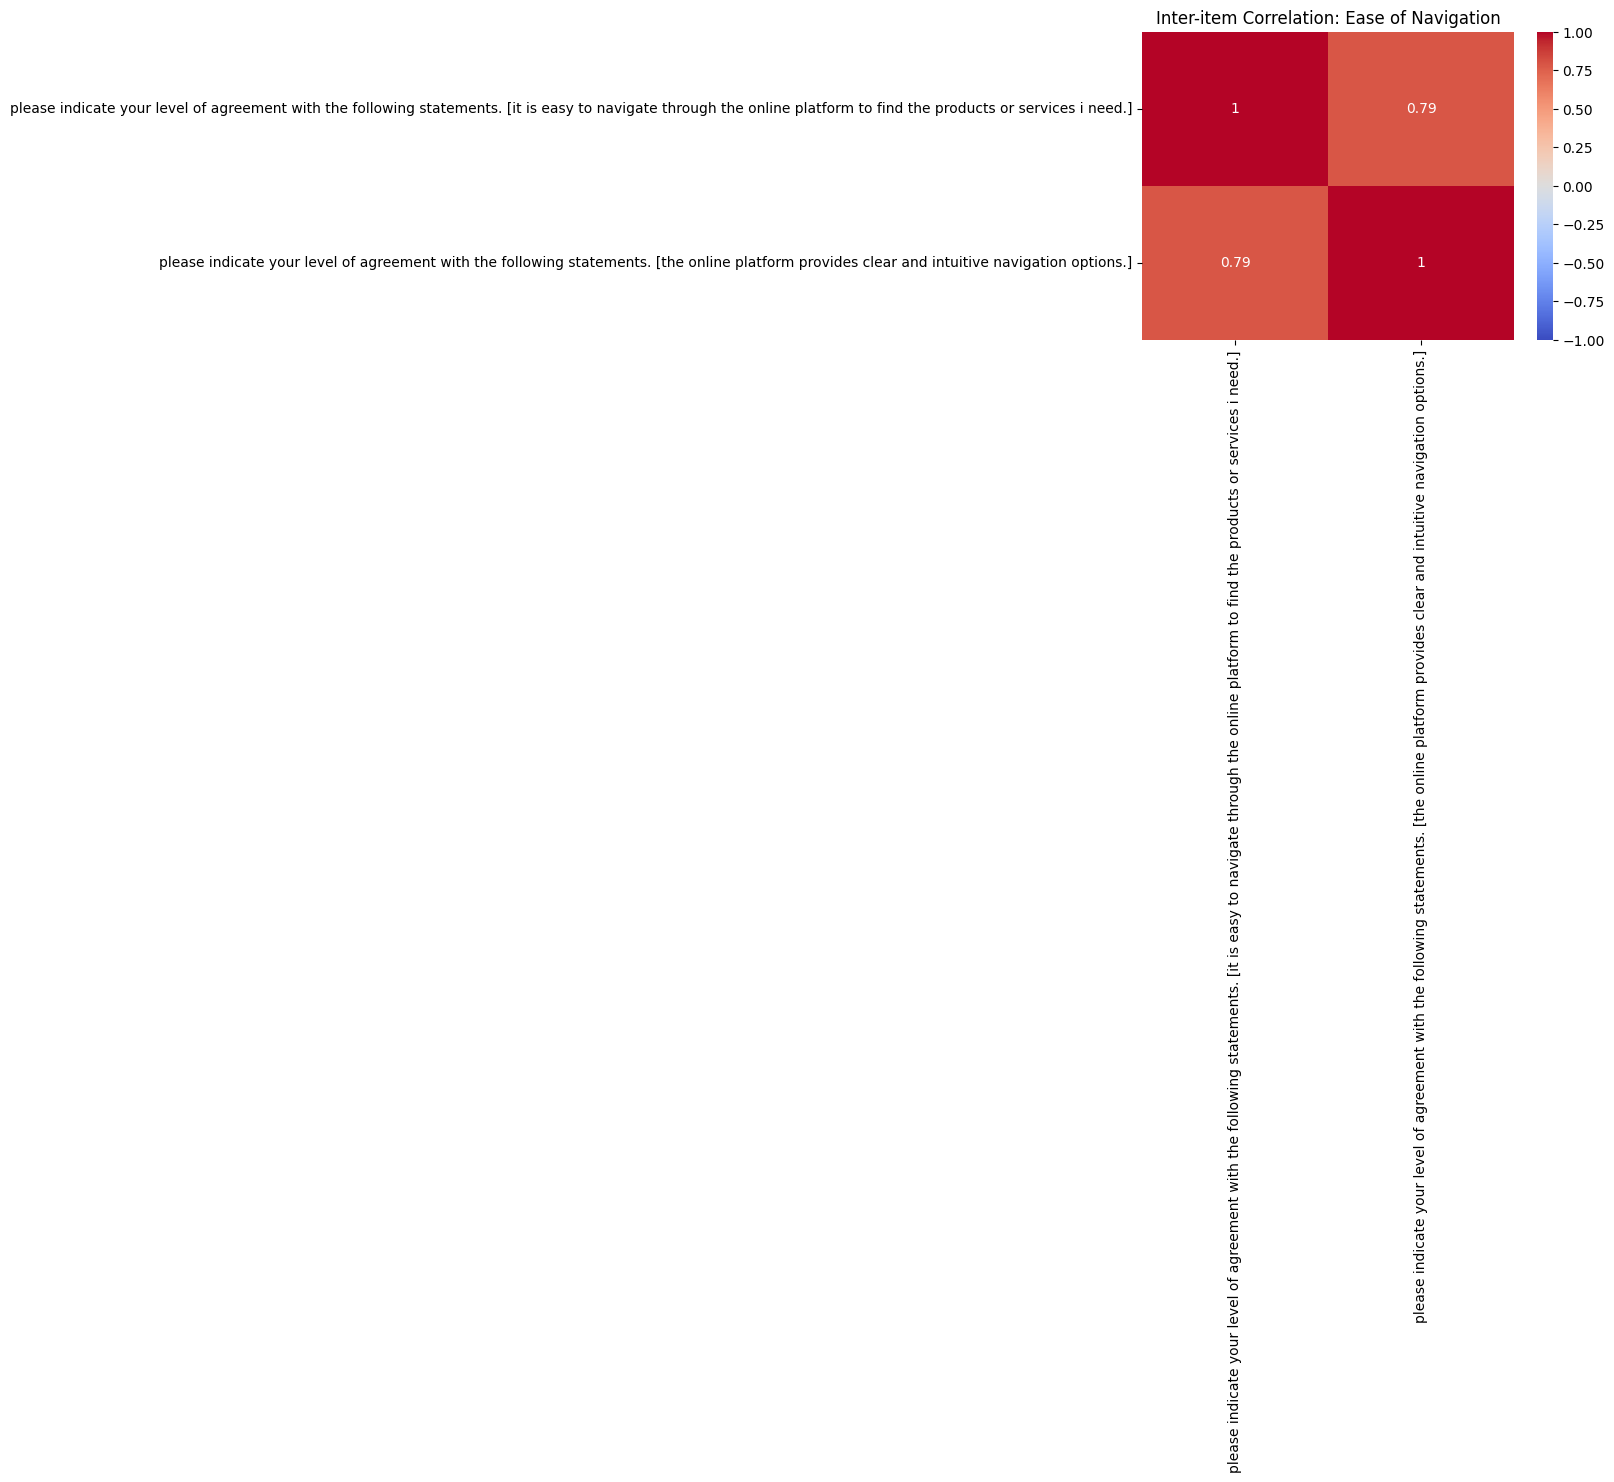

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


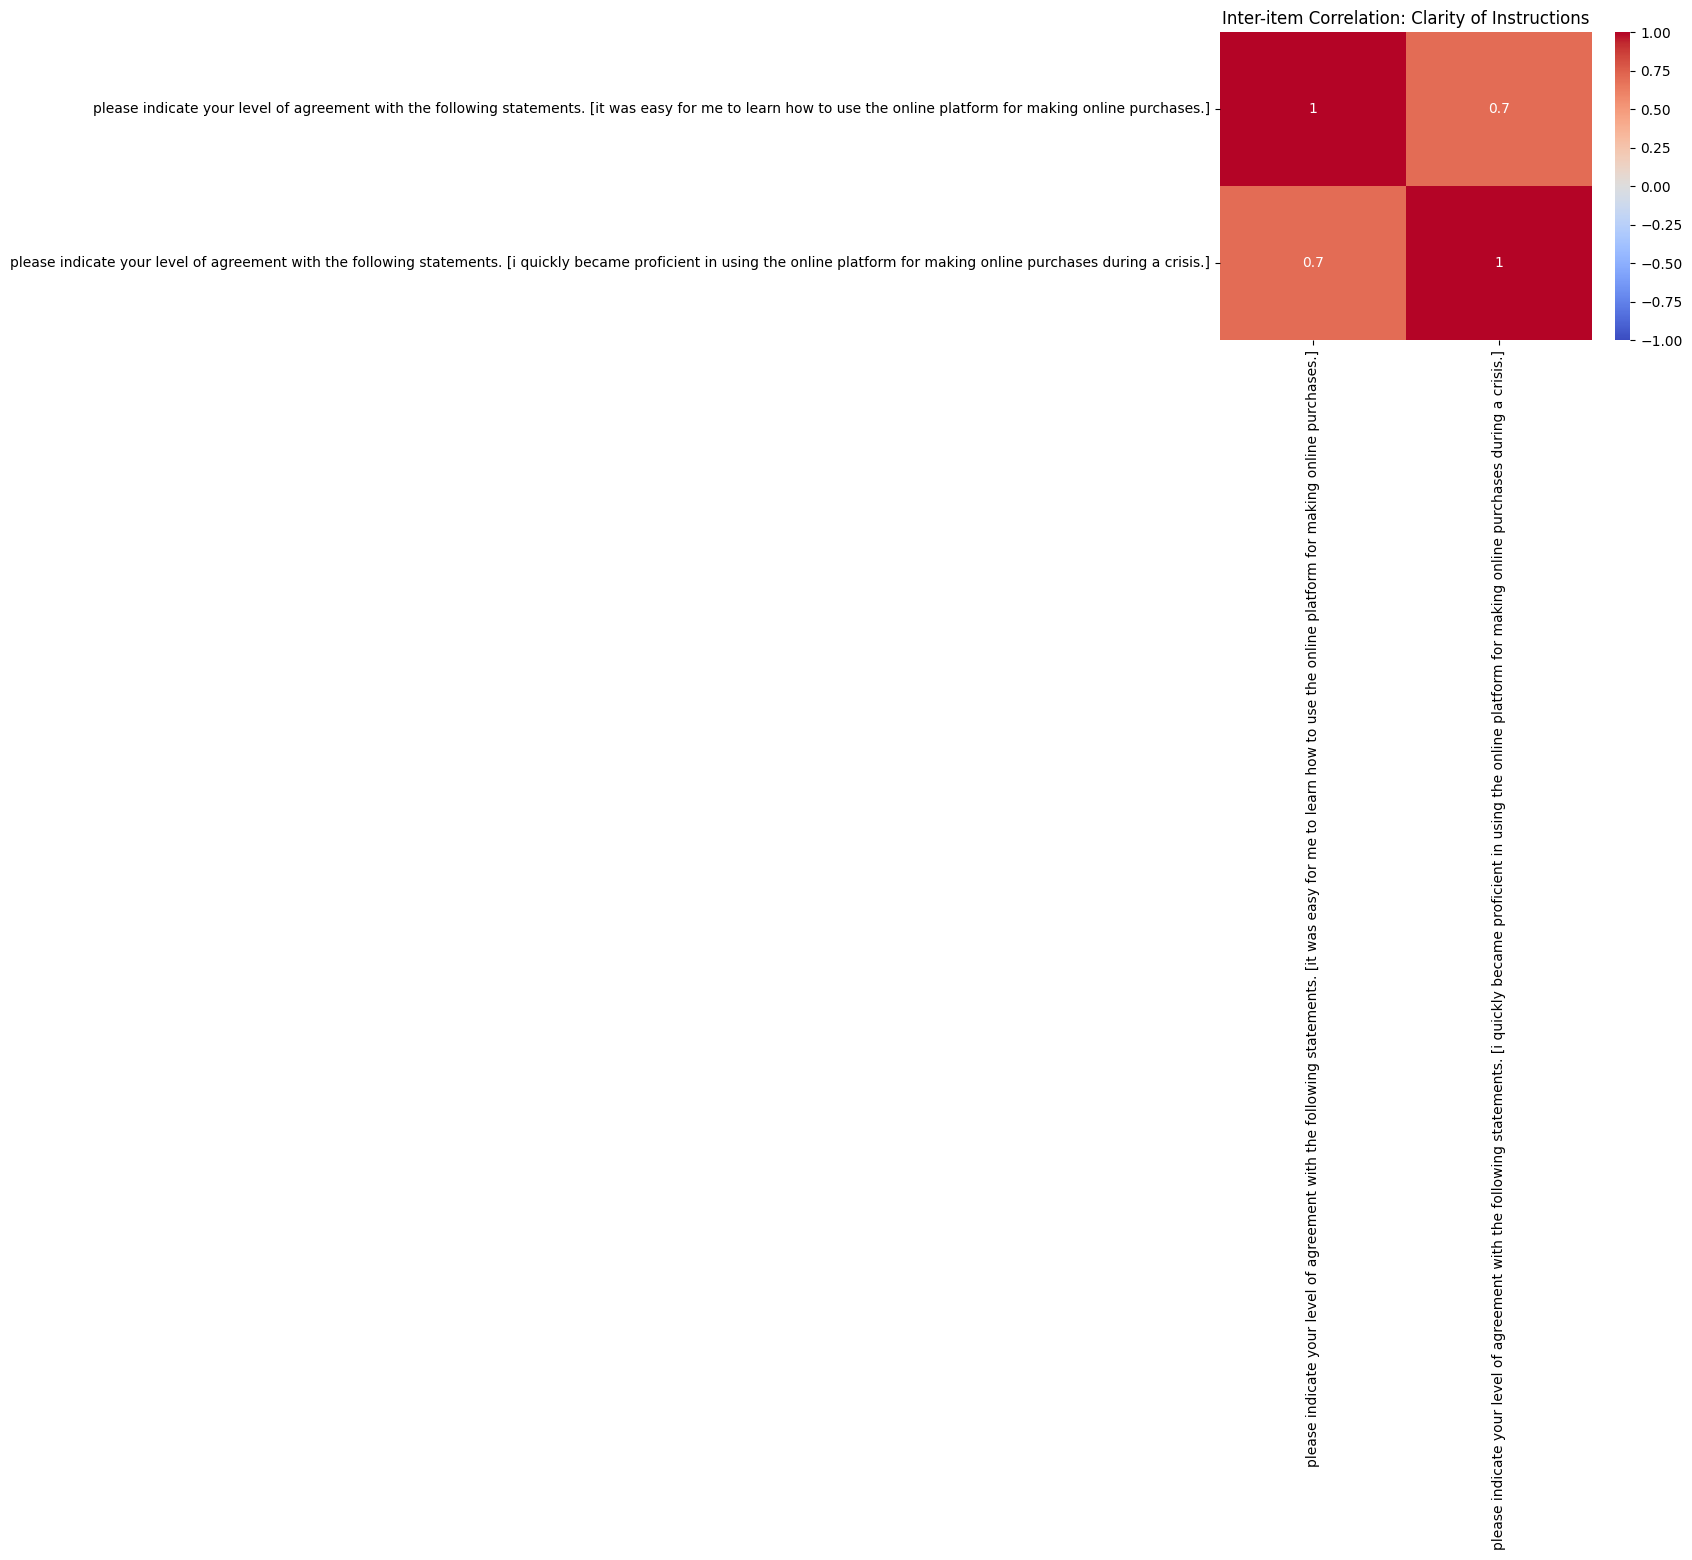

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


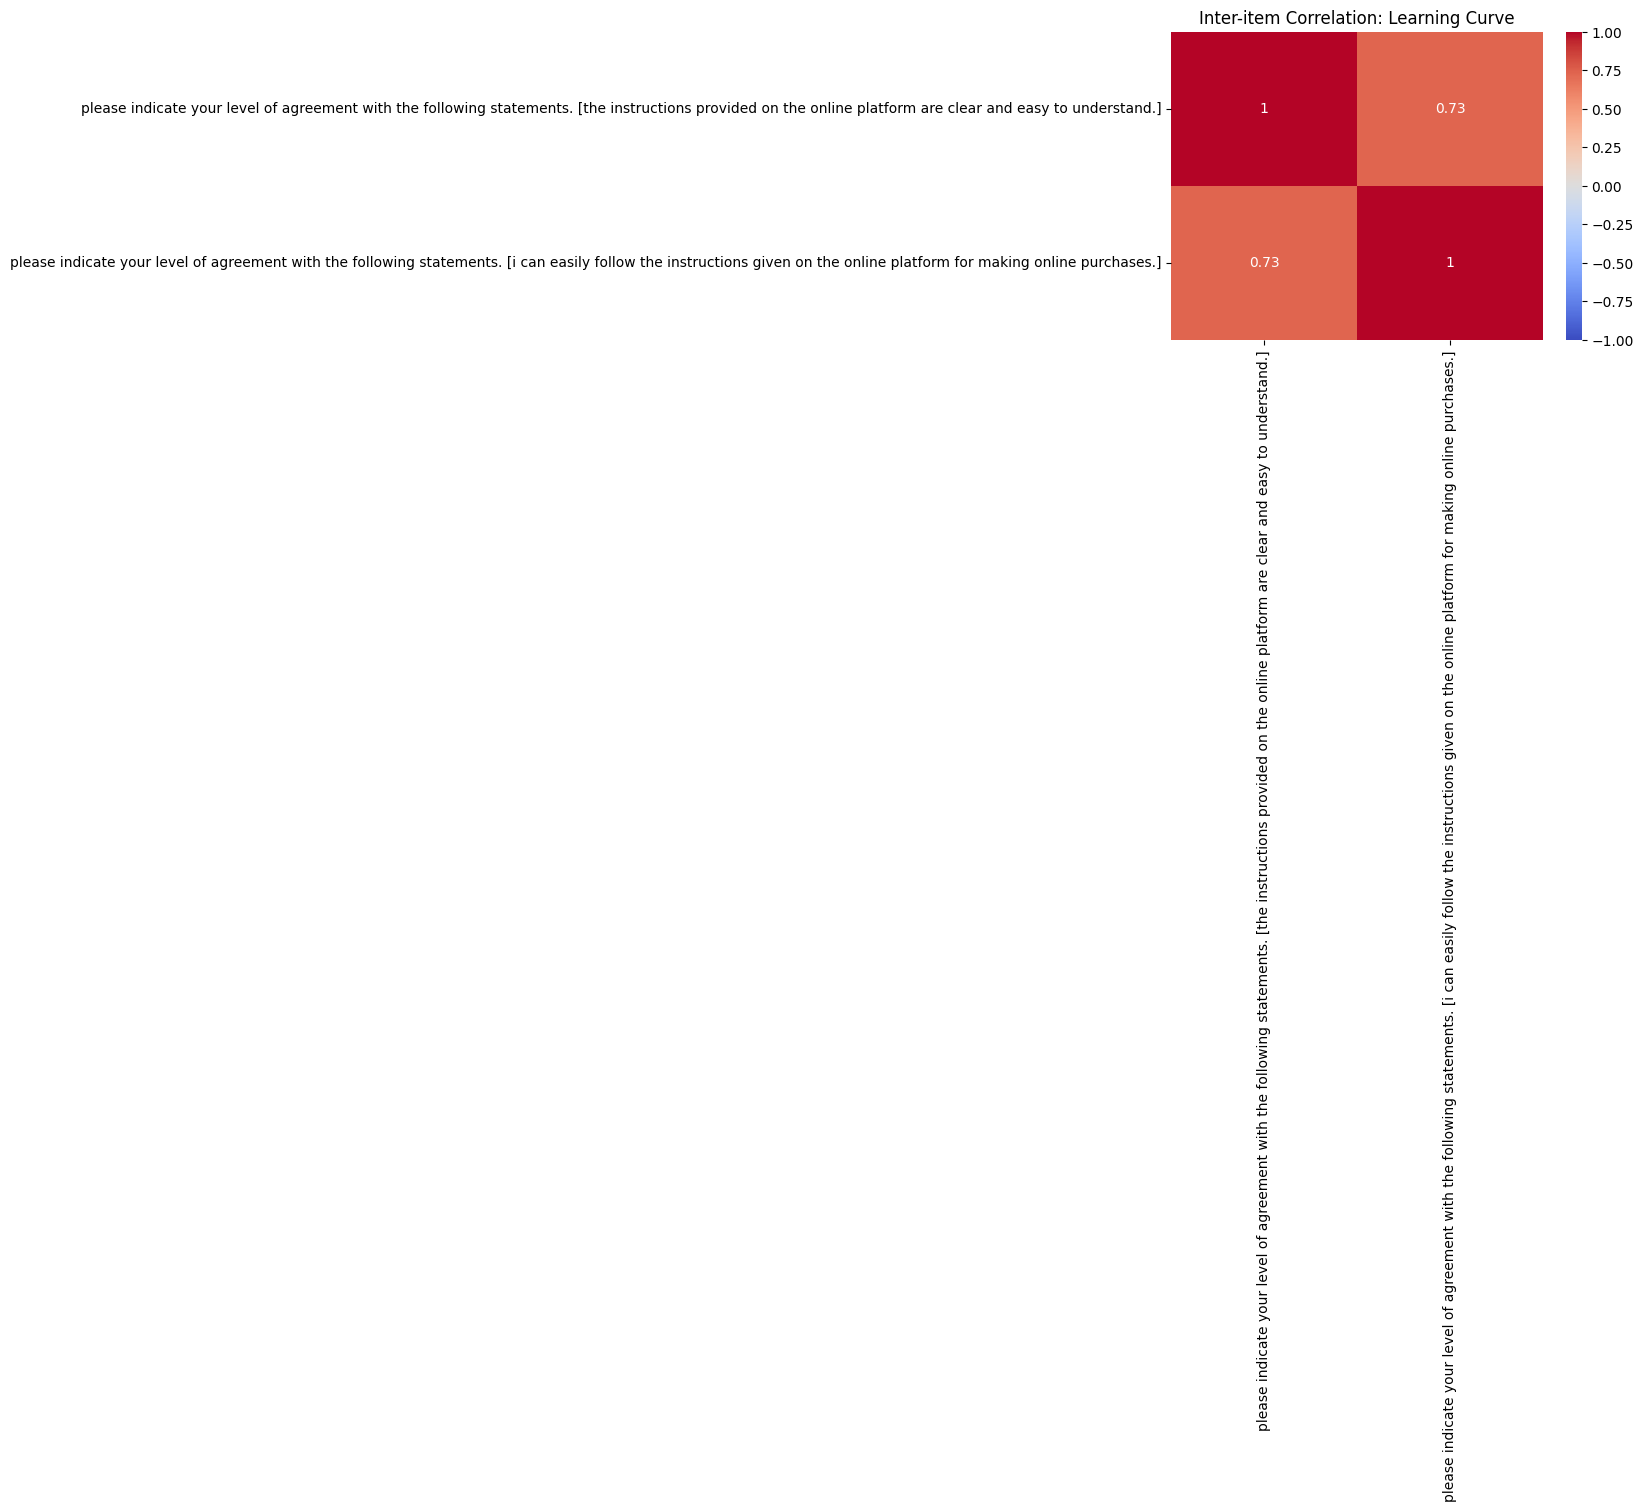

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


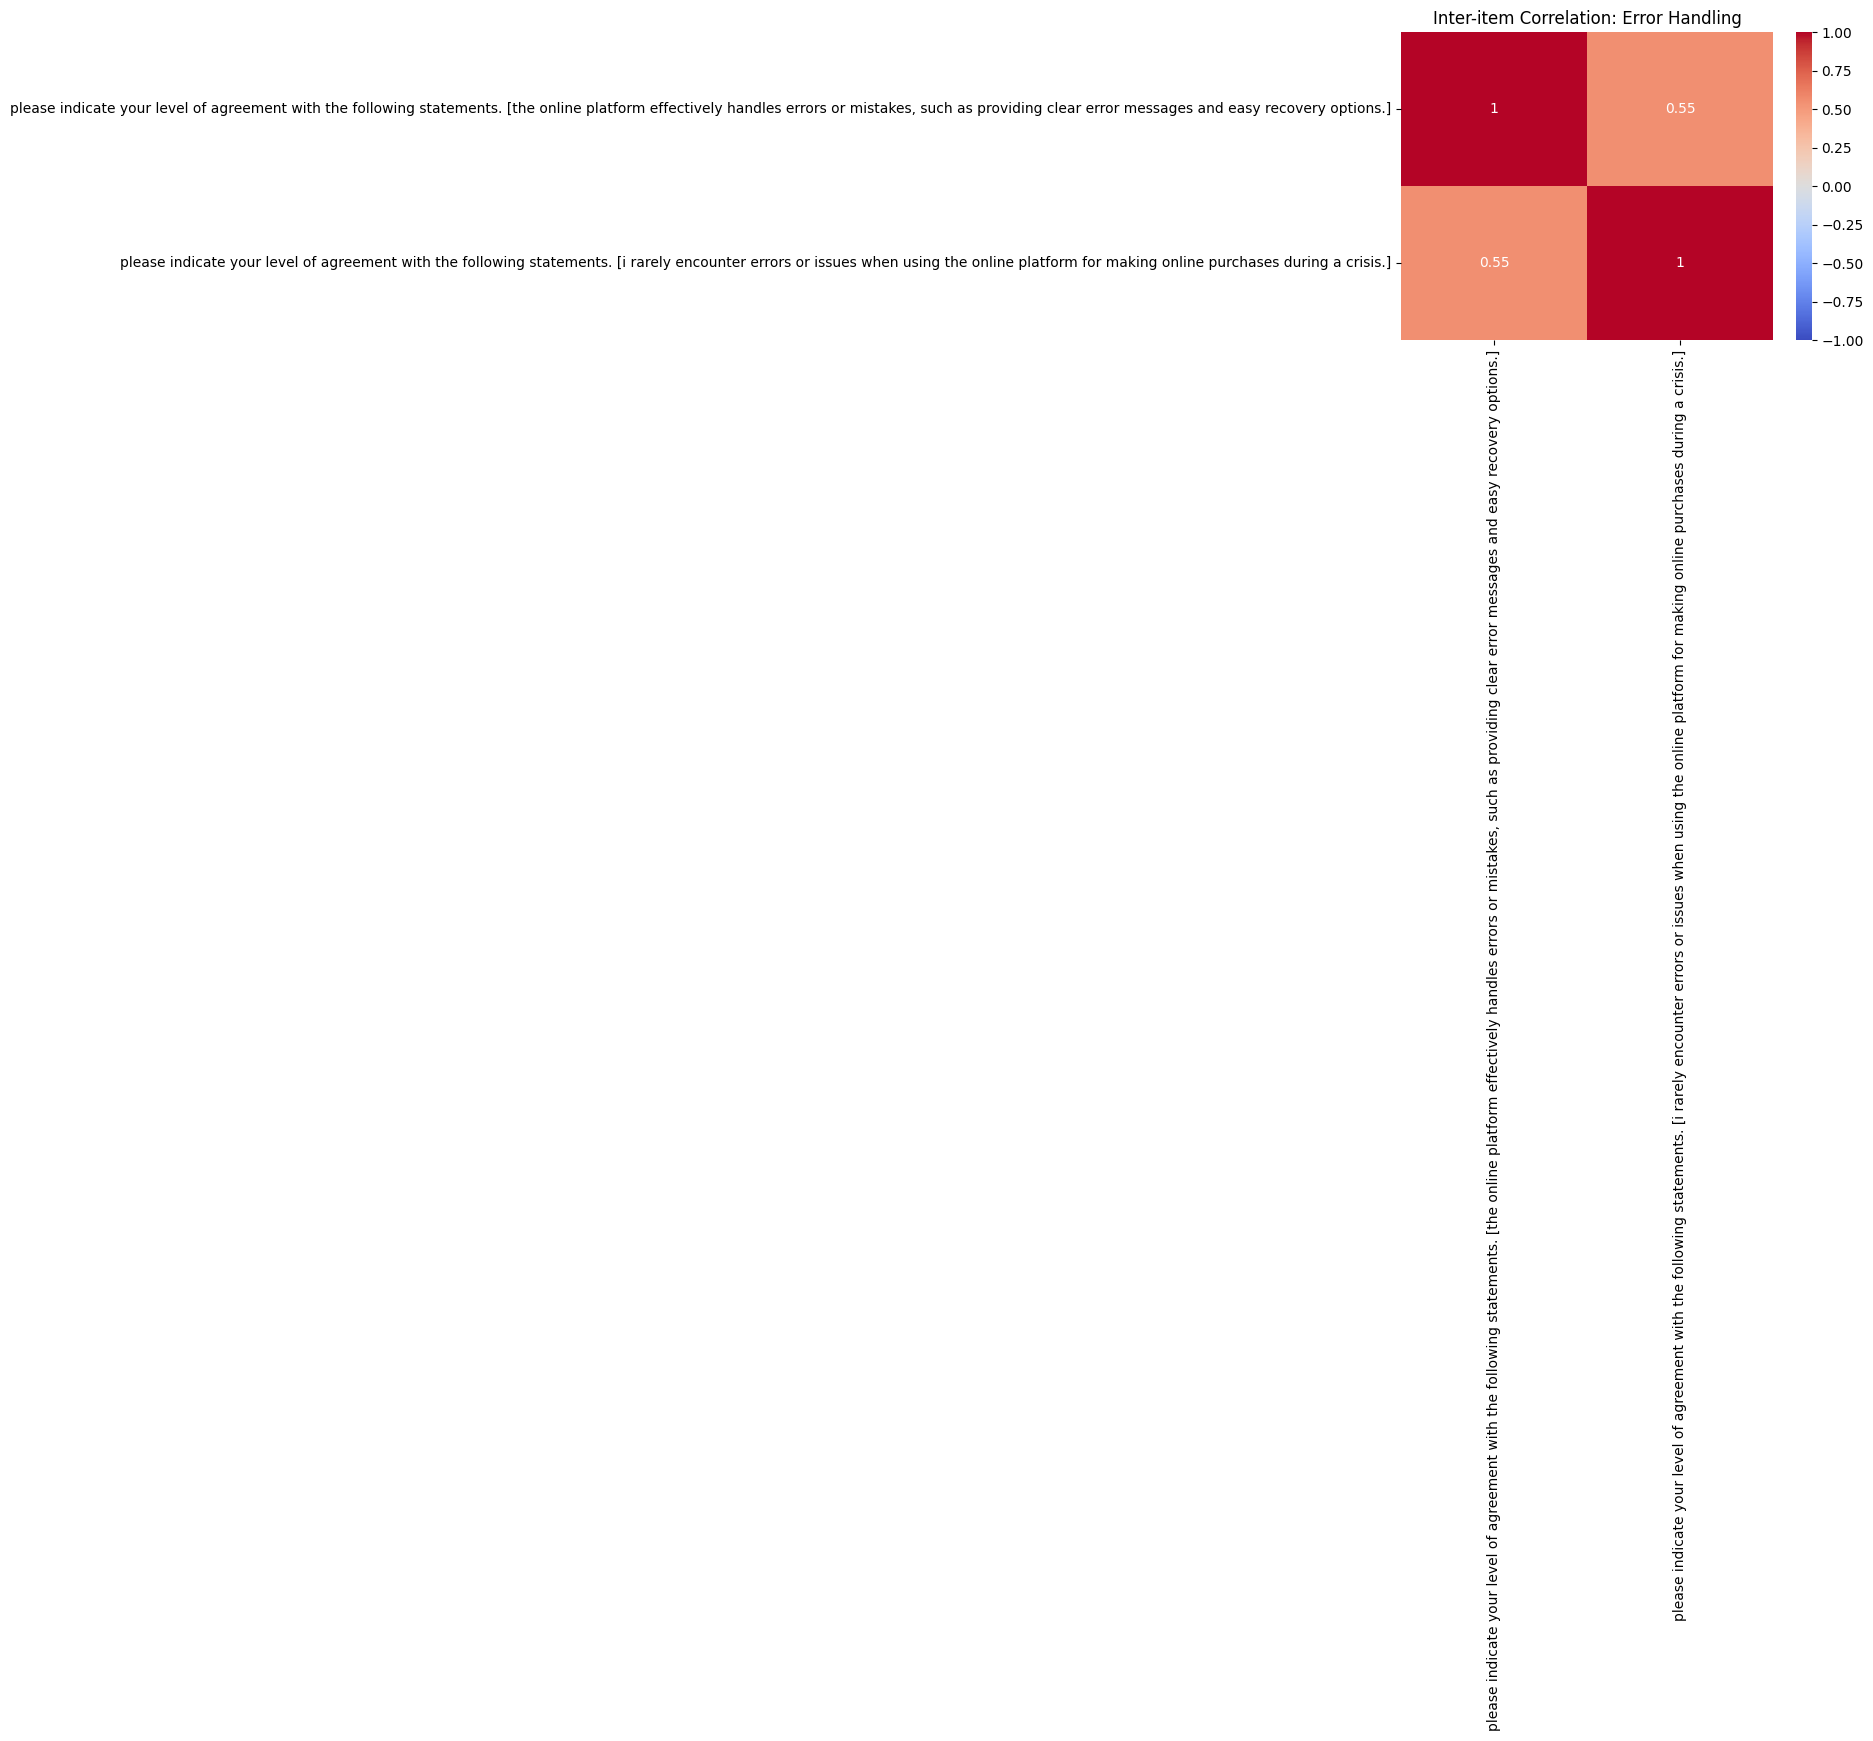

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


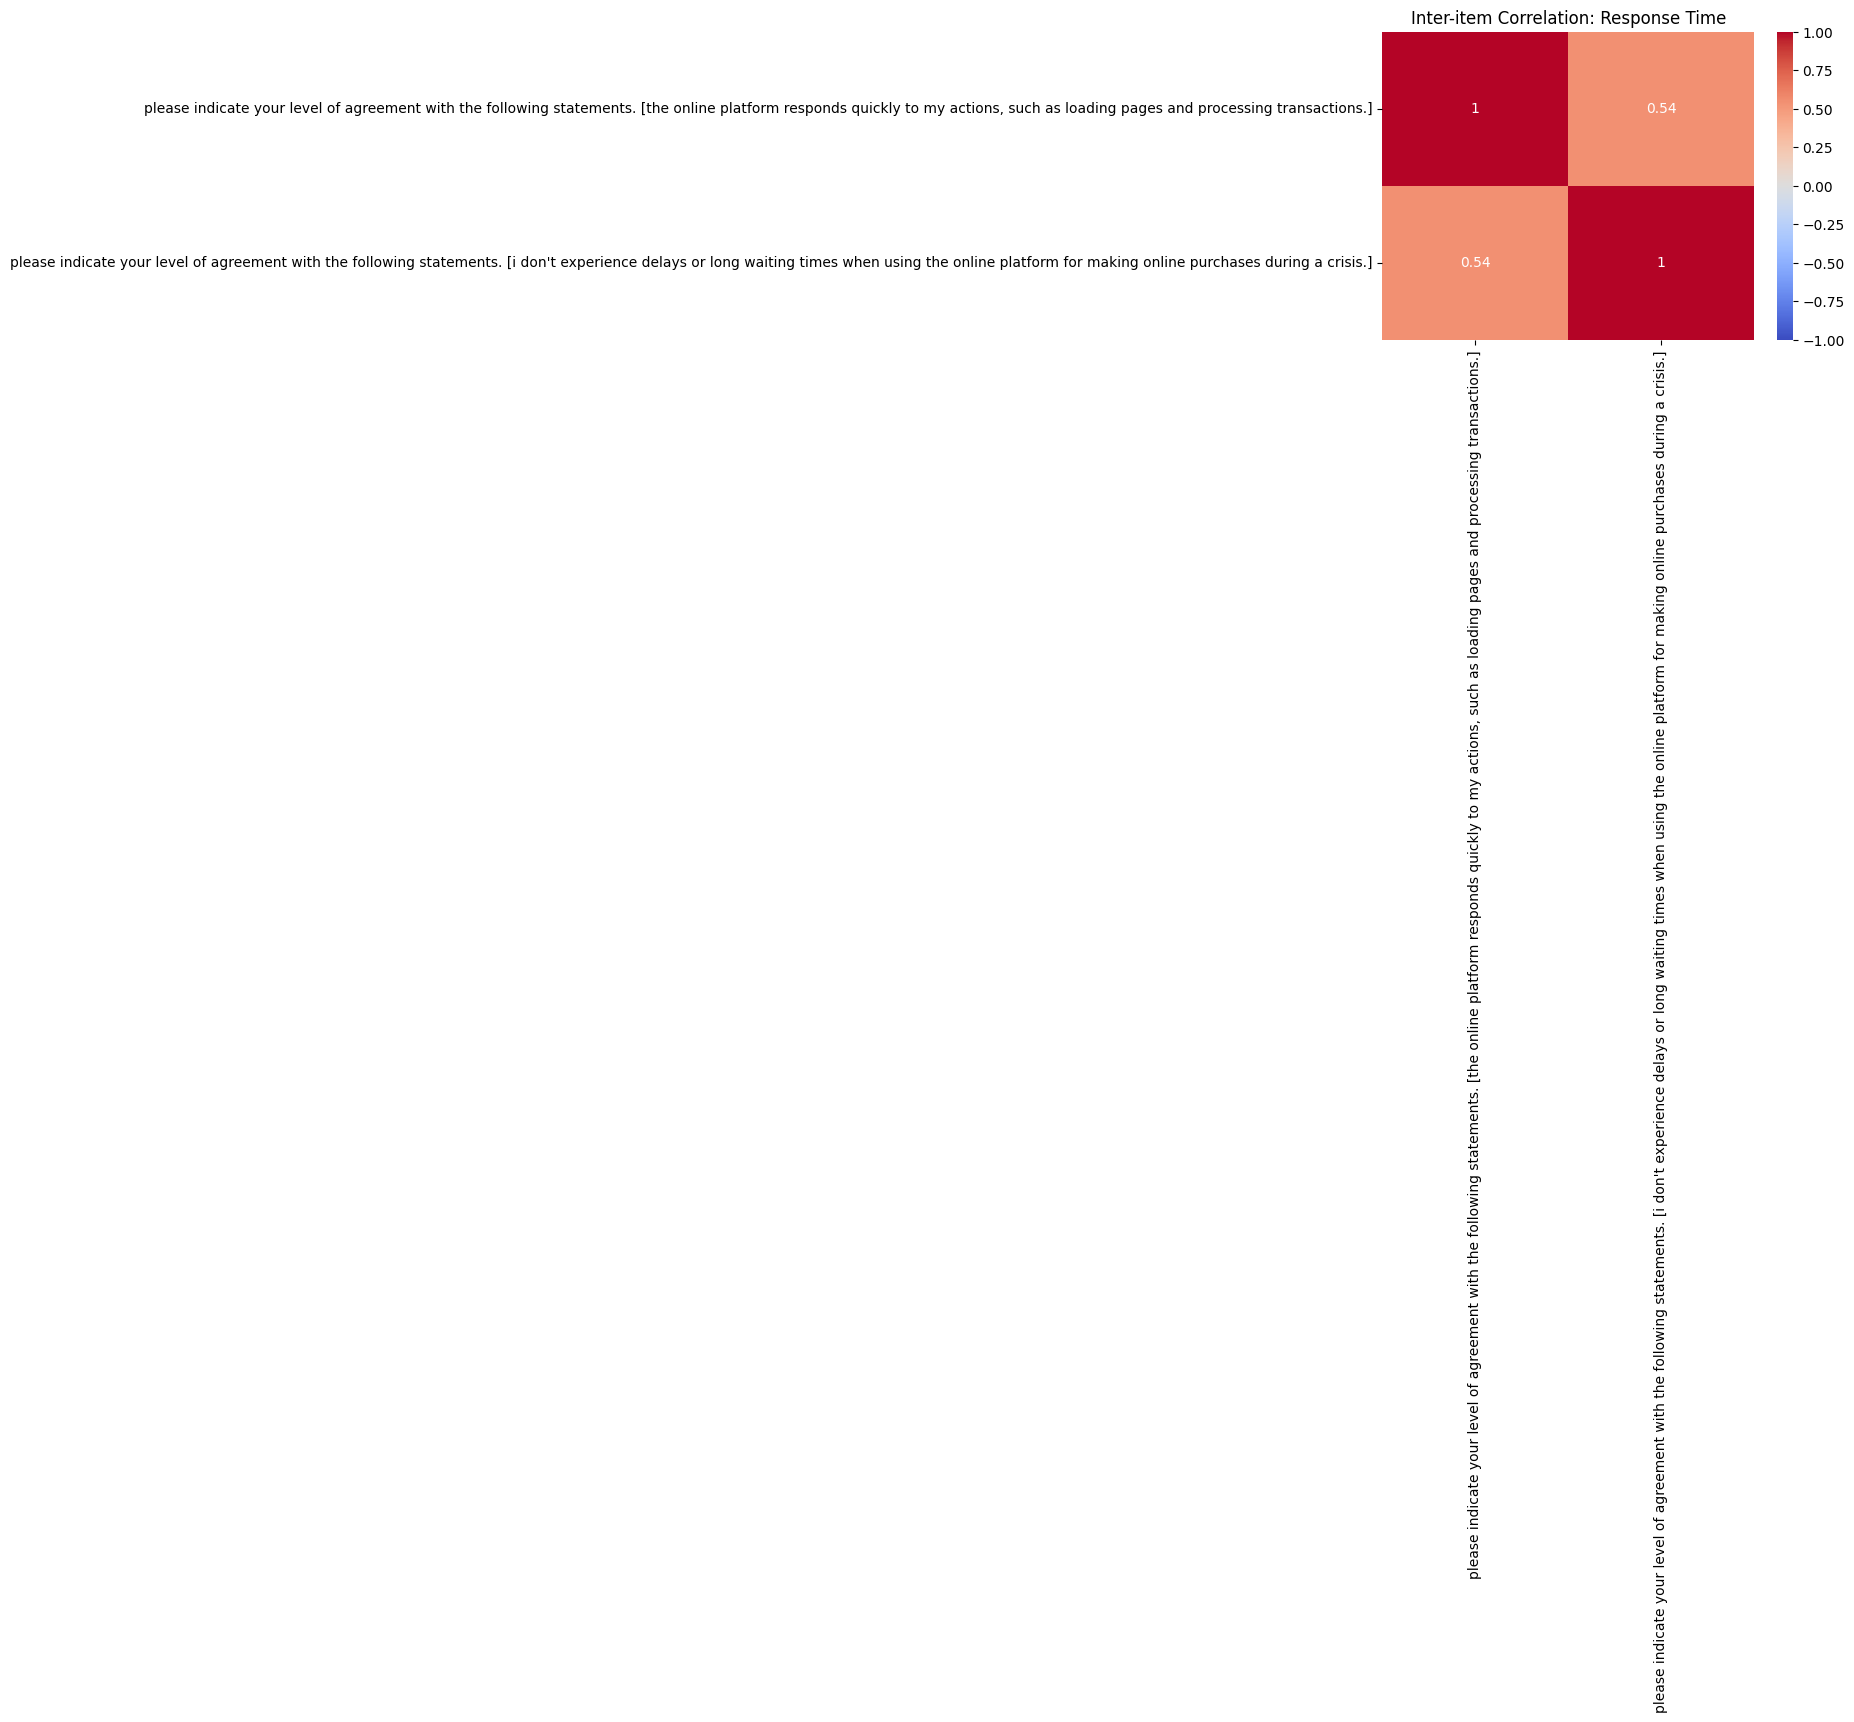

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


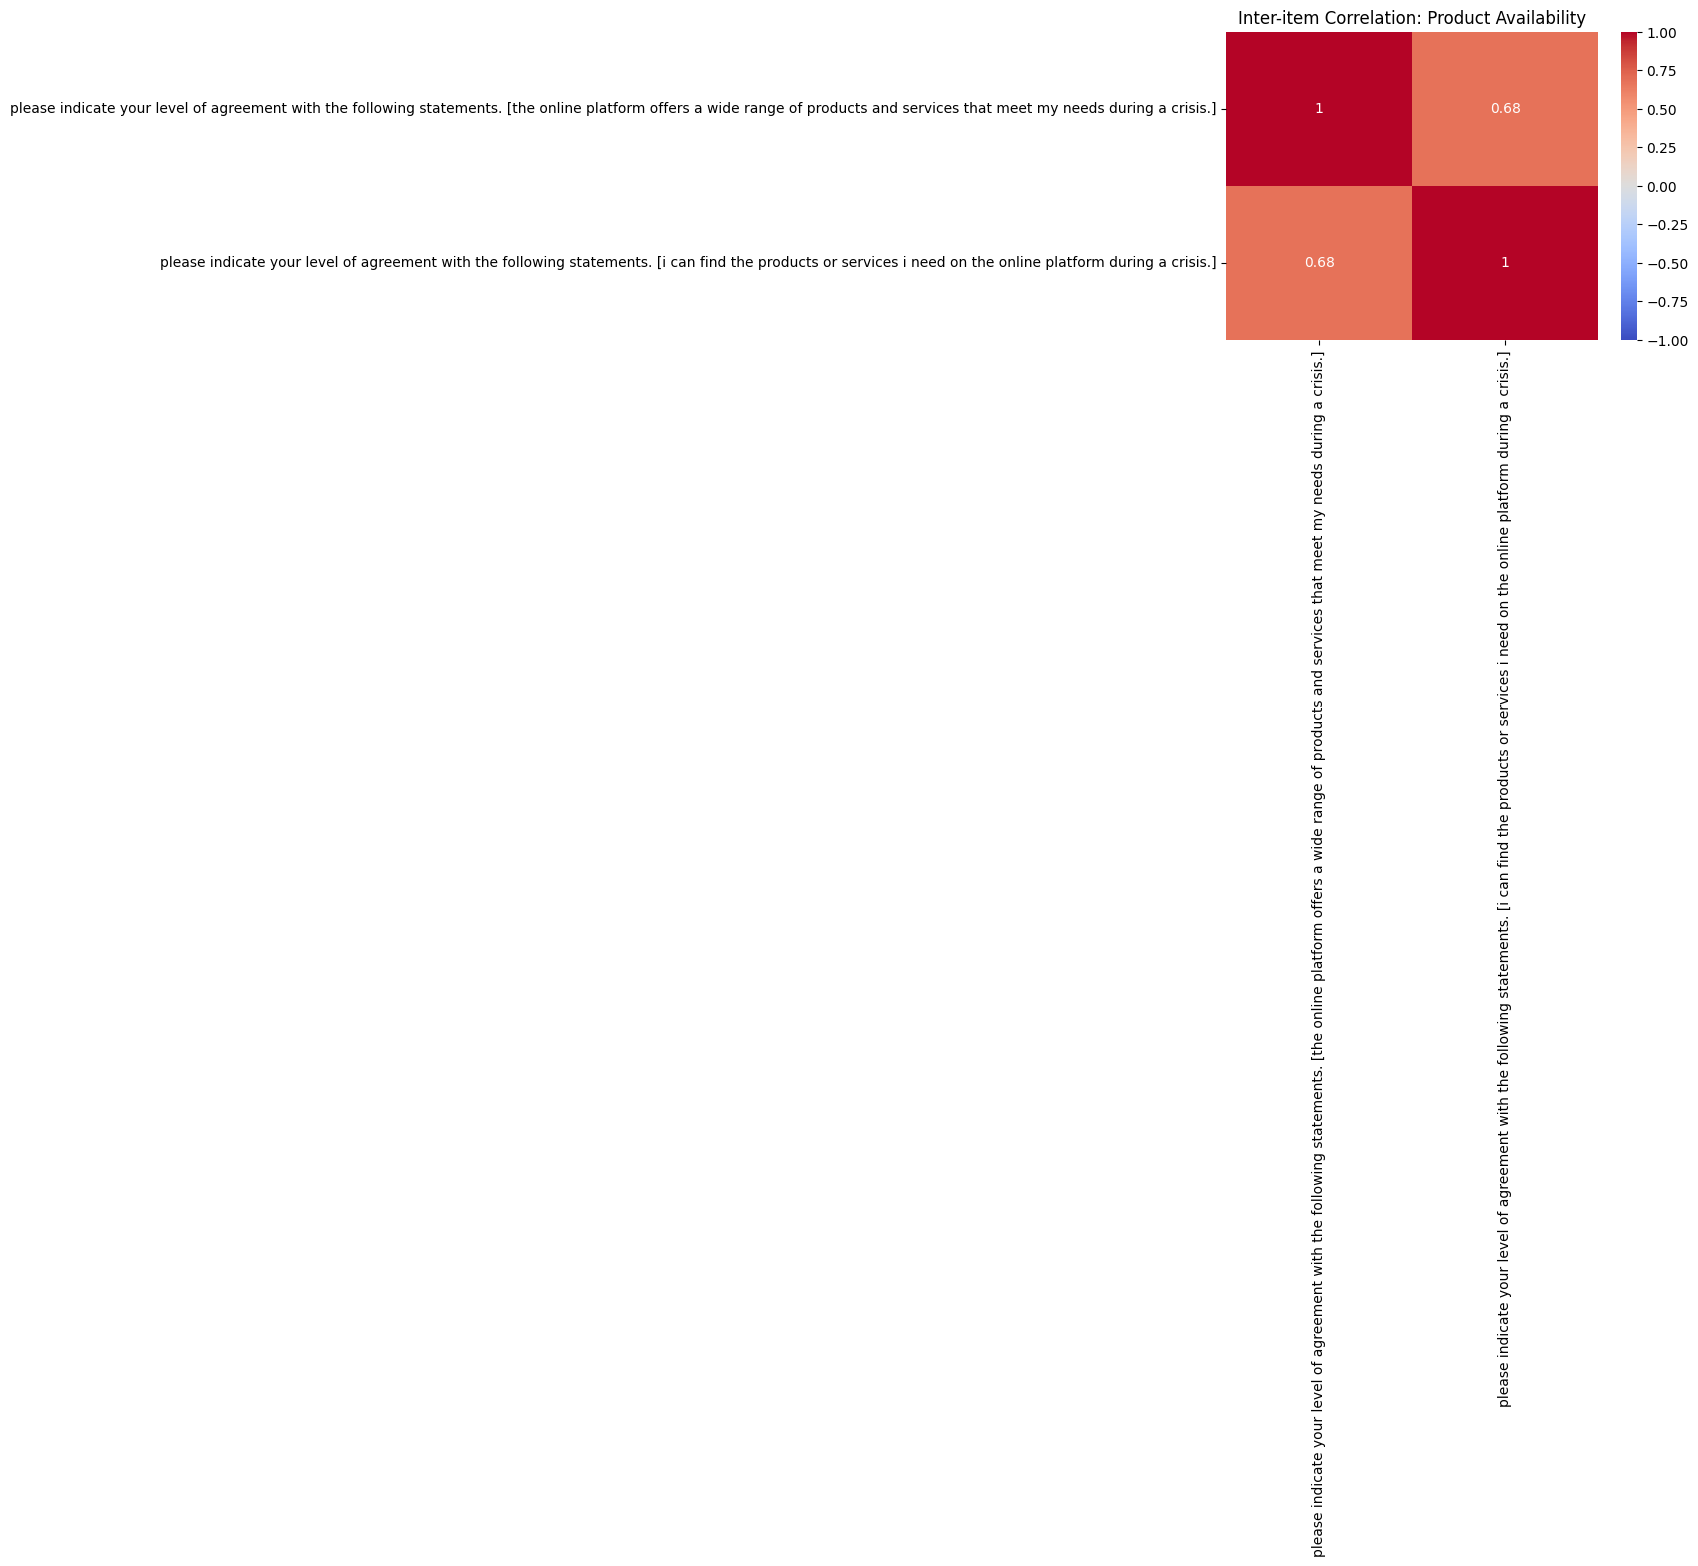

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


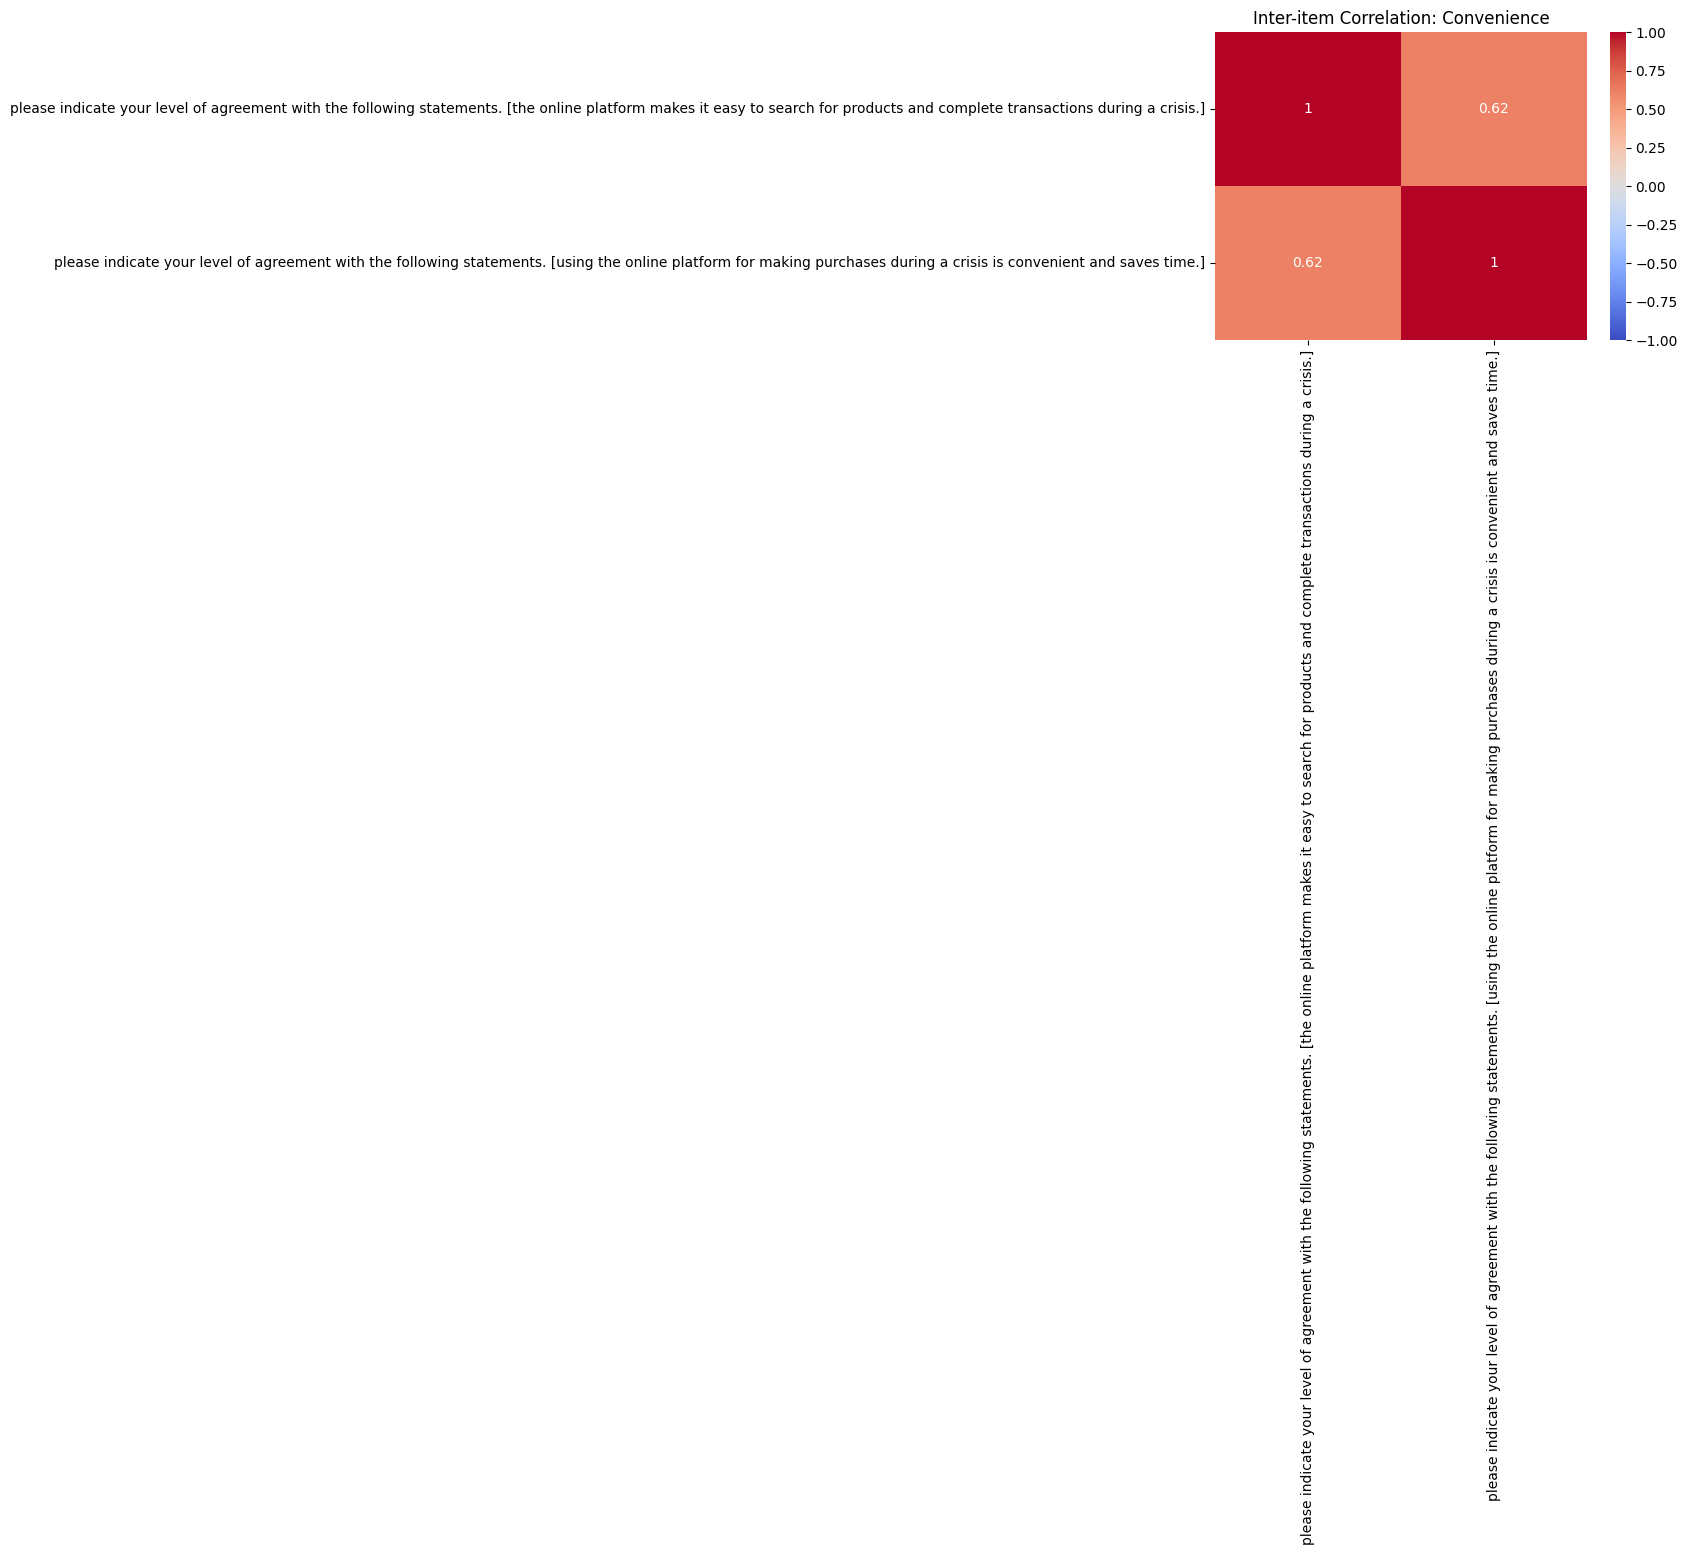

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


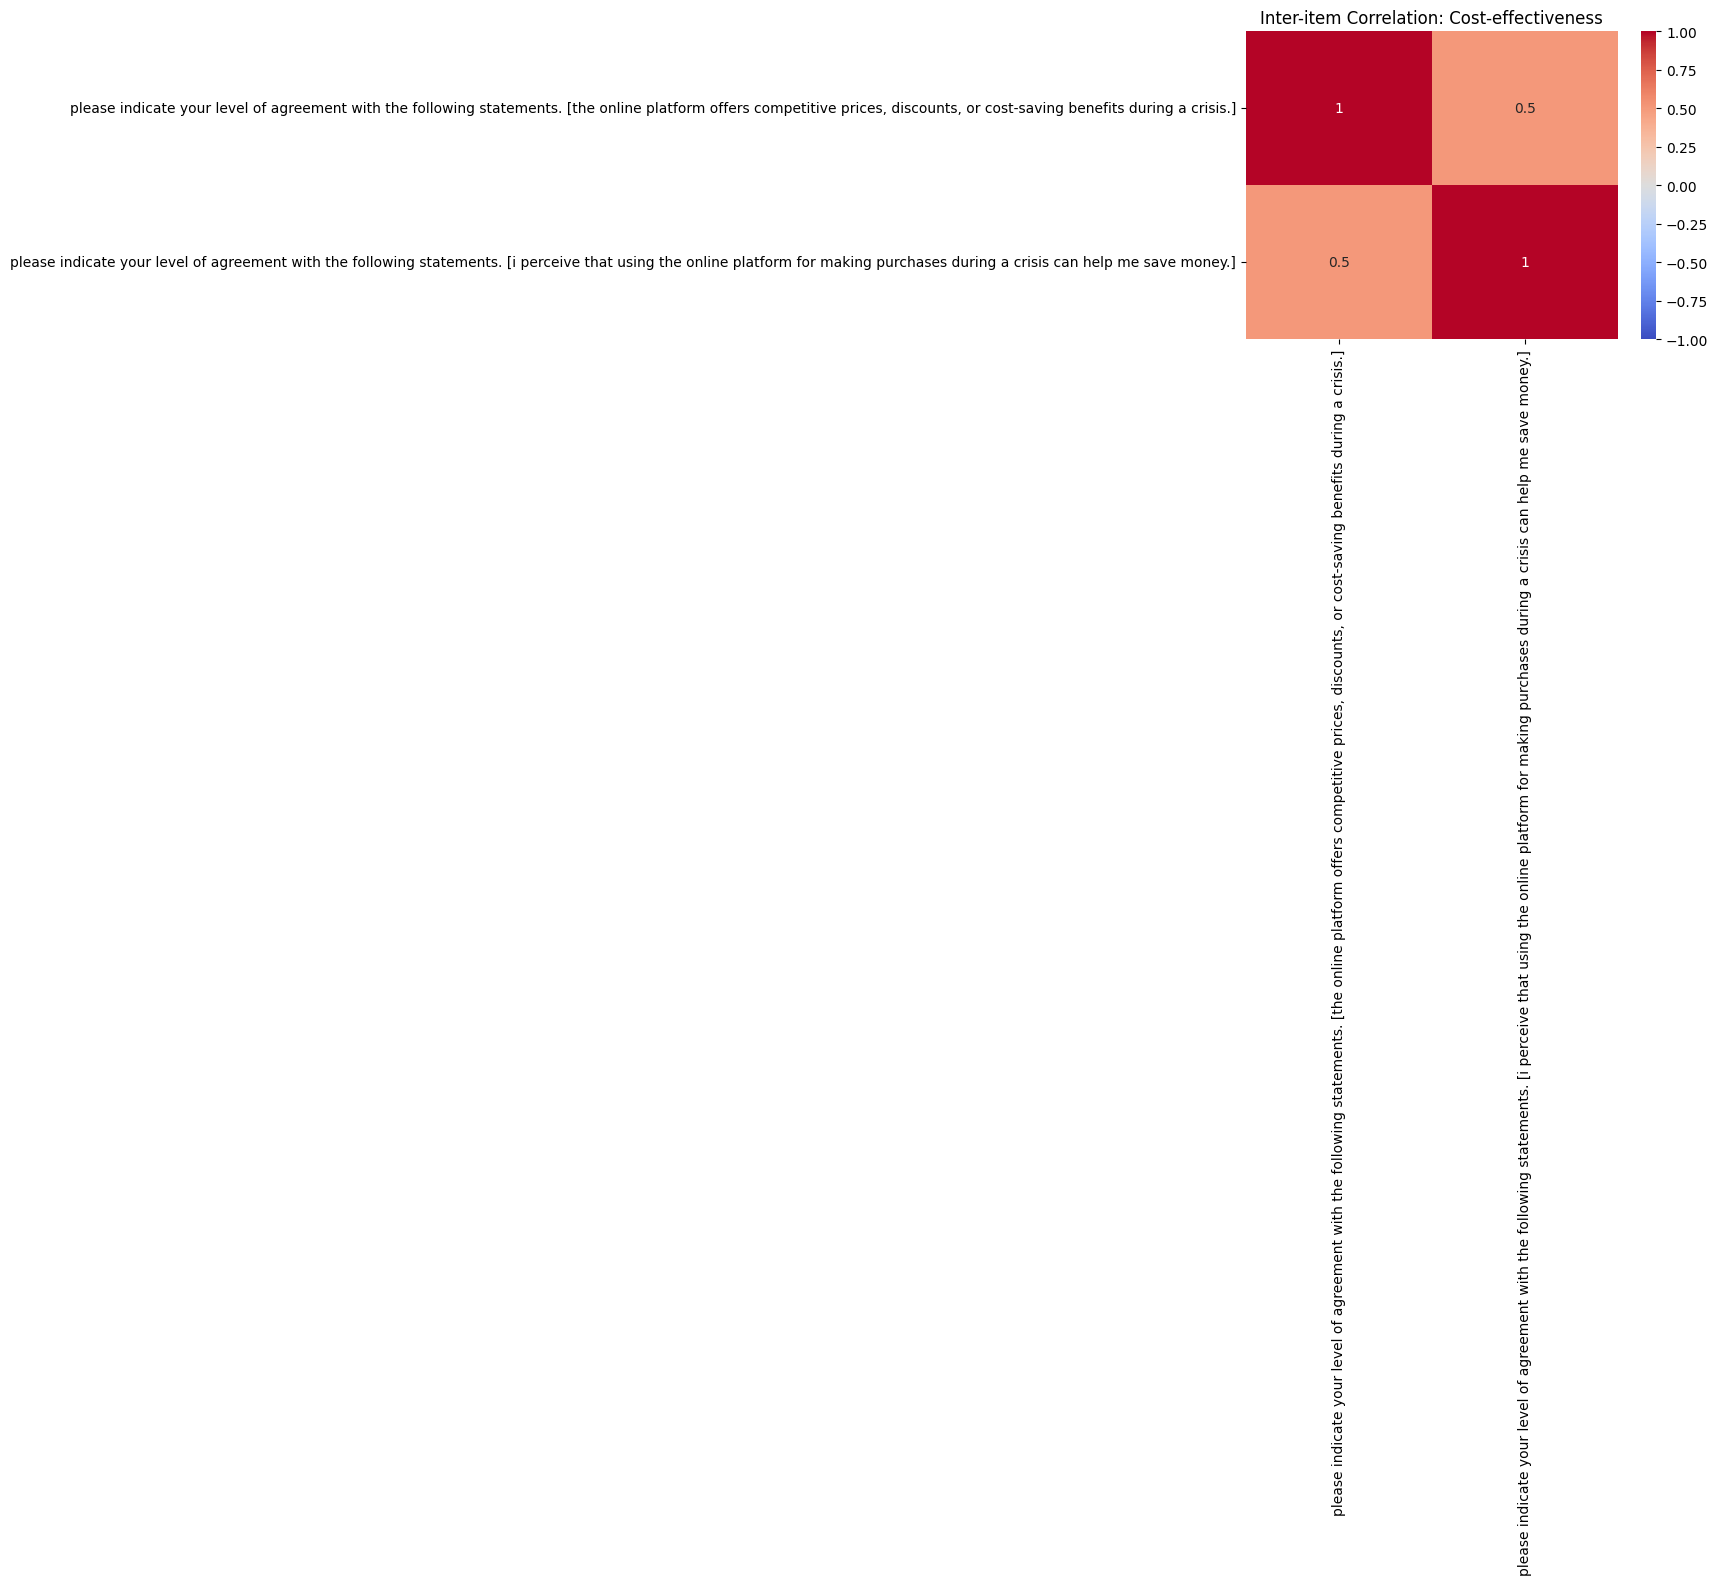

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


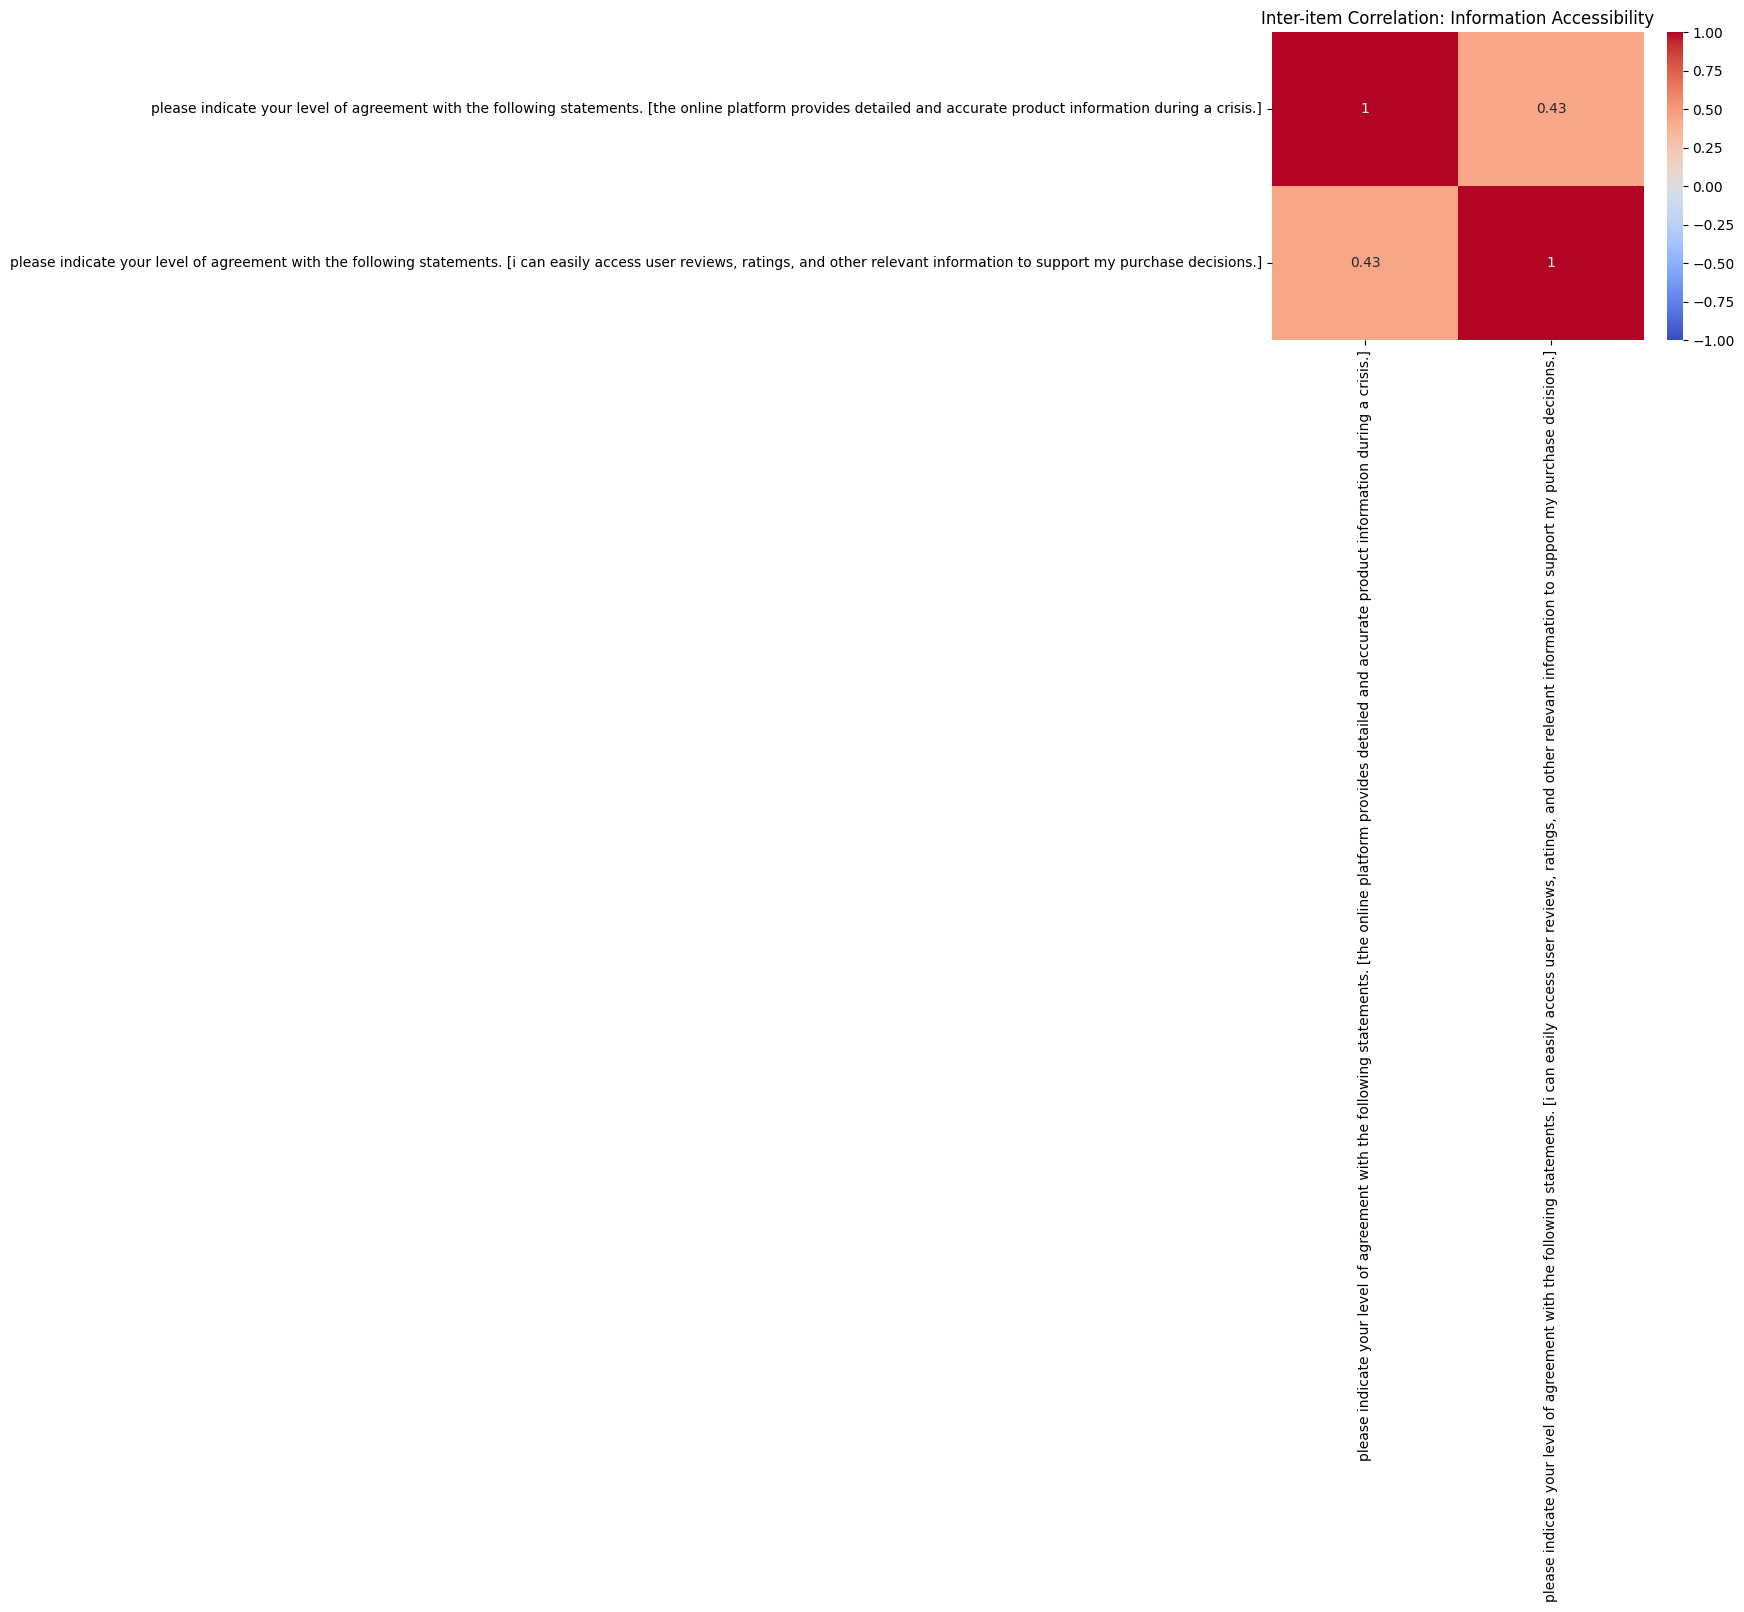

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


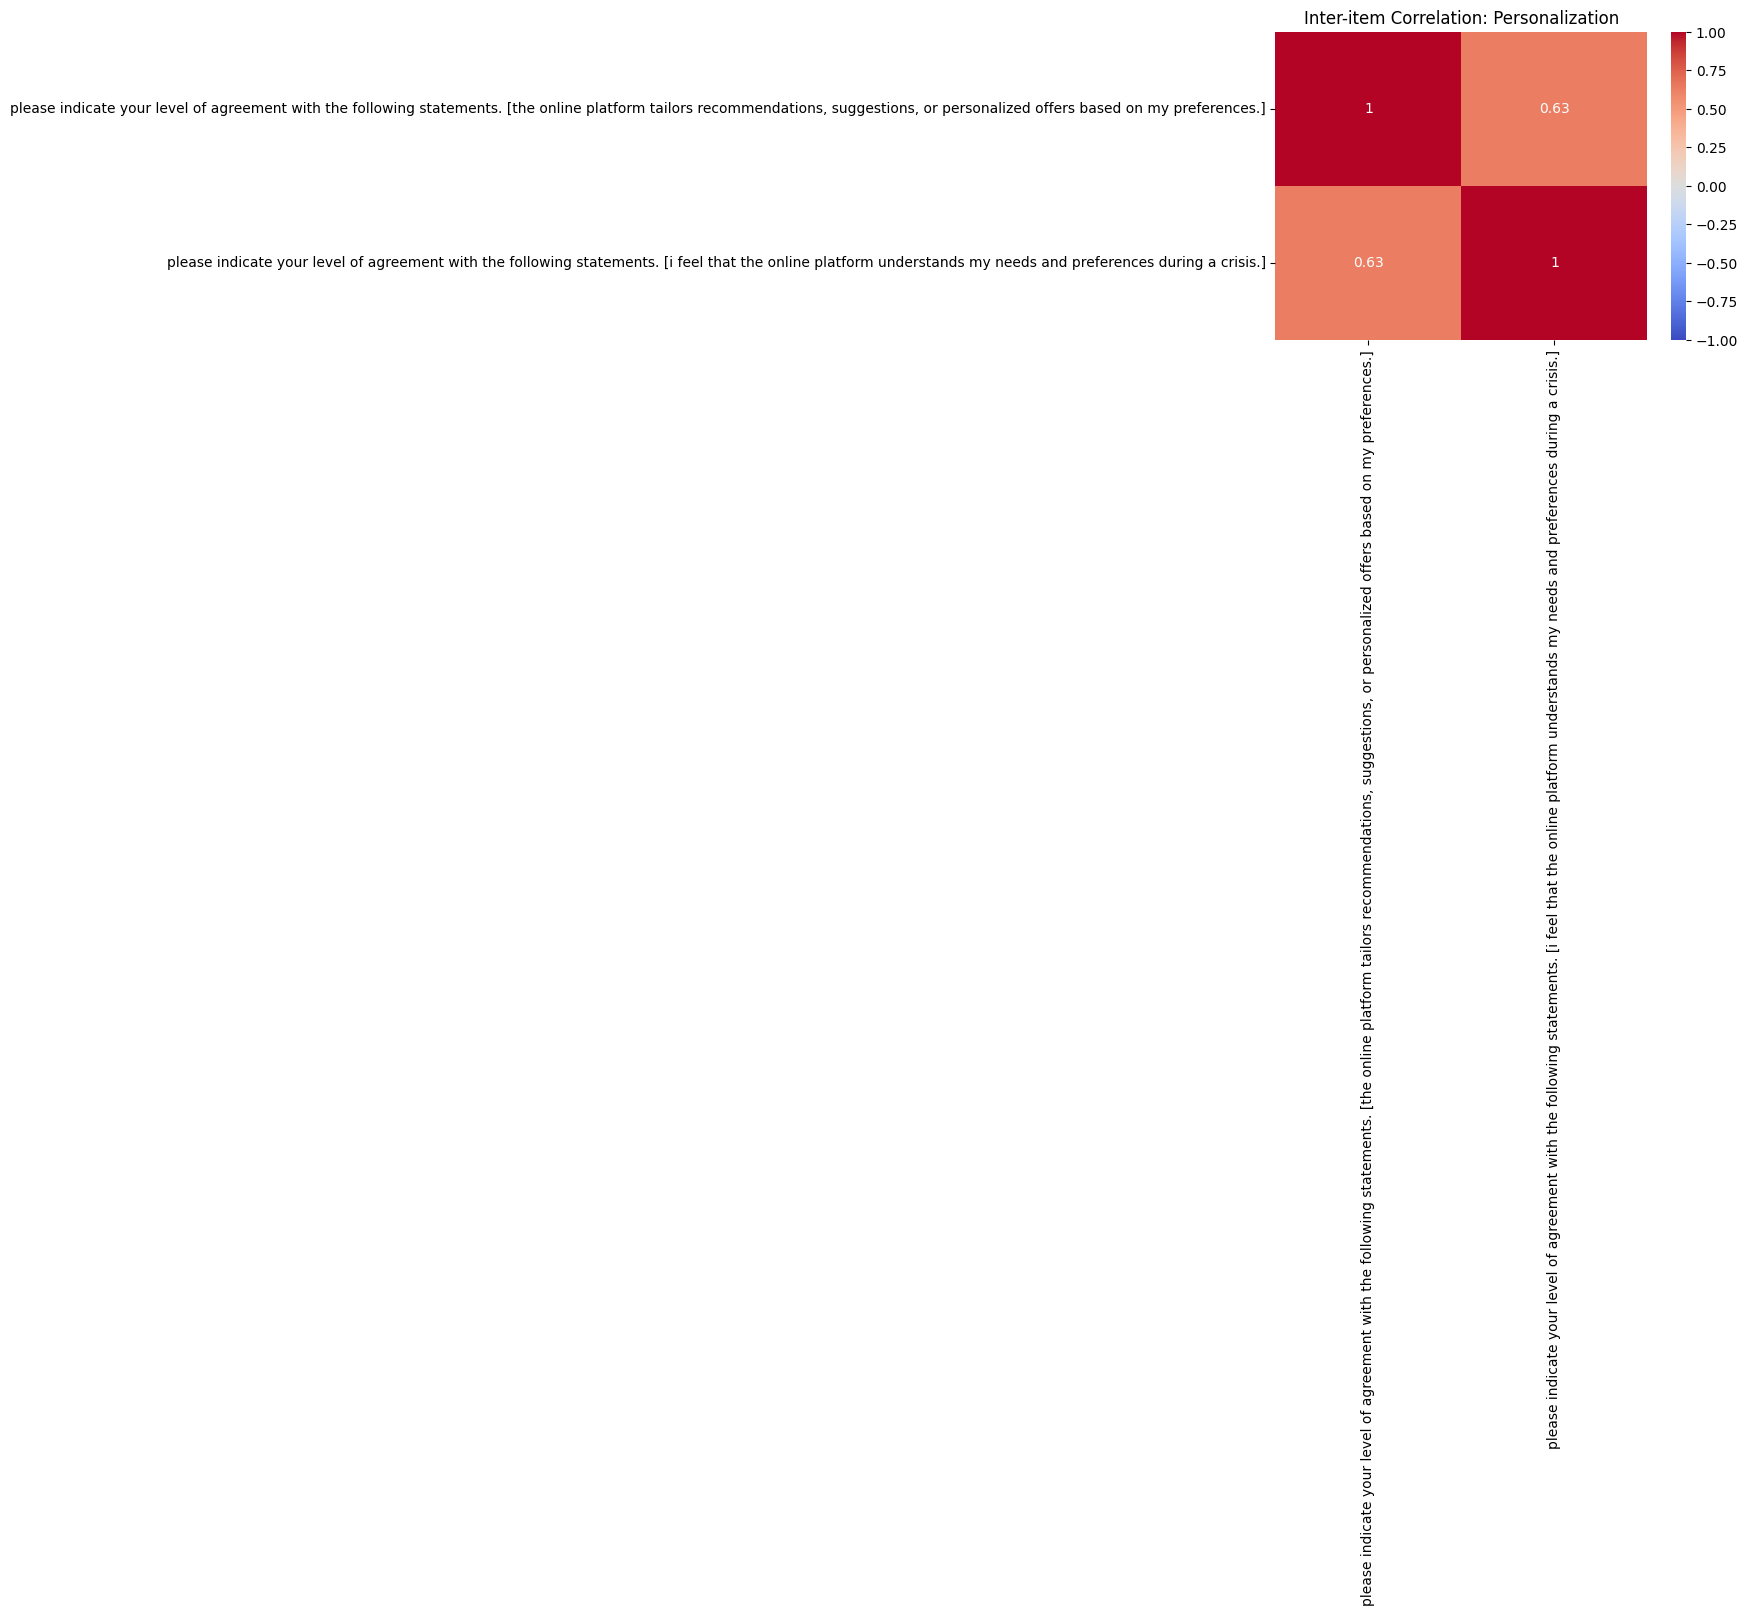

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


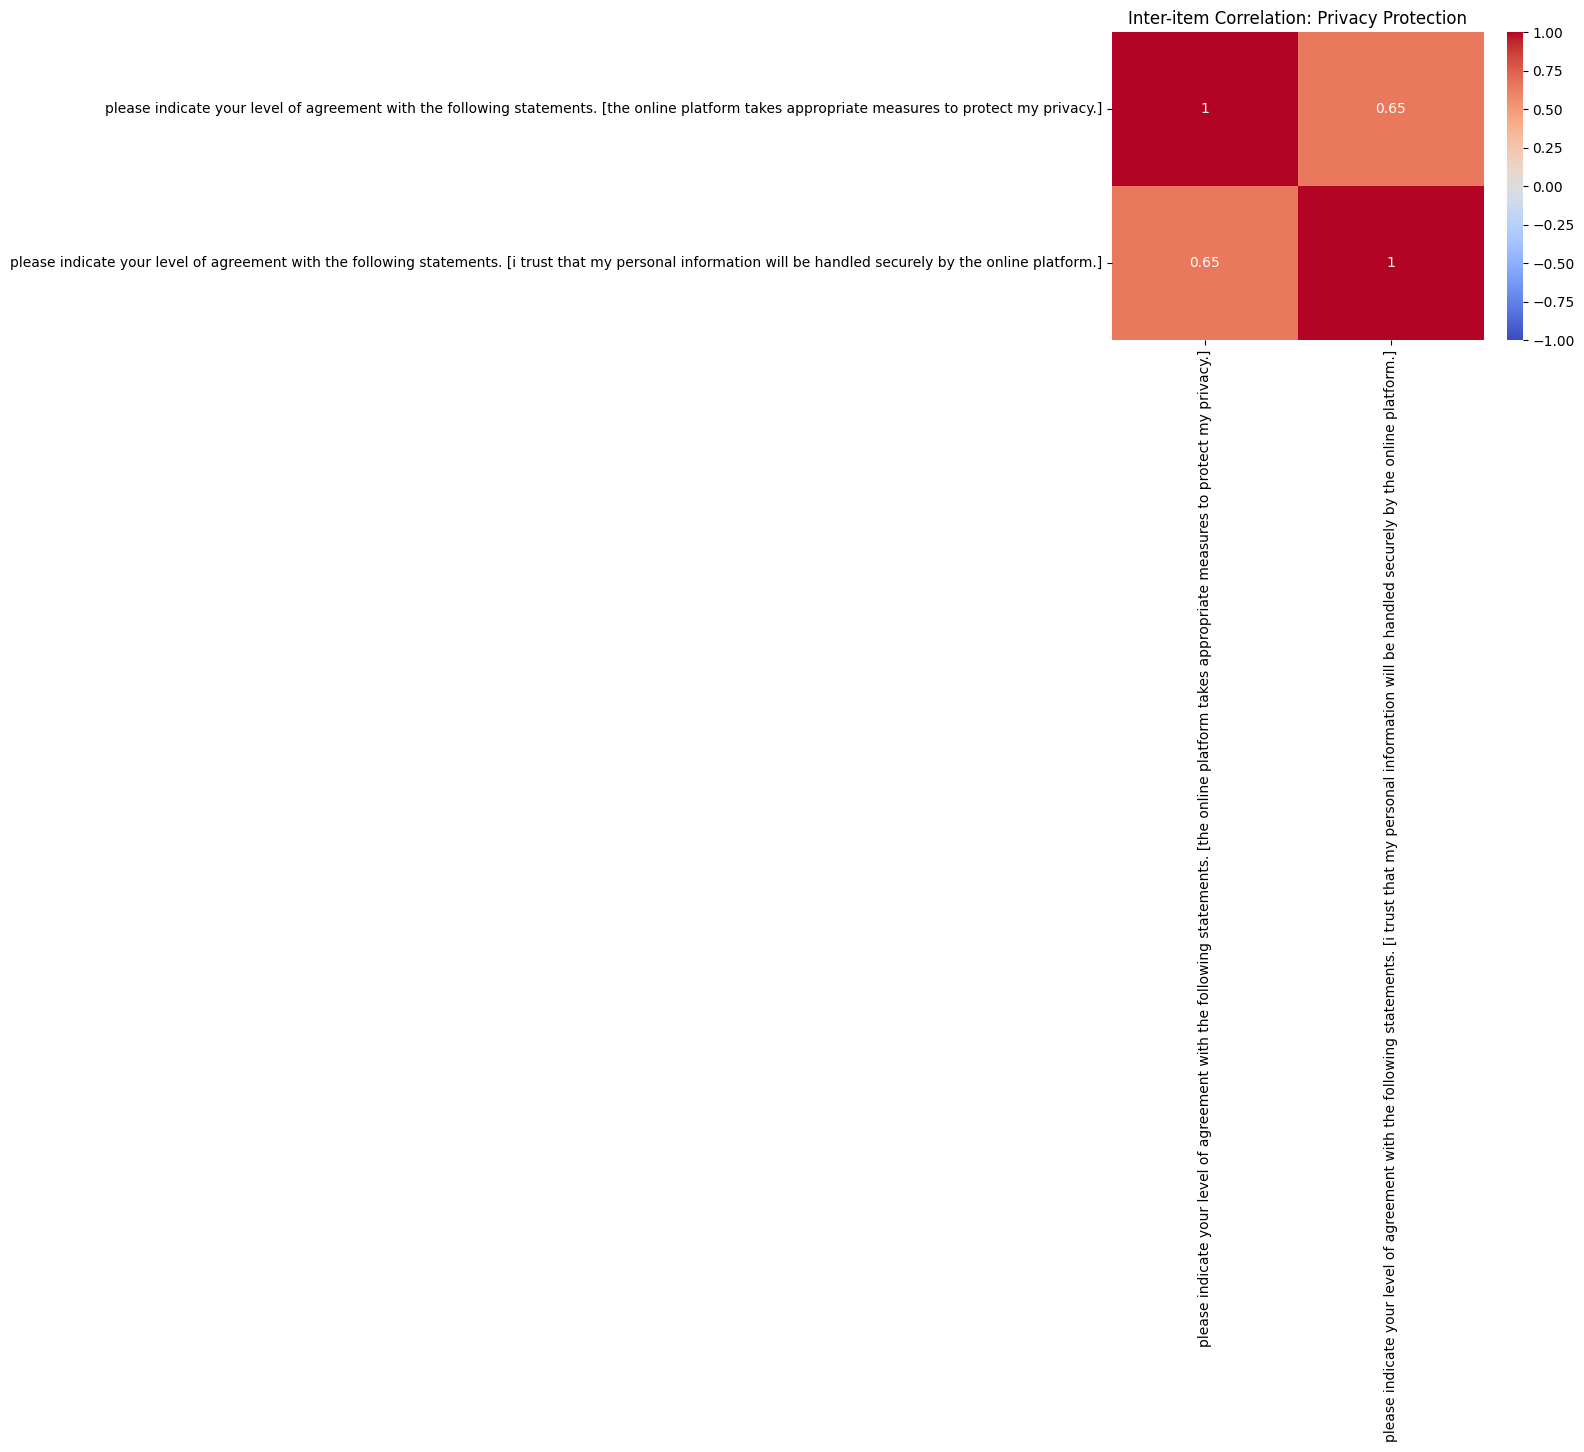

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


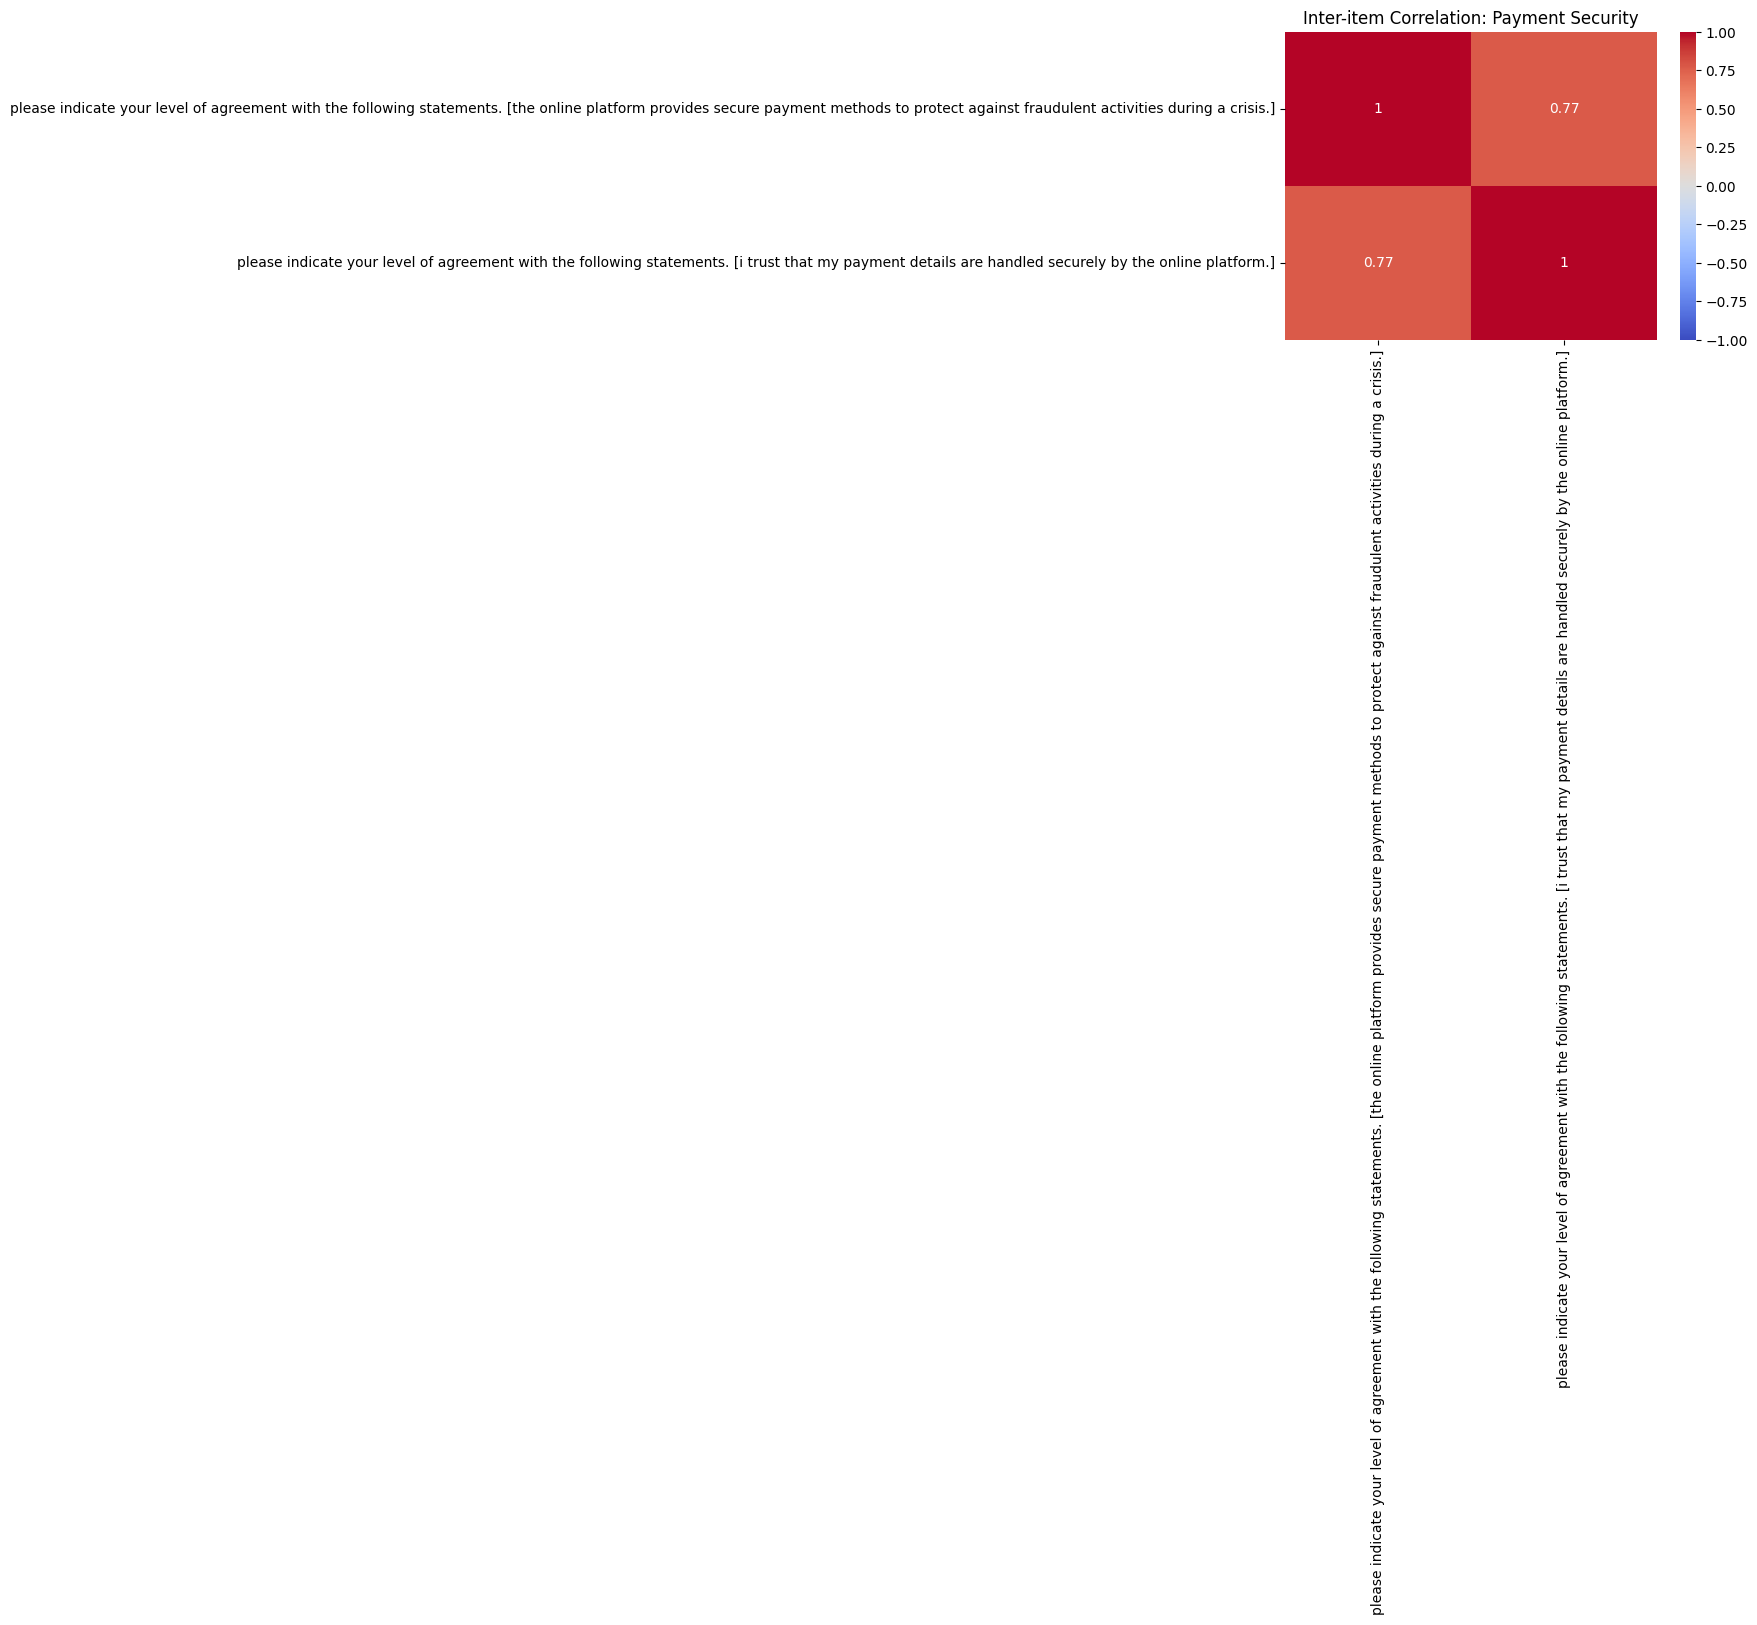

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


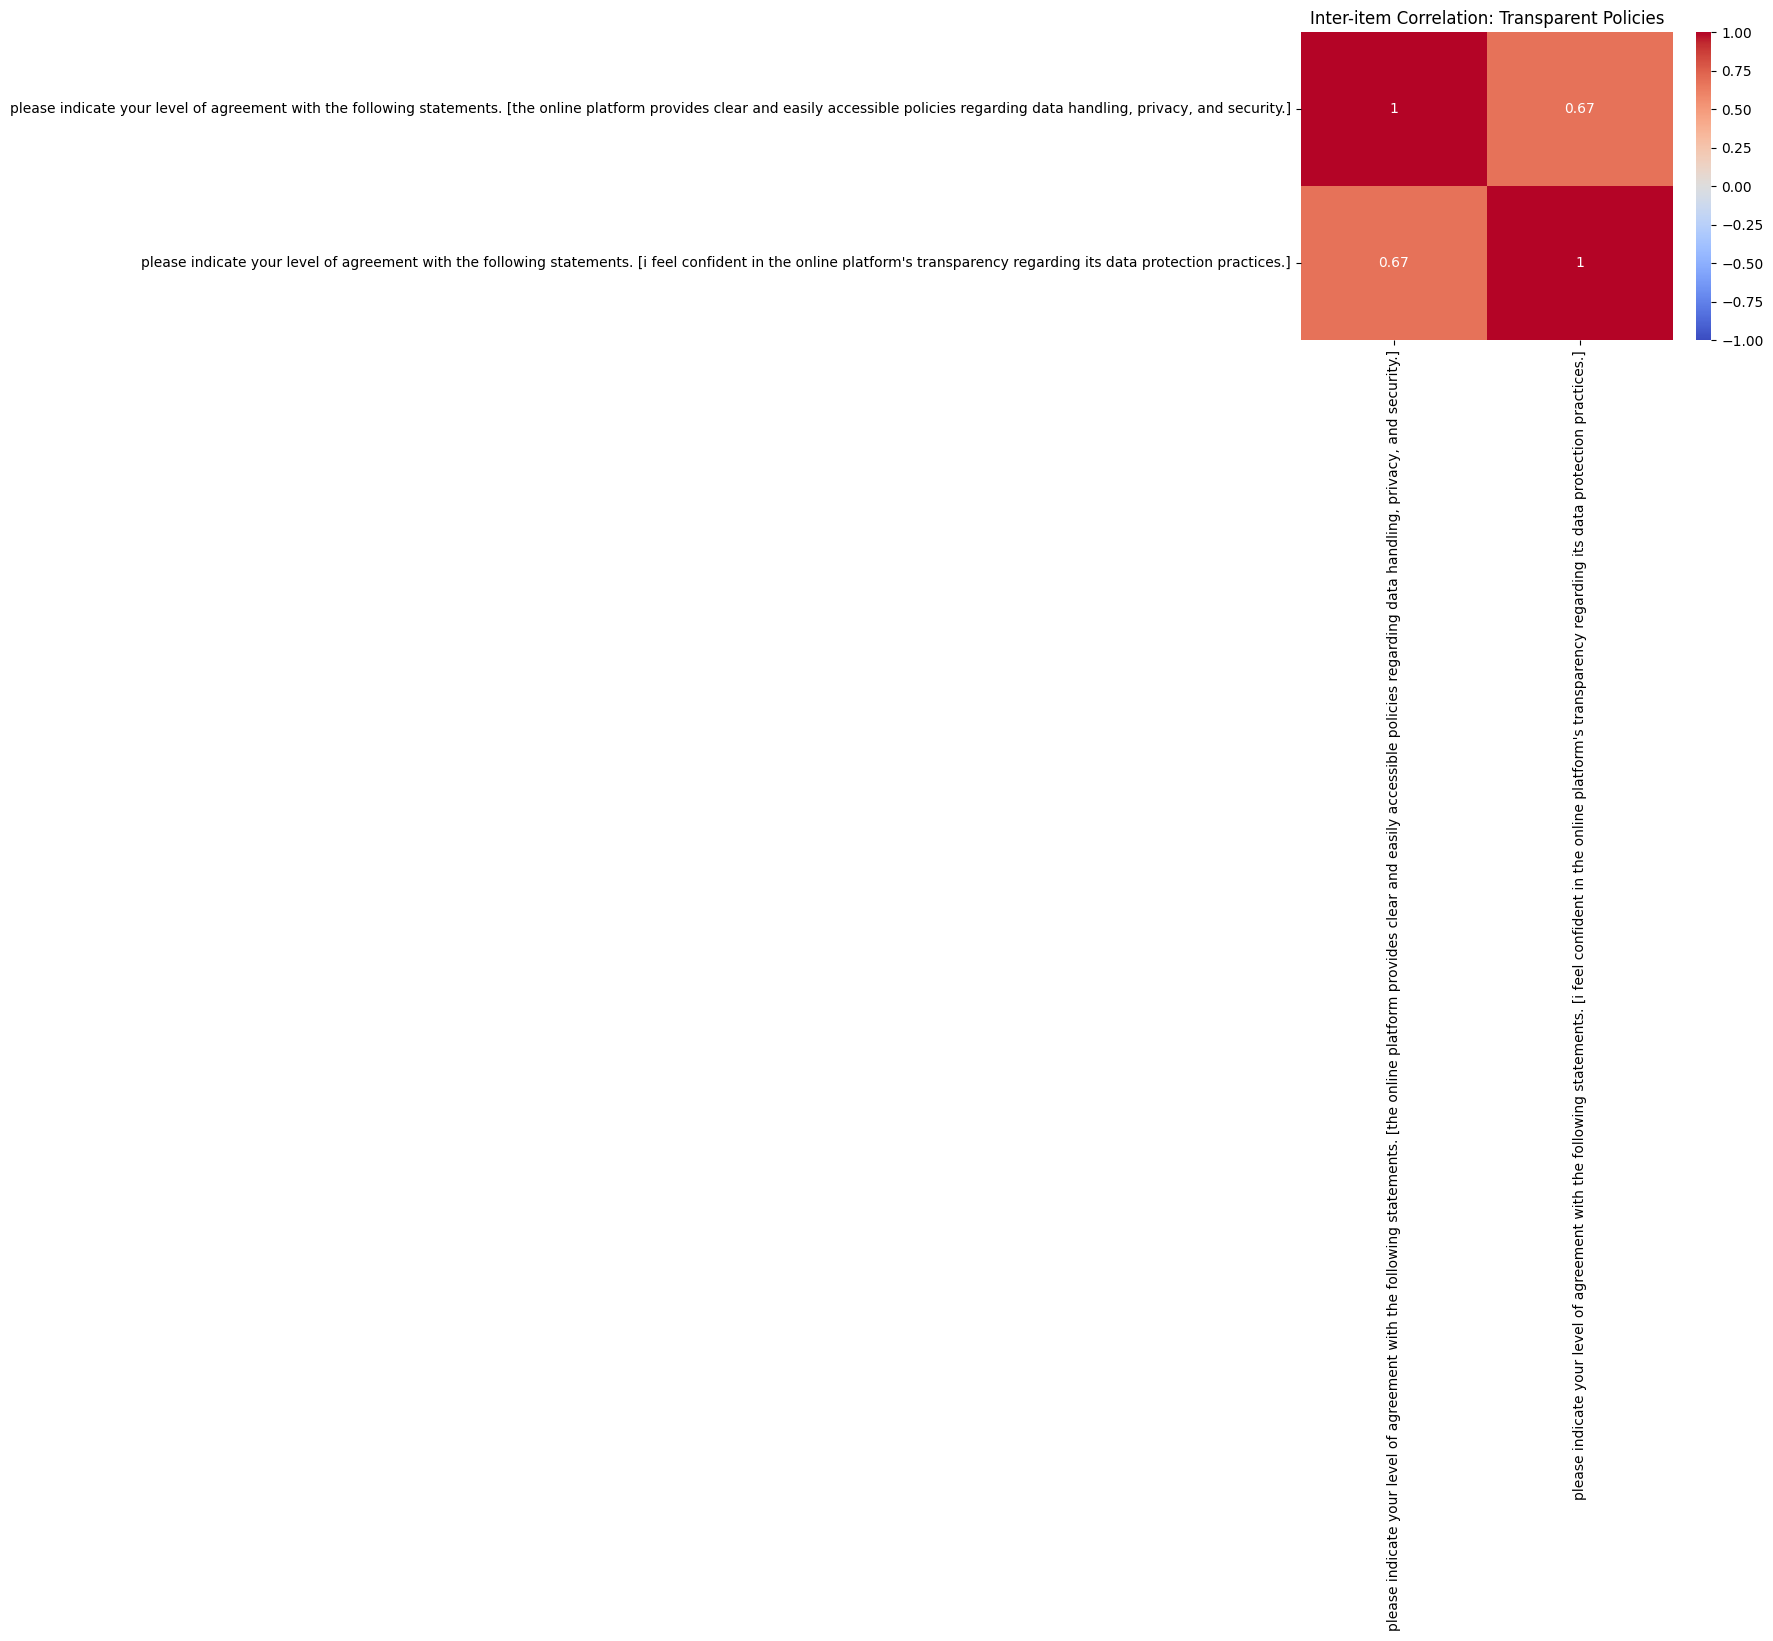

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


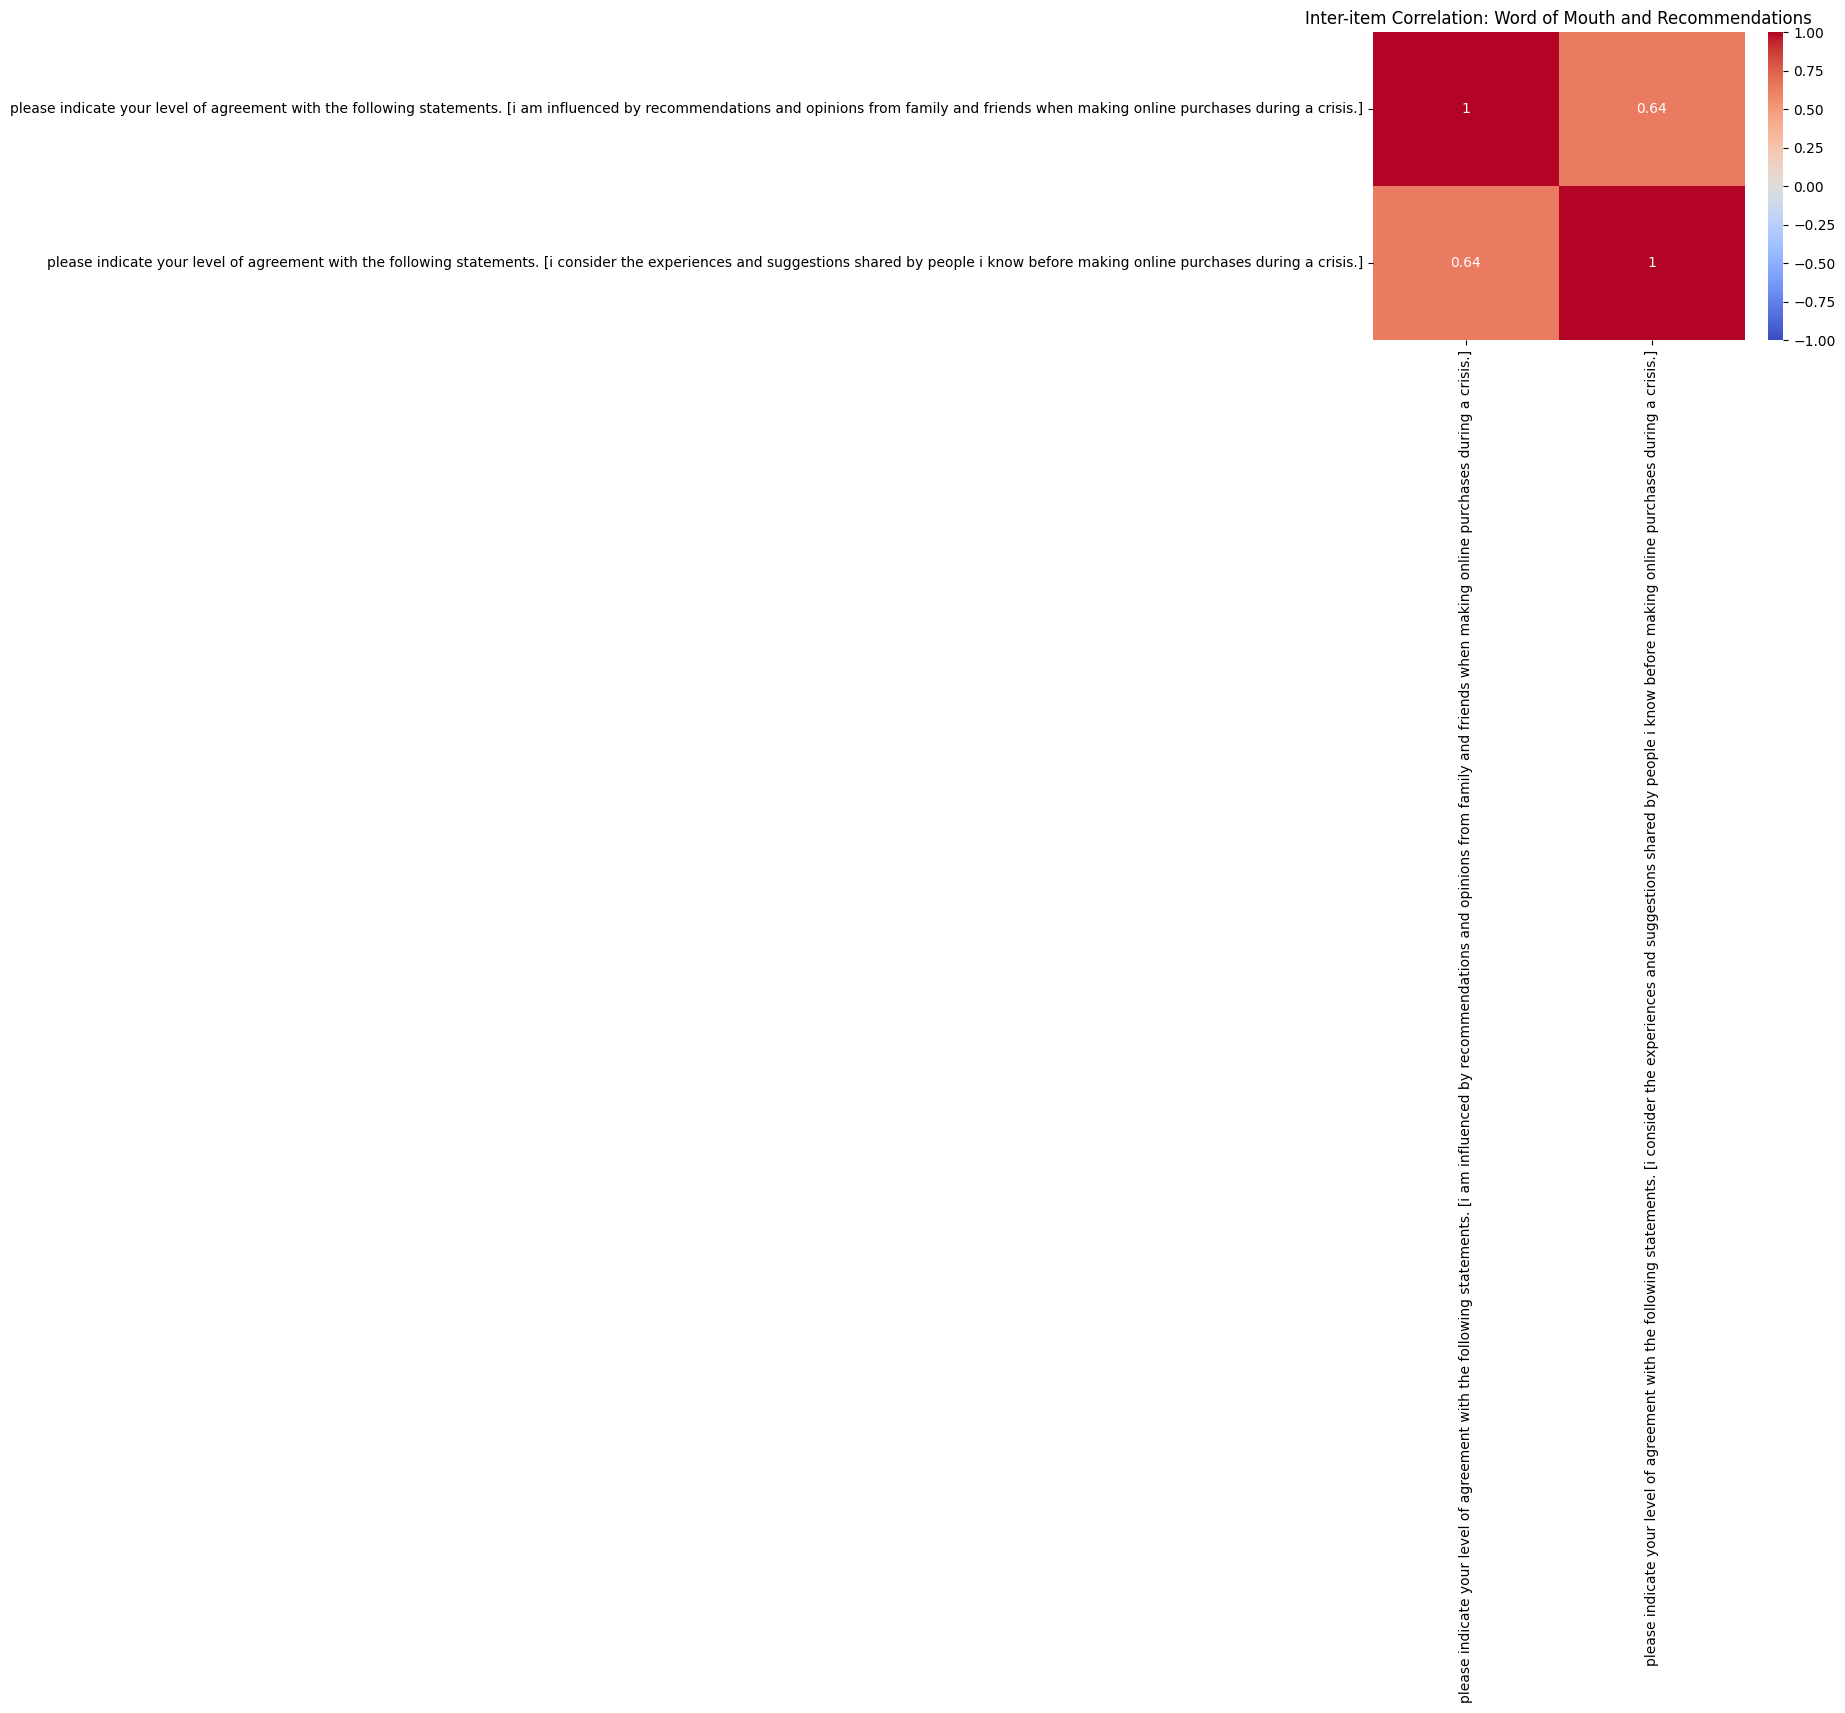

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


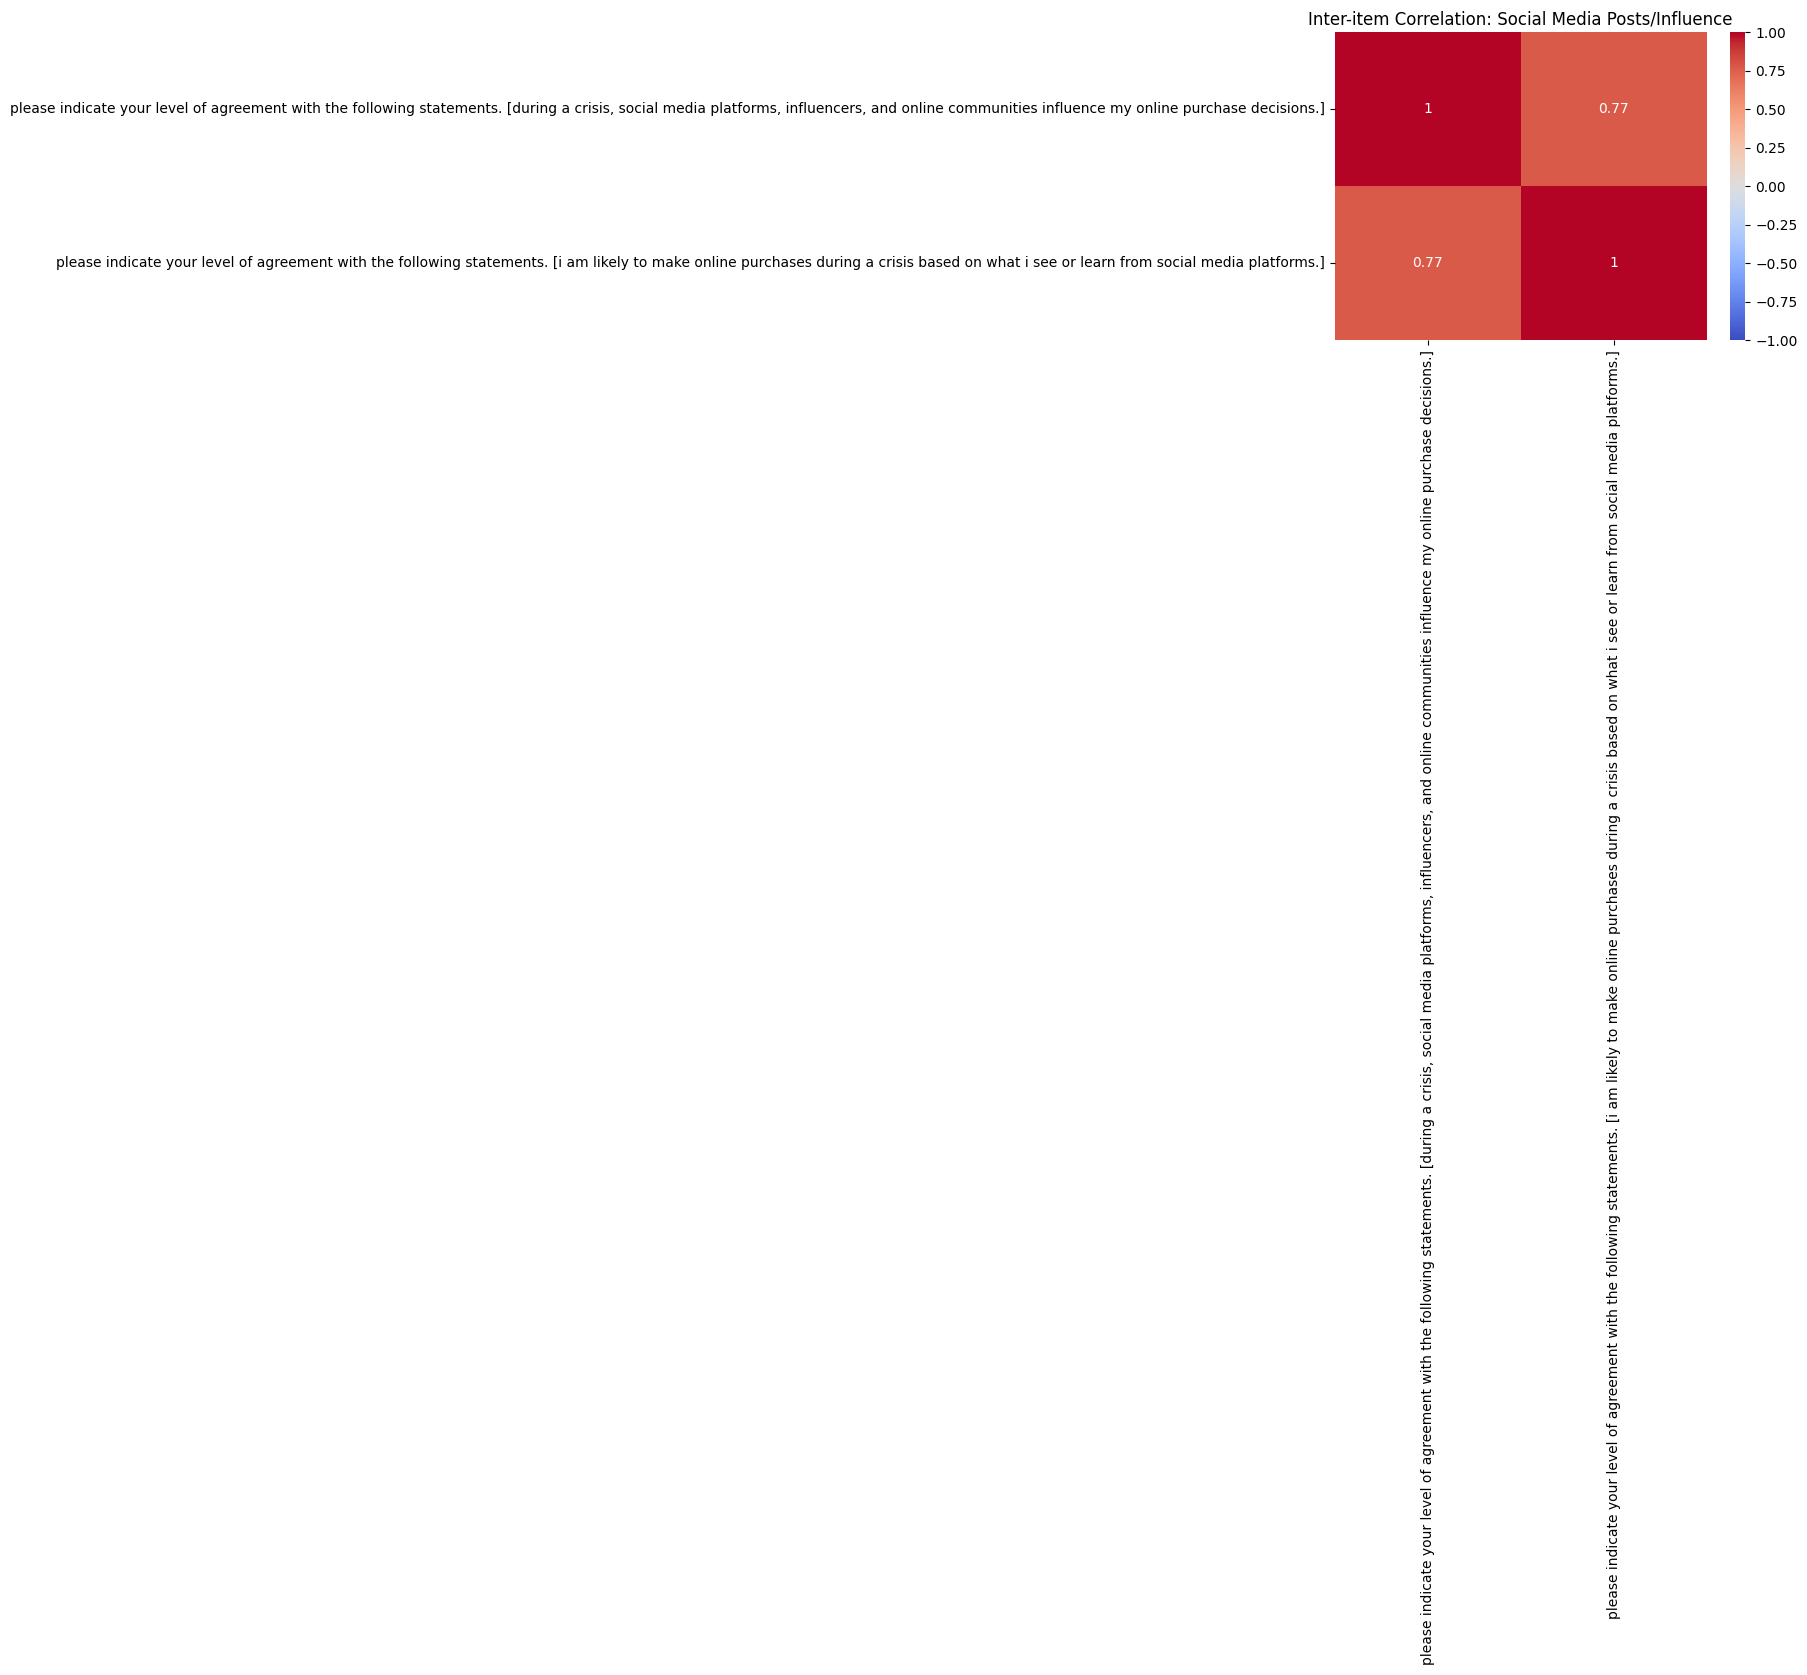

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


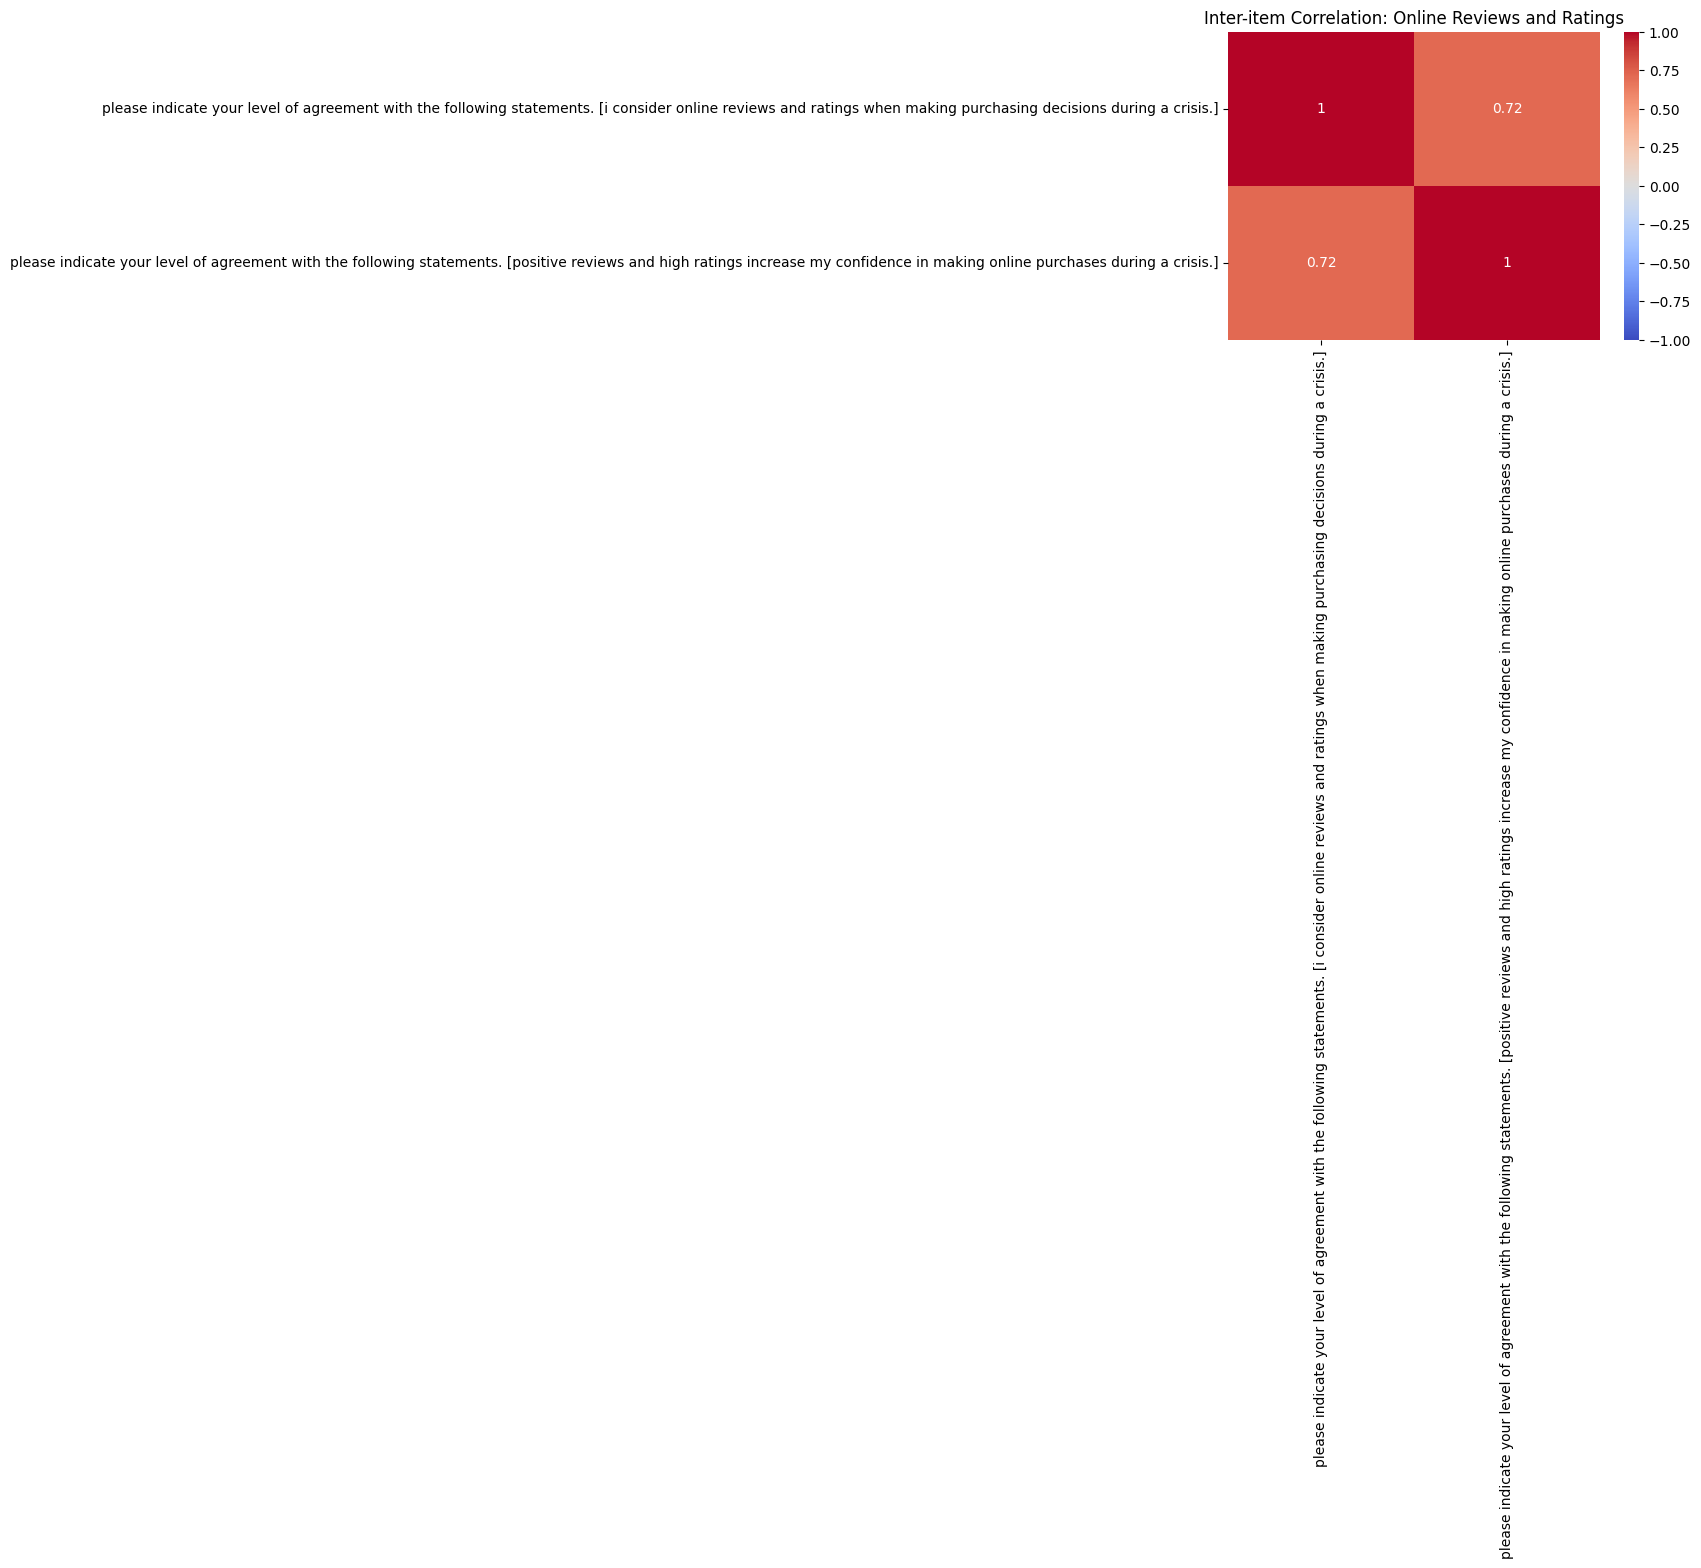

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


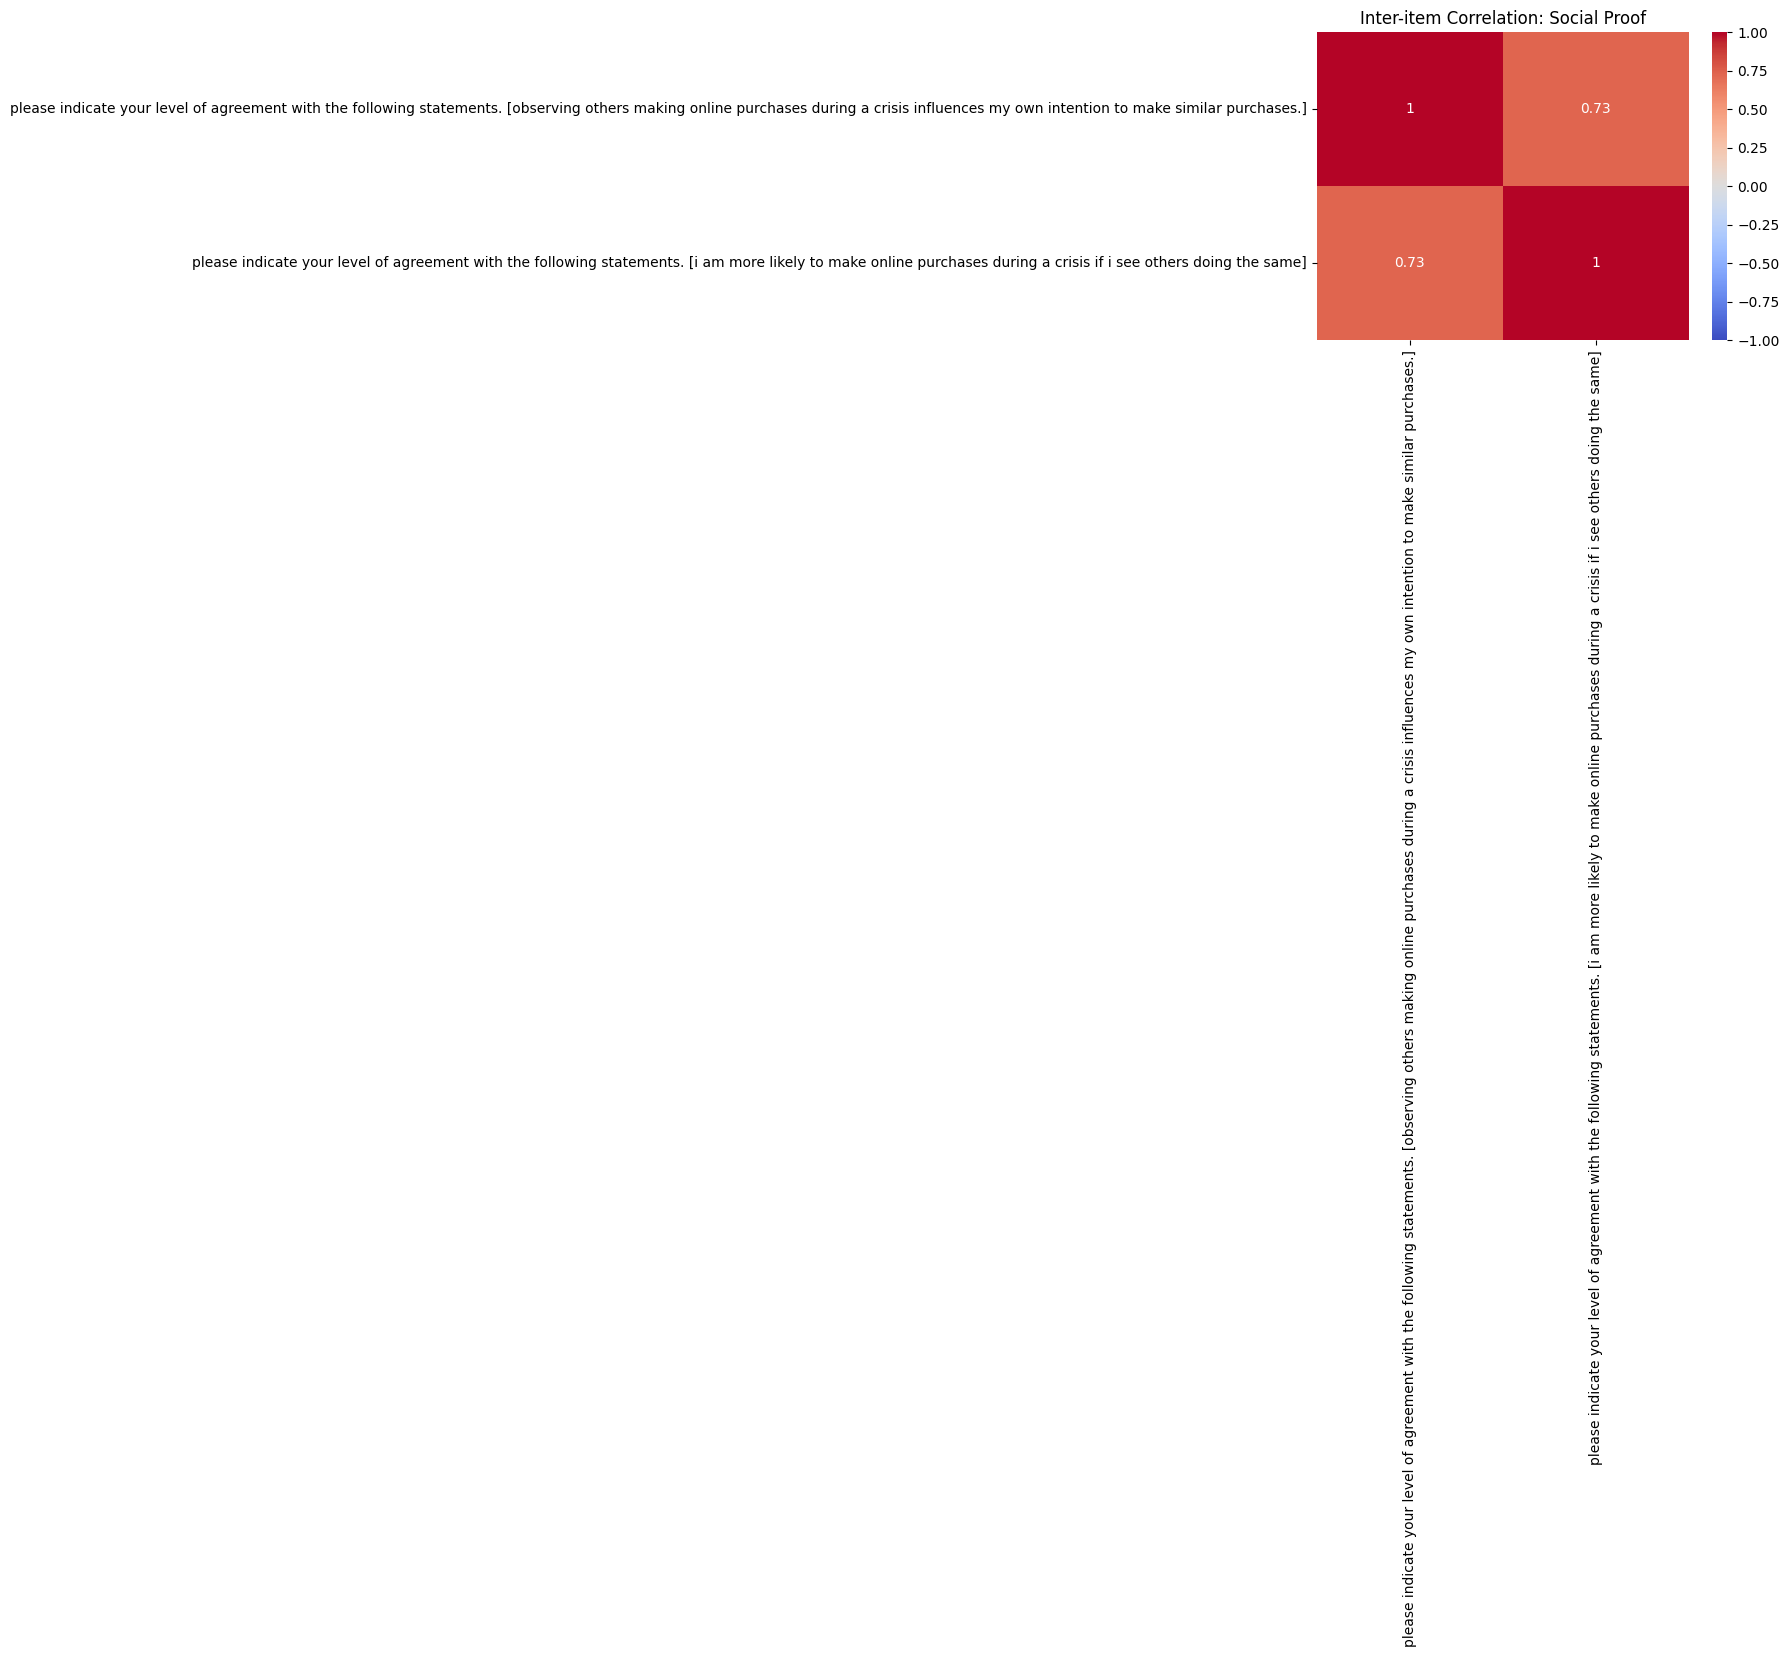

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


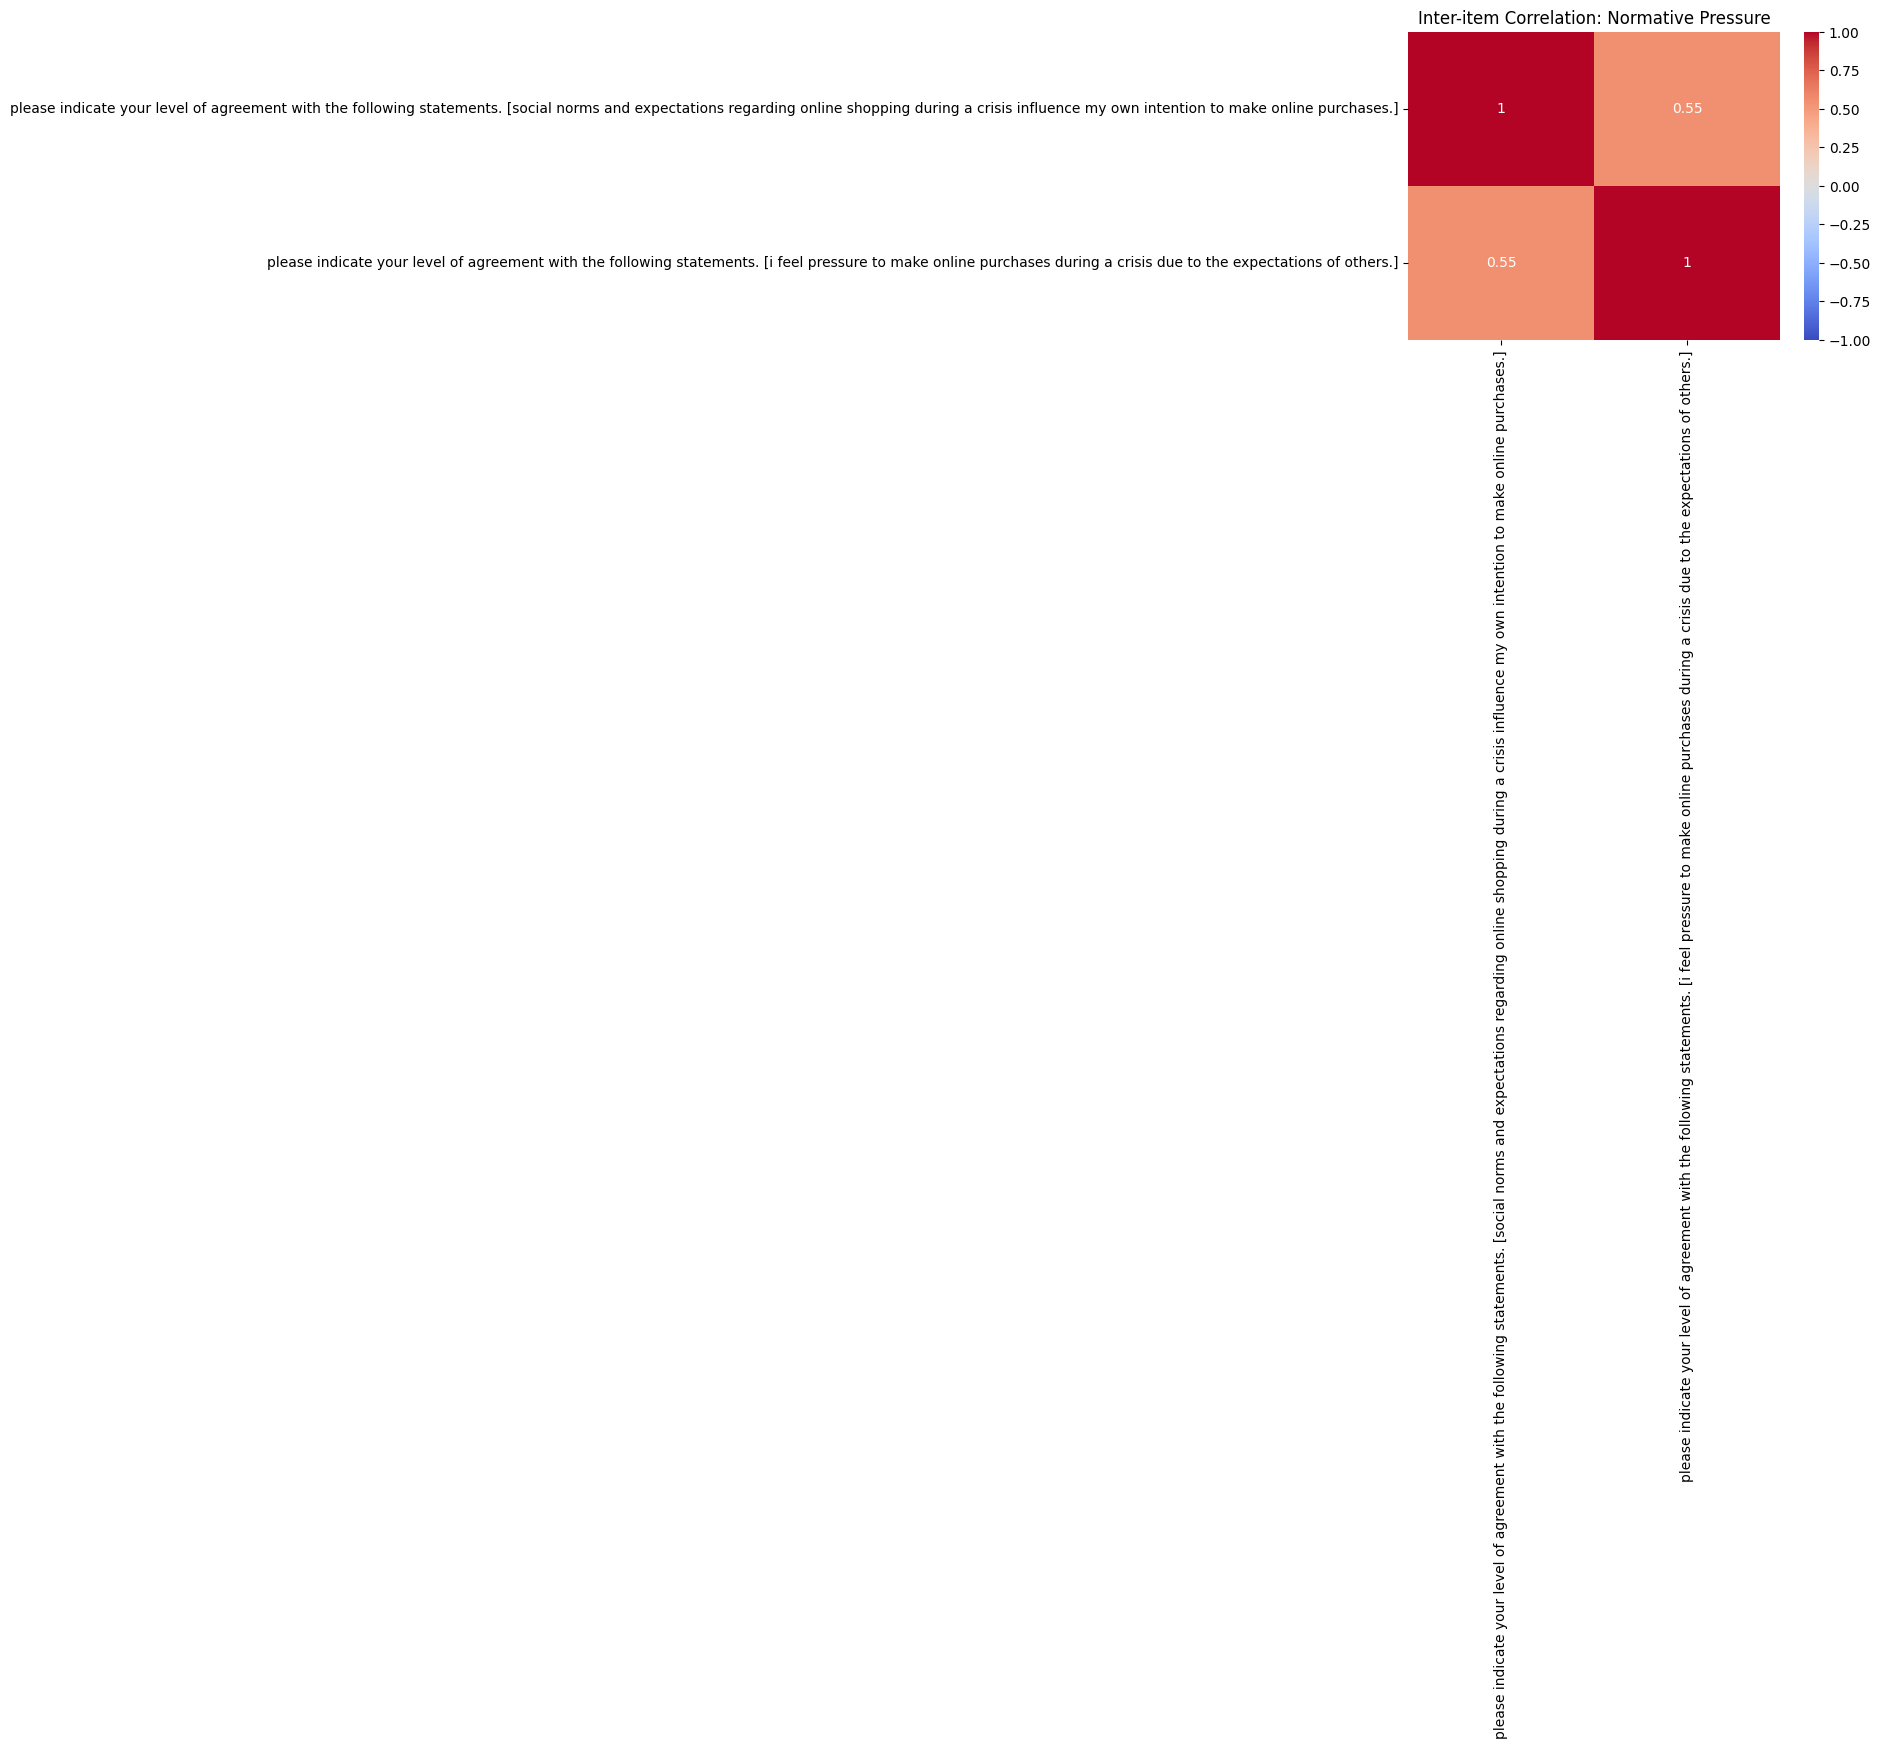

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


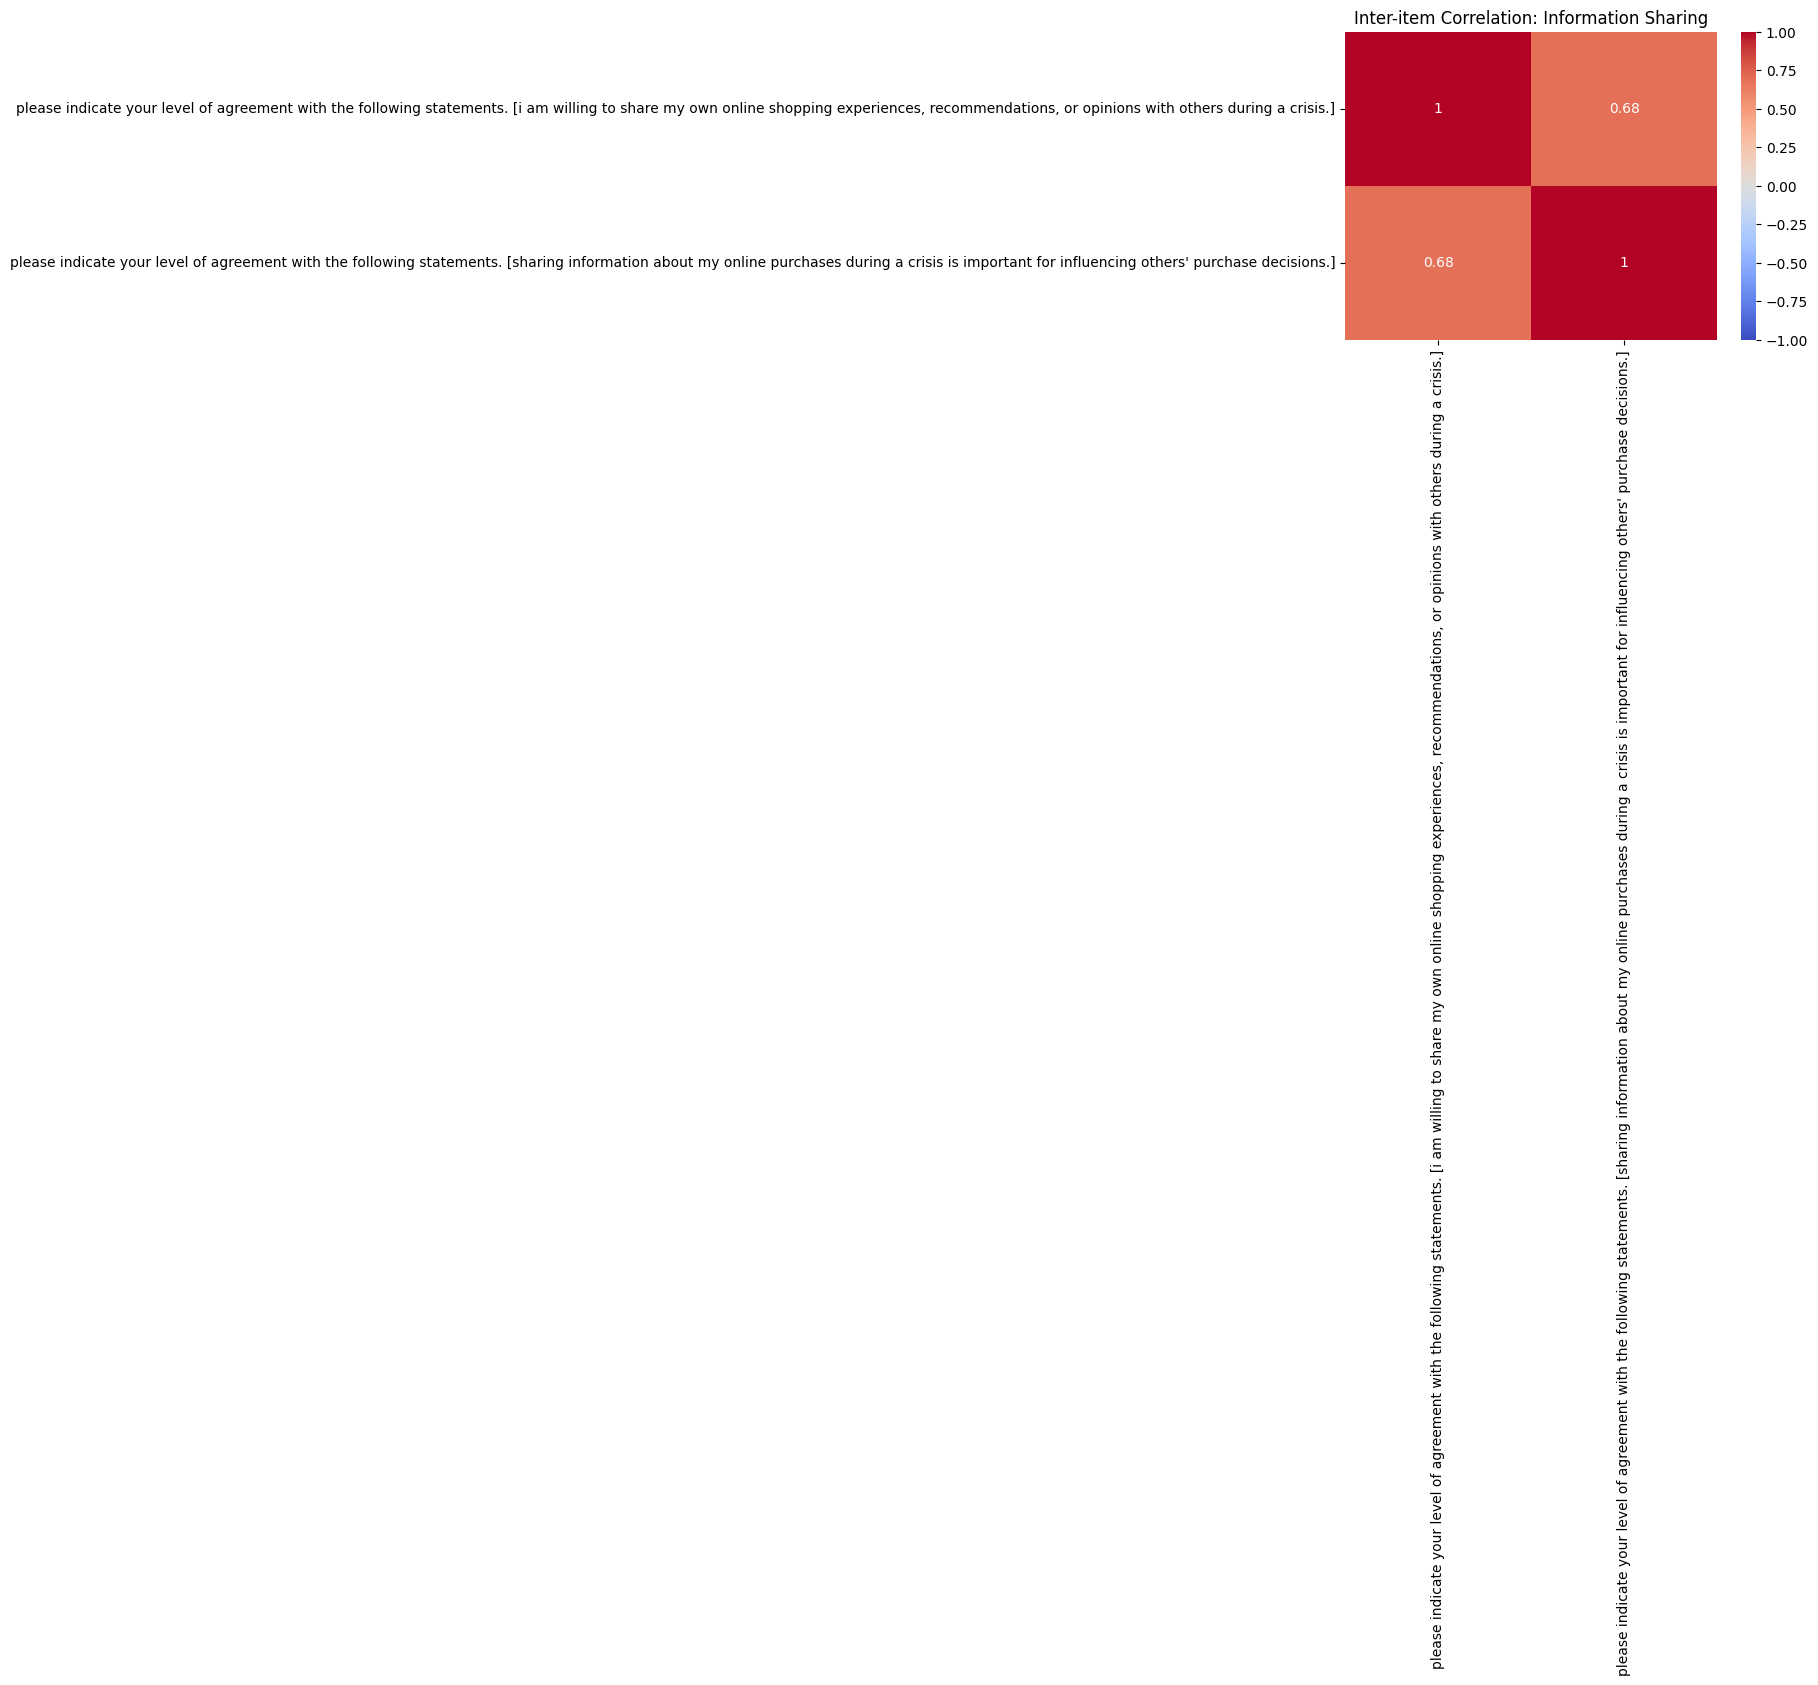

/tmp/ipykernel_298/3491462175.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


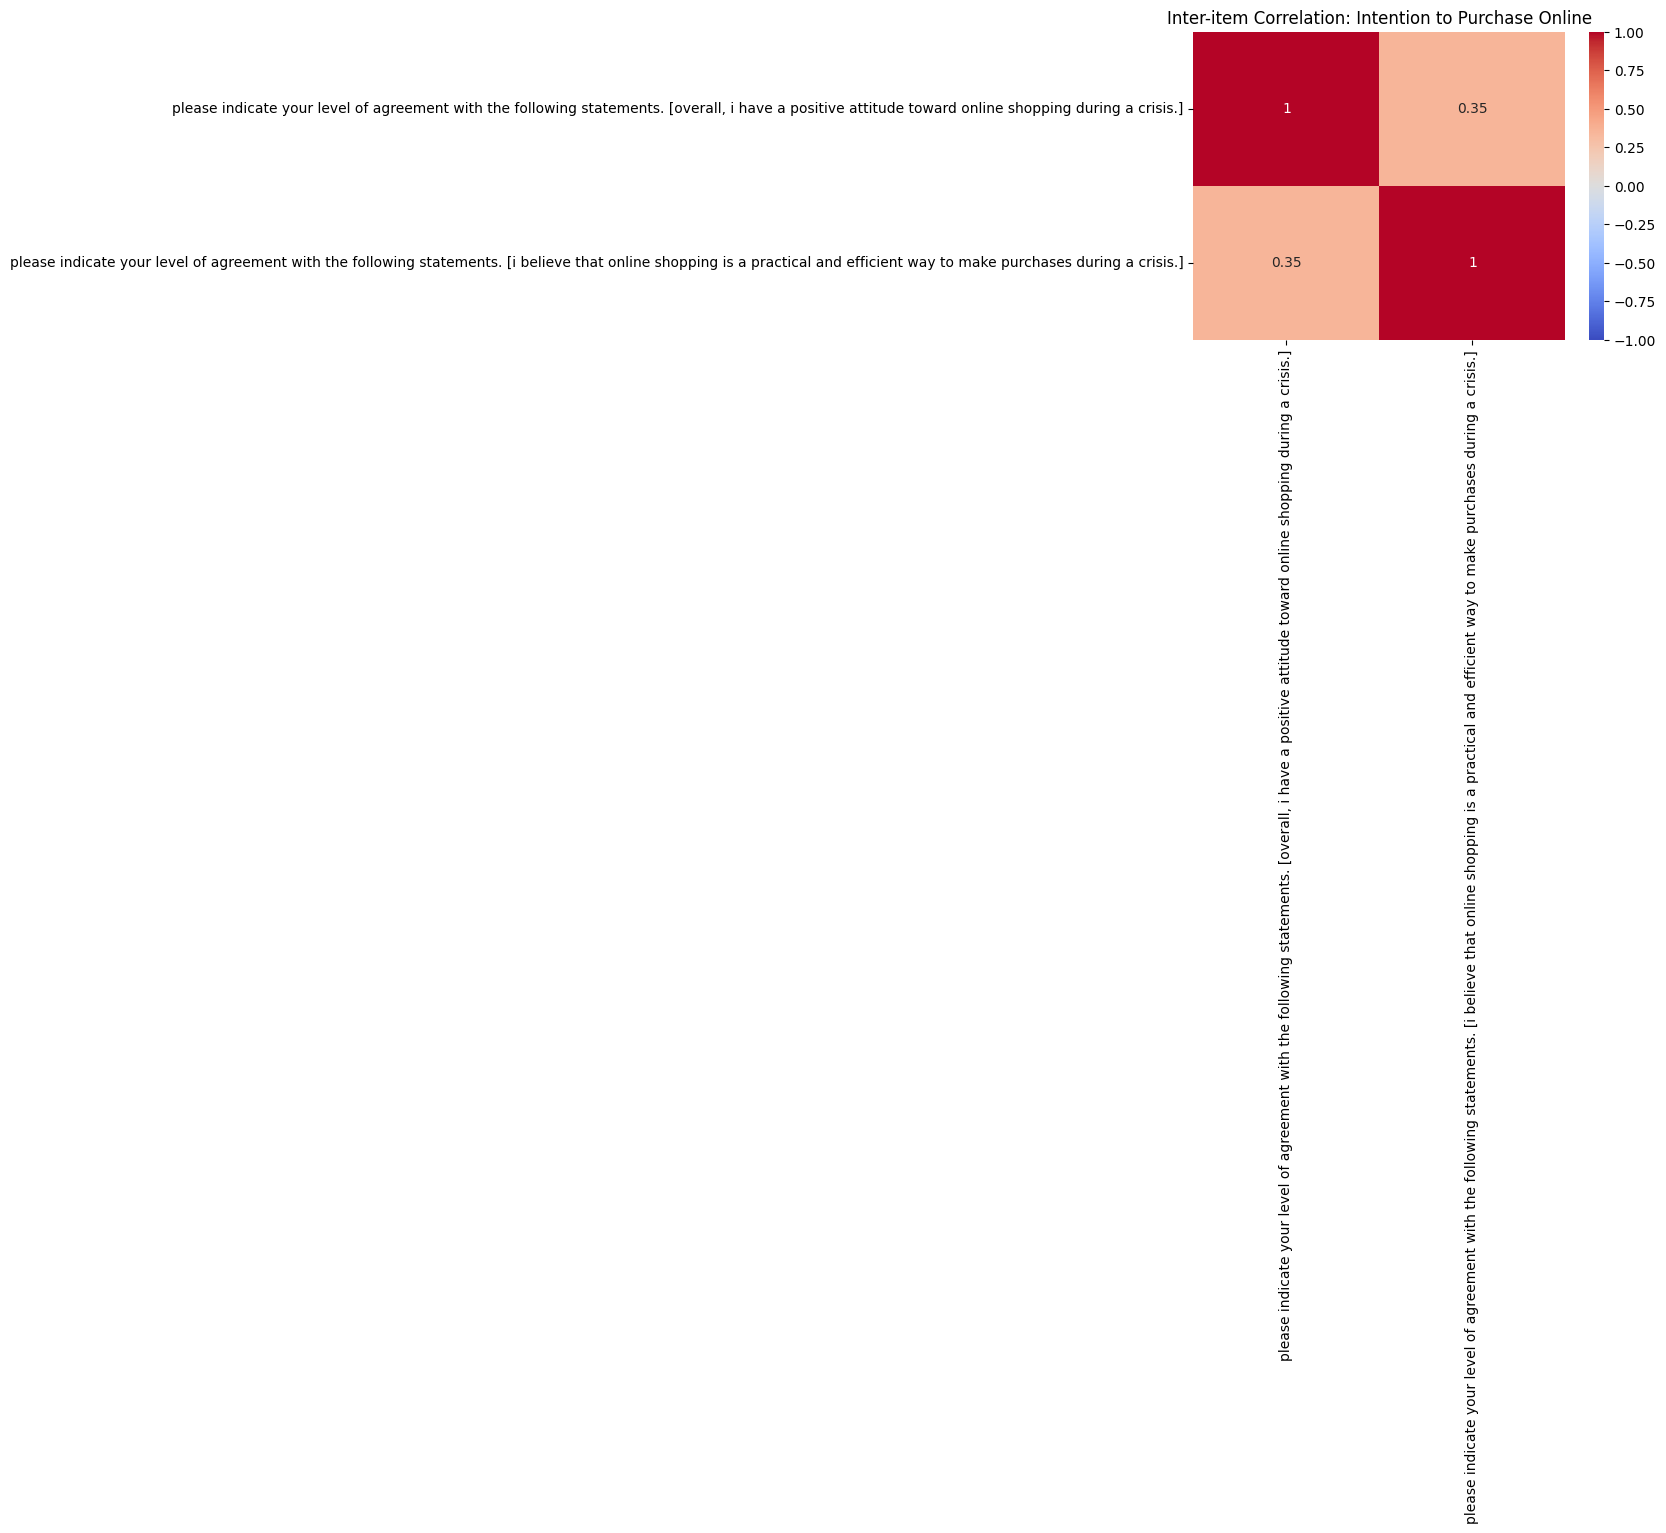

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

for var_name, df_subset in variables.items():
    corr = df_subset.corr(method='pearson')
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f"Inter-item Correlation: {var_name}")
    plt.tight_layout()
    plt.show()


# EDA

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
df_copy2 = df_copy.copy()

In [127]:
# Rename duplicate 'amazon' columns
amazon_indices = [i for i, col in enumerate(df_copy2.columns) if col == 'amazon']
if len(amazon_indices) == 2:
    new_columns = df_copy2.columns.tolist()
    new_columns[amazon_indices[0]] = 'amazon_ecommerce'
    new_columns[amazon_indices[1]] = 'amazon_automotive'
    df_copy2.columns = new_columns
    print("Renamed 'amazon' columns to 'amazon_ecommerce' and 'amazon_automotive'")
else:
    print("Expected 2 'amazon' columns, found:", len(amazon_indices))

Renamed 'amazon' columns to 'amazon_ecommerce' and 'amazon_automotive'


In [128]:
column_info = pd.DataFrame({
    "Column Name": df_copy2.columns,
    "Data Type": df_copy2.dtypes.values
})
pd.set_option('display.max_rows', None) 
print(column_info)

                                           Column Name       Data Type
0                                            timestamp  datetime64[ns]
1                                               gender           int64
2                                                  age           int64
3                           highest level of education           int64
4                                       marital status           int64
5           have used online shopping platforms before           int64
6                              professional background           int64
7                         general e-commerce platforms          object
8                 specialty online stores / automobile          object
9                                    online pharmacies          object
10                        fashion and beauty retailers          object
11                           grocery delivery services          object
12   please indicate your level of agreement with t...         float64
13   p

In [129]:
df_copy2 = df_copy2.drop(['timestamp', 'platforms_list', 'specialty_platform_list', 'pharmacy_list', 'retailer_list', 'grocery_delivery_list'], axis=1)

In [133]:
column_info = pd.DataFrame({
    "Column Name": df_copy2.columns,
    "Data Type": df_copy2.dtypes.values
})
pd.set_option('display.max_rows', None) 
print(column_info)

                                           Column Name Data Type
0                                               gender     int64
1                                                  age     int64
2                           highest level of education     int64
3                                       marital status     int64
4           have used online shopping platforms before     int64
5                              professional background     int64
6                         general e-commerce platforms    object
7                 specialty online stores / automobile    object
8                                    online pharmacies    object
9                         fashion and beauty retailers    object
10                           grocery delivery services    object
11   please indicate your level of agreement with t...   float64
12   please indicate your level of agreement with t...   float64
13   please indicate your level of agreement with t...   float64
14   please indicate your

In [134]:
column_info.to_excel("column_info.xlsx", index=False)

**Unique values in 'general e-commerce platforms':** <br>
['daraz, 'ikman', 'kapruka', 'wow', 'takas', 'wishque', 'ali-express', 'strong.lk', 'ebay', 'keels', 'amazon', 'pickme', 'lassana.com', 'instagram stores', 'shein']

**Unique values in 'specialty online stores / automobile':** <br>
['specialty online stores / automobile unknown', 'patpat.lk', 'riyasewana.lk', 'lankavechicle.com', 'autolanka.com', 'pricelanka.lk', 'patpat.lk', 'toyota', 'zero specialty online stores / automobile', 'ikman.lk', 'amazon']

**Unique values in 'online pharmacies':** <br>
['online pharmacy unknown', 'epharma.lk, 'onlinepharmacy.lk', 'healthgurd.lk', 'ceymed.lk', 'union chemist', 'healthnet.lk', 'no online pharmacies', 'nearby pharmacy']

**Unique values in 'fashion and beauty retailers':** <br>
['unknown fashion and beauty retailers', 'kapruka.com/fashion', 'fashionbug.lk', 'odel.lk', 'thilakawardana.lk', 'noorareed.lk', 'midnightdivas.com', 'kelly felder', 'zigzag.lk', 'moose', 'chenara dodge', 'dsi', 'no fashion and beauty retailers', 'nills', 'spring and summer', 'nolimit.lk, gflock', 'moods', 'amanthe', 's&s', 'carlo clothing', 'tharshana and insta shops', 'kynd fashion, carnage', 'mimosa']

**Unique values in 'grocery delivery services':** <br>
['ubereats.com', 'pickmefoods.com', 'keellssuper.lk', 'arpico.lk', 'unknown grocery delivery services', 'glomark.lk', 'cinnamonhotel.com', 'cargillsonline.com', 'grocery delivery services not used']

In [135]:
binary_features = [
    'have used online shopping platforms before', 'have you made online purchases during crisis time?',
    'ali-express', 'amazon_ecommerce', 'daraz', 'ebay', 'ikman', 'instagram stores', 'kapruka', 'keels', 
    'lassana.com', 'pickme', 'shein', 'strong.lk', 'takas', 'wishque', 'wow',
    'amazon_automotive', 'autolanka.com', 'ikman.lk', 'lankavechicle.com', 'patpat.lk', 'pricelanka.lk', 
    'riyasewana.lk', 'specialty online stores / automobile unknown', 'toyota',
    'zero specialty online stores / automobile', 'ceymed.lk', 'epharma.lk', 
    'healthgurd.lk', 'healthnet.lk', 'nearby pharmacy', 'no online pharmacies', 
    'online pharmacy unknown', 'onlinepharmacy.lk', 'union chemist', 'amanthe', 
    'carlo clothing', 'carnage,', 'chenara dodge', 'dsi', 'fashionbug.lk', 'gflock',
    'kapruka.com/fashion', 'kelly felder', 'kynd fashion', 'midnightdivas.com', 'mimosa', 'moods',
    'moose', 'nills', 'no fashion and beauty retailers', 'nolimit.lk', 'noorareed.lk', 'odel.lk',
    's&s', 'spring and summer', 'tharshana and insta shops', 'thilakawardana.lk', 
    'unknown fashion and beauty retailers', 'zigzag.lk', 'arpico.lk', 
    'cargillsonline.com', 'cinnamonhotel.com', 'glomark.lk', 'grocery delivery services not used', 
    'keellssuper.lk', 'pickmefoods.com', 'ubereats.com', 'unknown grocery delivery services'
]

other_features = [
    'please indicate your level of agreement with the following statements. [it is easy to navigate through the online platform to find the products or services i need.]',
    'please indicate your level of agreement with the following statements. [the online platform provides clear and intuitive navigation options.]',
    'please indicate your level of agreement with the following statements. [it was easy for me to learn how to use the online platform for making online purchases.]',
    'please indicate your level of agreement with the following statements. [i quickly became proficient in using the online platform for making online purchases during a crisis.]',
    'please indicate your level of agreement with the following statements. [the instructions provided on the online platform are clear and easy to understand.]',
    'please indicate your level of agreement with the following statements. [i can easily follow the instructions given on the online platform for making online purchases.]',
    'please indicate your level of agreement with the following statements. [the online platform responds quickly to my actions, such as loading pages and processing transactions.]',
    'please indicate your level of agreement with the following statements. [i don\'t experience delays or long waiting times when using the online platform for making online purchases during a crisis.]',
    'please indicate your level of agreement with the following statements. [the online platform effectively handles errors or mistakes, such as providing clear error messages and easy recovery options.]',
    'please indicate your level of agreement with the following statements. [i rarely encounter errors or issues when using the online platform for making online purchases during a crisis.]',
    'please indicate your level of agreement with the following statements. [the online platform offers a wide range of products and services that meet my needs during a crisis.]',
    'please indicate your level of agreement with the following statements. [i can find the products or services i need on the online platform during a crisis.]',
    'please indicate your level of agreement with the following statements. [using the online platform for making purchases during a crisis is convenient and saves time.]',
    'please indicate your level of agreement with the following statements. [the online platform makes it easy to search for products and complete transactions during a crisis.]',
    'please indicate your level of agreement with the following statements. [the online platform offers competitive prices, discounts, or cost-saving benefits during a crisis.]',
    'please indicate your level of agreement with the following statements. [i perceive that using the online platform for making purchases during a crisis can help me save money.]',
    'please indicate your level of agreement with the following statements. [the online platform provides detailed and accurate product information during a crisis.]',
    'please indicate your level of agreement with the following statements. [i can easily access user reviews, ratings, and other relevant information to support my purchase decisions.]',
    'please indicate your level of agreement with the following statements. [the online platform tailors recommendations, suggestions, or personalized offers based on my preferences.]',
    'please indicate your level of agreement with the following statements. [i feel that the online platform understands my needs and preferences during a crisis.]',
    'please indicate your level of agreement with the following statements. [the online platform takes appropriate measures to protect my privacy.]',
    'please indicate your level of agreement with the following statements. [i trust that my personal information will be handled securely by the online platform.]',
    'please indicate your level of agreement with the following statements. [the online platform provides secure payment methods to protect against fraudulent activities during a crisis.]',
    'please indicate your level of agreement with the following statements. [i trust that my payment details are handled securely by the online platform.]',
    'please indicate your level of agreement with the following statements. [the online platform provides clear and easily accessible policies regarding data handling, privacy, and security.]',
    'please indicate your level of agreement with the following statements. [i feel confident in the online platform\'s transparency regarding its data protection practices.]',
    'please indicate your level of agreement with the following statements. [i am influenced by recommendations and opinions from family and friends when making online purchases during a crisis.]',
    'please indicate your level of agreement with the following statements. [i consider the experiences and suggestions shared by people i know before making online purchases during a crisis.]',
    'please indicate your level of agreement with the following statements. [during a crisis, social media platforms, influencers, and online communities influence my online purchase decisions.]',
    'please indicate your level of agreement with the following statements. [i am likely to make online purchases during a crisis based on what i see or learn from social media platforms.]',
    'please indicate your level of agreement with the following statements. [i consider online reviews and ratings when making purchasing decisions during a crisis.]',
    'please indicate your level of agreement with the following statements. [positive reviews and high ratings increase my confidence in making online purchases during a crisis.]',
    'please indicate your level of agreement with the following statements. [observing others making online purchases during a crisis influences my own intention to make similar purchases.]',
    'please indicate your level of agreement with the following statements. [i am more likely to make online purchases during a crisis if i see others doing the same]',
    'please indicate your level of agreement with the following statements. [social norms and expectations regarding online shopping during a crisis influence my own intention to make online purchases.]',
    'please indicate your level of agreement with the following statements. [i feel pressure to make online purchases during a crisis due to the expectations of others.]',
    'please indicate your level of agreement with the following statements. [i am willing to share my own online shopping experiences, recommendations, or opinions with others during a crisis.]',
    'please indicate your level of agreement with the following statements. [sharing information about my online purchases during a crisis is important for influencing others\' purchase decisions.]',
    'please indicate your level of agreement with the following statements. [overall, i have a positive attitude toward online shopping during a crisis.]',
    'please indicate your level of agreement with the following statements. [i believe that online shopping is a practical and efficient way to make purchases during a crisis.]',
    'please indicate your level of agreement with the following statements. [i am concerned about the security of my personal and financial information when shopping online during a crisis.]',
    'please indicate your level of agreement with the following statements. [i am cautious about the reliability and authenticity of products or services offered by online platforms during a crisis.]',
    'please indicate your level of agreement with the following statements. [overall, i am satisfied with online purchase during a crisis?]',
    'please indicate your level of agreement with the following statements. [i have changed my online shopping behavior during a crisis compared to non-crisis periods?]',
    'please indicate your level of agreement with the following statements. [it was convenient for me to do online shopping during a crisis compared to traditional in-store shopping.]',
    'please indicate your level of agreement with the following statements. [i believe that online shopping during a crisis offers better value for money compared to traditional shopping methods.]'
]

## Gender

In [136]:
df_copy2["gender"].unique()

array([ 0,  1, -1])

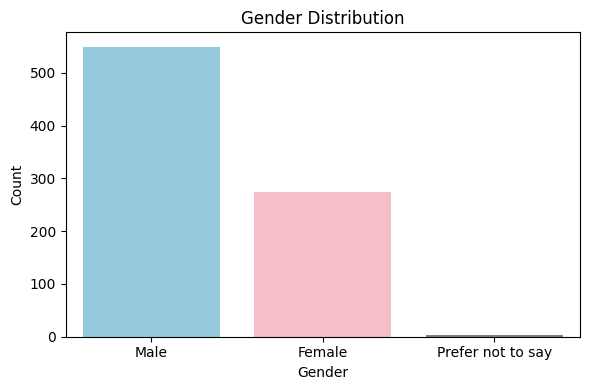

In [137]:
gender_map = {0: 'Male', 1: 'Female', -1: 'Prefer not to say'}
df_copy2['gender_label'] = df_copy2['gender'].map(gender_map)

# Countplot using seaborn
plt.figure(figsize=(6, 4))
sns.countplot(data=df_copy2, x='gender_label', palette=['skyblue', 'lightpink', 'gray'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [127]:
# for feature in binary_features:
#     print(f"{feature}: {df_copy2[feature].unique()}")

In [ ]:
output_dir = '/kaggle/working/plots'
os.makedirs(output_dir, exist_ok=True)

FileNotFoundError: [Errno 2] No such file or directory: 'gender_vs_kapruka.com/fashion_stacked_bar.png'

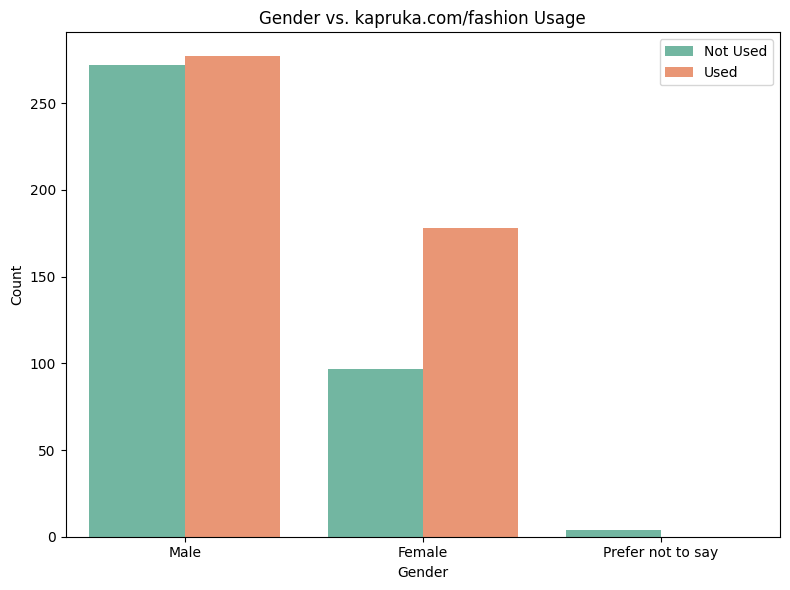

In [143]:
# from scipy.stats import chi2_contingency, pointbiserialr, kruskal, spearmanr
# from statsmodels.stats.multitest import multipletests
# import warnings
# warnings.filterwarnings('ignore')

# # 1. Association: Gender vs. Binary Features (Chi-squared Test)
# chi2_results = []
# for feature in binary_features:
#     contingency_table = pd.crosstab(df_copy2['gender_label'], df_copy2[feature])
#     chi2, p, _, _ = chi2_contingency(contingency_table)
#     chi2_results.append({'Feature': feature, 'Chi2': chi2, 'p-value': p})

# # Adjust p-values for multiple testing
# chi2_df = pd.DataFrame(chi2_results)
# chi2_df['p-adjusted'] = multipletests(chi2_df['p-value'], method='bonferroni')[1]

# # Plot significant binary features (p-adjusted < 0.05)
# significant_binary = chi2_df[chi2_df['p-adjusted'] < 0.05]['Feature']
# for feature in significant_binary:
#     plt.figure(figsize=(8, 6))
#     sns.countplot(data=df_copy2, x='gender_label', hue=feature, palette='Set2')
#     plt.title(f'Gender vs. {feature} Usage')
#     plt.xlabel('Gender')
#     plt.ylabel('Count')
#     plt.legend(['Not Used', 'Used'])
#     plt.tight_layout()
#     plt.savefig(f'gender_vs_{feature}_stacked_bar.png')
#     plt.close()

# # 2. Correlation: Gender vs. Binary Features (Point-biserial Correlation)
# # Filter Male and Female only (exclude Prefer not to say)
# df_binary = df_copy2[df_copy2['gender'] != -1].copy()
# df_binary['gender_binary'] = df_binary['gender']  # 0: Male, 1: Female
# pb_results = []
# for feature in binary_features:
#     corr, p = pointbiserialr(df_binary['gender_binary'], df_binary[feature])
#     pb_results.append({'Feature': feature, 'Point-biserial': corr, 'p-value': p})

# # Adjust p-values
# pb_df = pd.DataFrame(pb_results)
# pb_df['p-adjusted'] = multipletests(pb_df['p-value'], method='bonferroni')[1]

# # Plot point-biserial correlations
# plt.figure(figsize=(10, 6))
# sns.barplot(data=pb_df, x='Feature', y='Point-biserial', palette='coolwarm')
# plt.title('Point-biserial Correlation: Gender vs. Binary Features')
# plt.xlabel('Feature')
# plt.ylabel('Correlation Coefficient')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.savefig('gender_vs_binary_correlations.png')
# plt.close()

# # 3. Association: Gender vs. Other Features (Kruskal-Wallis Test)
# kw_results = []
# for feature in other_features:
#     groups = [df_copy2[df_copy2['gender'] == g][feature] for g in [-1, 0, 1]]
#     stat, p = kruskal(*groups)
#     kw_results.append({'Feature': feature, 'Kruskal Stat': stat, 'p-value': p})

# # Adjust p-values
# kw_df = pd.DataFrame(kw_results)
# kw_df['p-adjusted'] = multipletests(kw_df['p-value'], method='bonferroni')[1]

# # Plot significant other features (p-adjusted < 0.05)
# significant_other = kw_df[kw_df['p-adjusted'] < 0.05]['Feature']
# for feature in significant_other:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(data=df_copy2, x='gender_label', y=feature, palette='Set3')
#     plt.title(f'Gender vs. {feature}')
#     plt.xlabel('Gender')
#     plt.ylabel('Agreement Score (1-5)')
#     plt.tight_layout()
#     plt.savefig(f'gender_vs_{feature}_boxplot.png')
#     plt.close()

# # 4. Correlation: Gender vs. Other Features (Spearman’s Rank Correlation)
# sp_results = []
# for feature in other_features:
#     corr, p = spearmanr(df_copy2['gender'], df_copy2[feature])
#     sp_results.append({'Feature': feature, 'Spearman': corr, 'p-value': p})

# # Adjust p-values
# sp_df = pd.DataFrame(sp_results)
# sp_df['p-adjusted'] = multipletests(sp_df['p-value'], method='bonferroni')[1]

# # Plot Spearman correlations
# plt.figure(figsize=(10, 6))
# sns.barplot(data=sp_df, x='Feature', y='Spearman', palette='coolwarm')
# plt.title('Spearman Correlation: Gender vs. Other Features')
# plt.xlabel('Feature')
# plt.ylabel('Correlation Coefficient')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.savefig('gender_vs_other_correlations.png')
# plt.close()

# # 5. Pair Plot for Selected Features
# # Select top features (e.g., first binary and first other feature, adjust based on significance)
# selected_features = binary_features[:1] + other_features[:1]
# sns.pairplot(df_copy2, vars=selected_features, hue='gender_label', palette='Set1', diag_kind='hist')
# plt.suptitle('Pair Plot of Selected Features by Gender', y=1.02)
# plt.tight_layout()
# plt.savefig('gender_pair_plot.png')
# plt.close()

# # Save results to CSV for reference
# chi2_df.to_csv('chi2_results.csv', index=False)
# pb_df.to_csv('pointbiserial_results.csv', index=False)
# kw_df.to_csv('kruskal_results.csv', index=False)
# sp_df.to_csv('spearman_results.csv', index=False)

# print("EDA completed. Results saved to CSV files and plots saved as PNG files.")

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pointbiserialr, kruskal, spearmanr
from statsmodels.stats.multitest import multipletests
import warnings
import re
import os

warnings.filterwarnings('ignore')

# Set up output directory in Kaggle
output_dir = '/kaggle/working/plots'
os.makedirs(output_dir, exist_ok=True)

# Function to sanitize filenames
def sanitize_filename(name):
    # Replace invalid characters with underscores
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

# 1. Association: Gender vs. Binary Features (Chi-squared Test)
chi2_results = []
for feature in binary_features:
    contingency_table = pd.crosstab(df_copy2['gender_label'], df_copy2[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': feature, 'Chi2': chi2, 'p-value': p})

# Adjust p-values for multiple testing
chi2_df = pd.DataFrame(chi2_results)
chi2_df['p-adjusted'] = multipletests(chi2_df['p-value'], method='bonferroni')[1]

# Plot significant binary features (p-adjusted < 0.05)
significant_binary = chi2_df[chi2_df['p-adjusted'] < 0.05]['Feature']
for feature in significant_binary:
    try:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df_copy2, x='gender_label', hue=feature, palette='Set2')
        plt.title(f'Gender vs. {feature} Usage')
        plt.xlabel('Gender')
        plt.ylabel('Count')
        plt.legend(['Not Used', 'Used'])
        plt.tight_layout()
        filename = f"{output_dir}/gender_vs_{sanitize_filename(feature)}_stacked_bar.png"
        plt.savefig(filename)
        plt.close()
        print(f"Saved plot: {filename}")
    except Exception as e:
        print(f"Failed to save plot for {feature}: {e}")
        plt.close()
        continue

# 2. Correlation: Gender vs. Binary Features (Point-biserial Correlation)
# Filter Male and Female only (exclude Prefer not to say)
df_binary = df_copy2[df_copy2['gender'] != -1].copy()
df_binary['gender_binary'] = df_binary['gender']  # 0: Male, 1: Female
pb_results = []
for feature in binary_features:
    corr, p = pointbiserialr(df_binary['gender_binary'], df_binary[feature])
    pb_results.append({'Feature': feature, 'Point-biserial': corr, 'p-value': p})

# Adjust p-values
pb_df = pd.DataFrame(pb_results)
pb_df['p-adjusted'] = multipletests(pb_df['p-value'], method='bonferroni')[1]

# Plot point-biserial correlations
try:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=pb_df, x='Feature', y='Point-biserial', palette='coolwarm')
    plt.title('Point-biserial Correlation: Gender vs. Binary Features')
    plt.xlabel('Feature')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45)
    plt.tight_layout()
    filename = f"{output_dir}/gender_vs_binary_correlations.png"
    plt.savefig(filename)
    plt.close()
    print(f"Saved plot: {filename}")
except Exception as e:
    print(f"Failed to save point-biserial correlation plot: {e}")
    plt.close()

# 3. Association: Gender vs. Other Features (Kruskal-Wallis Test)
kw_results = []
for feature in other_features:
    groups = [df_copy2[df_copy2['gender'] == g][feature] for g in [-1, 0, 1]]
    stat, p = kruskal(*groups)
    kw_results.append({'Feature': feature, 'Kruskal Stat': stat, 'p-value': p})

# Adjust p-values
kw_df = pd.DataFrame(kw_results)
kw_df['p-adjusted'] = multipletests(kw_df['p-value'], method='bonferroni')[1]

# Plot significant other features (p-adjusted < 0.05)
significant_other = kw_df[kw_df['p-adjusted'] < 0.05]['Feature']
for feature in significant_other:
    try:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df_copy2, x='gender_label', y=feature, palette='Set3')
        plt.title(f'Gender vs. {feature}')
        plt.xlabel('Gender')
        plt.ylabel('Agreement Score (1-5)')
        plt.tight_layout()
        filename = f"{output_dir}/gender_vs_{sanitize_filename(feature)}_boxplot.png"
        plt.savefig(filename)
        plt.close()
        print(f"Saved plot: {filename}")
    except Exception as e:
        print(f"Failed to save plot for {feature}: {e}")
        plt.close()
        continue

# 4. Correlation: Gender vs. Other Features (Spearman’s Rank Correlation)
sp_results = []
for feature in other_features:
    corr, p = spearmanr(df_copy2['gender'], df_copy2[feature])
    sp_results.append({'Feature': feature, 'Spearman': corr, 'p-value': p})

# Adjust p-values
sp_df = pd.DataFrame(sp_results)
sp_df['p-adjusted'] = multipletests(sp_df['p-value'], method='bonferroni')[1]

# Plot Spearman correlations
try:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=sp_df, x='Feature', y='Spearman', palette='coolwarm')
    plt.title('Spearman Correlation: Gender vs. Other Features')
    plt.xlabel('Feature')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45)
    plt.tight_layout()
    filename = f"{output_dir}/gender_vs_other_correlations.png"
    plt.savefig(filename)
    plt.close()
    print(f"Saved plot: {filename}")
except Exception as e:
    print(f"Failed to save Spearman correlation plot: {e}")
    plt.close()

# 5. Pair Plot for Selected Features
# Select top features (e.g., first binary and first other feature, adjust based on significance)
selected_features = binary_features[:1] + other_features[:1]
try:
    sns.pairplot(df_copy2, vars=selected_features, hue='gender_label', palette='Set1', diag_kind='hist')
    plt.suptitle('Pair Plot of Selected Features by Gender', y=1.02)
    plt.tight_layout()
    filename = f"{output_dir}/gender_pair_plot.png"
    plt.savefig(filename)
    plt.close()
    print(f"Saved plot: {filename}")
except Exception as e:
    print(f"Failed to save pair plot: {e}")
    plt.close()

# Save results to CSV for reference
chi2_df.to_csv('/kaggle/working/chi2_results.csv', index=False)
pb_df.to_csv('/kaggle/working/pointbiserial_results.csv', index=False)
kw_df.to_csv('/kaggle/working/kruskal_results.csv', index=False)
sp_df.to_csv('/kaggle/working/spearman_results.csv', index=False)

print("EDA completed. Results saved to CSV files in /kaggle/working/ and plots saved as PNG files in /kaggle/working/plots/")

Saved plot: /kaggle/working/plots/gender_vs_takas_stacked_bar.png
Saved plot: /kaggle/working/plots/gender_vs_wow_stacked_bar.png
Saved plot: /kaggle/working/plots/gender_vs_amazon_automotive_stacked_bar.png
Saved plot: /kaggle/working/plots/gender_vs_ikman_lk_stacked_bar.png
Saved plot: /kaggle/working/plots/gender_vs_patpat_lk_stacked_bar.png
Saved plot: /kaggle/working/plots/gender_vs_riyasewana_lk_stacked_bar.png
Saved plot: /kaggle/working/plots/gender_vs_healthgurd_lk_stacked_bar.png
Saved plot: /kaggle/working/plots/gender_vs_healthnet_lk_stacked_bar.png
Saved plot: /kaggle/working/plots/gender_vs_online_pharmacy_unknown_stacked_bar.png
Saved plot: /kaggle/working/plots/gender_vs_onlinepharmacy_lk_stacked_bar.png
Saved plot: /kaggle/working/plots/gender_vs_fashionbug_lk_stacked_bar.png
Saved plot: /kaggle/working/plots/gender_vs_gflock_stacked_bar.png
Saved plot: /kaggle/working/plots/gender_vs_kapruka_com_fashion_stacked_bar.png
Saved plot: /kaggle/working/plots/gender_vs_kelly

## Age

In [130]:
df_copy["age"].unique()

array([1, 0, 2, 3])

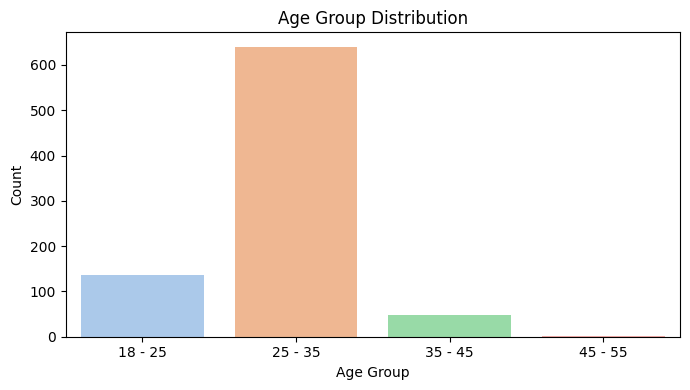

In [131]:
age_map = {0: '18 - 25', 1: '25 - 35', 2: '35 - 45', 3: '45 - 55'}
df_copy['age_group'] = df_copy['age'].map(age_map)

# Plot with Seaborn
plt.figure(figsize=(7, 4))
sns.countplot(data=df_copy, x='age_group', order=age_map.values(), palette='pastel')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()